In [66]:
import pandas as pd # 순서 이걸 먼저 (preamble보다)
import mglearn
import preamble # 세팅 한 파일에 정리되어있음

In [67]:
from preamble import *

# 결정트리
- 장점 : 전처리에 민감하지 않음 (다른 알고리즘 쓰기전에 파악용)
- 단점 : 데이터에 민감함 = 과대적합에 취약 (-> 트리높이를 조정해서 해결해야함)

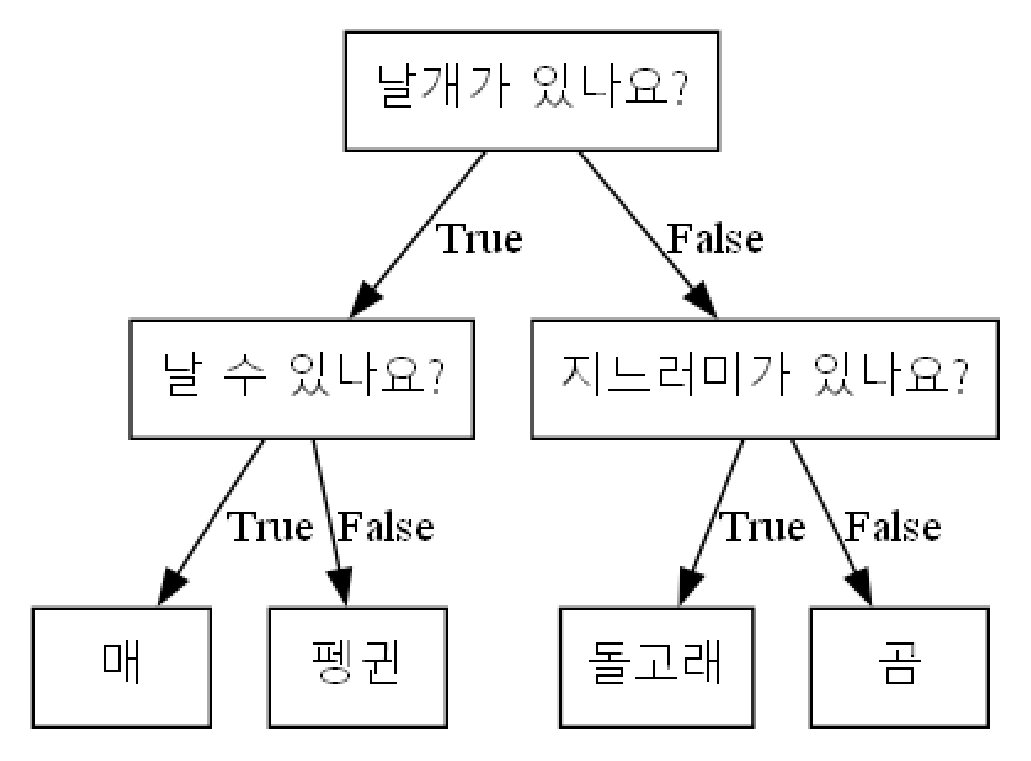

In [68]:
# TODO : 한국어깨짐
# plot_animal_tree 여기가서 추가해줘야 함 
mglearn.plots.plot_animal_tree() # mglearn : 그래프를 그리는 코드를 함수로 한번에 정리해둠

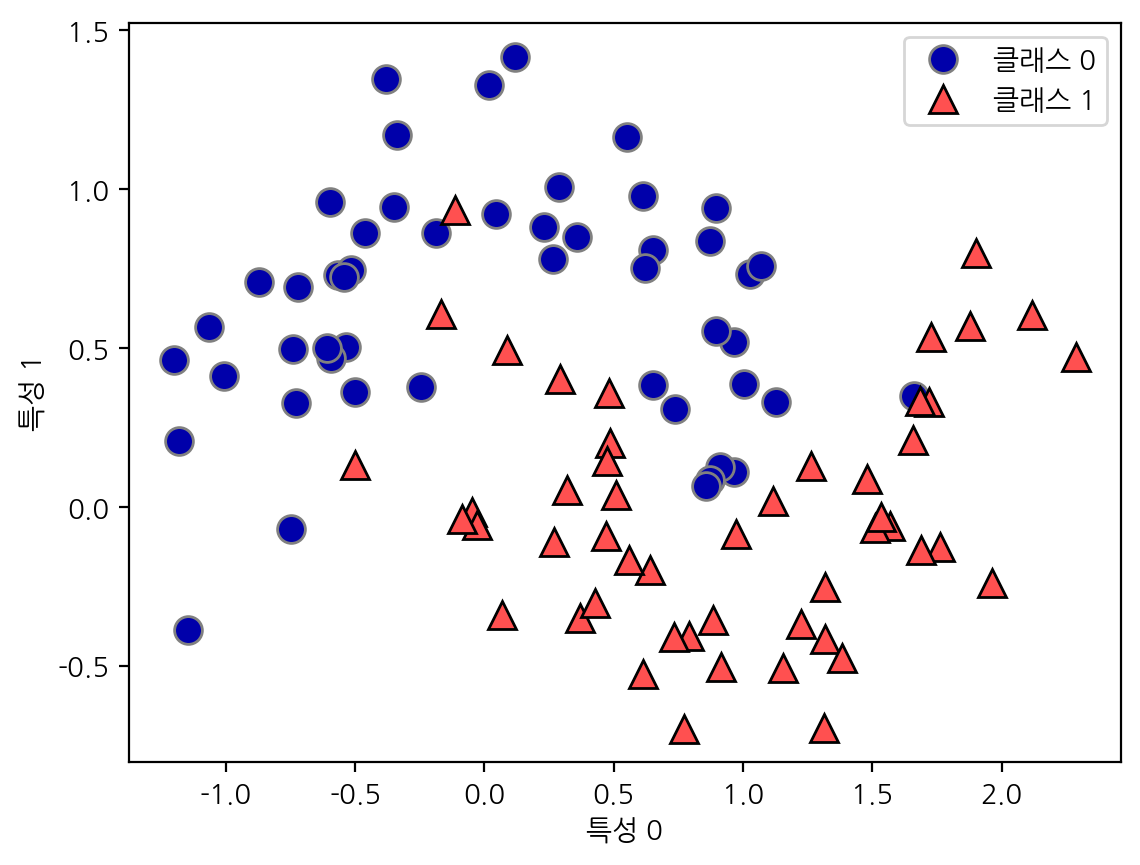

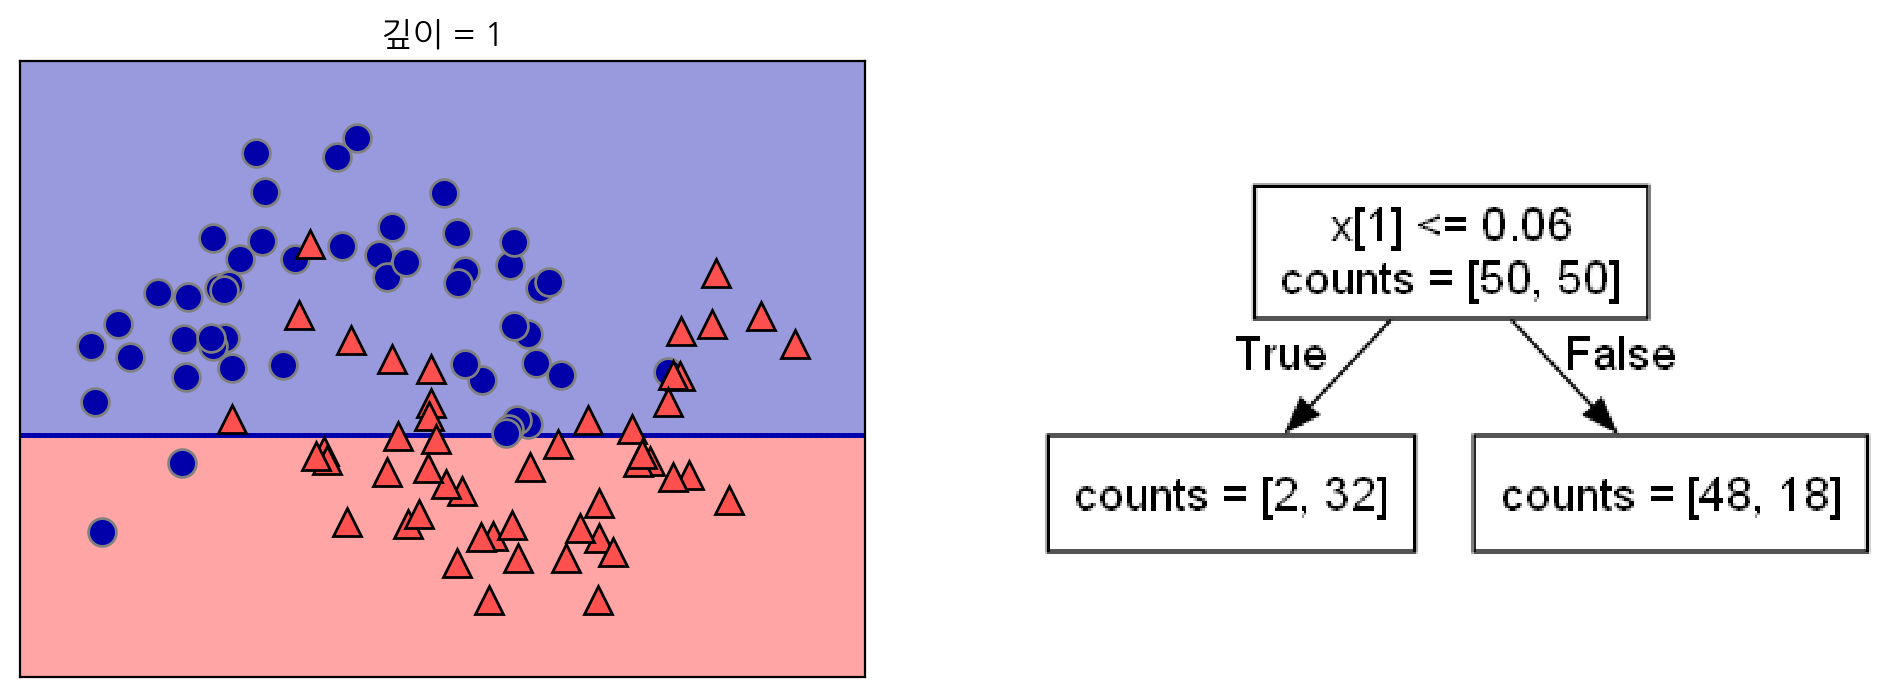

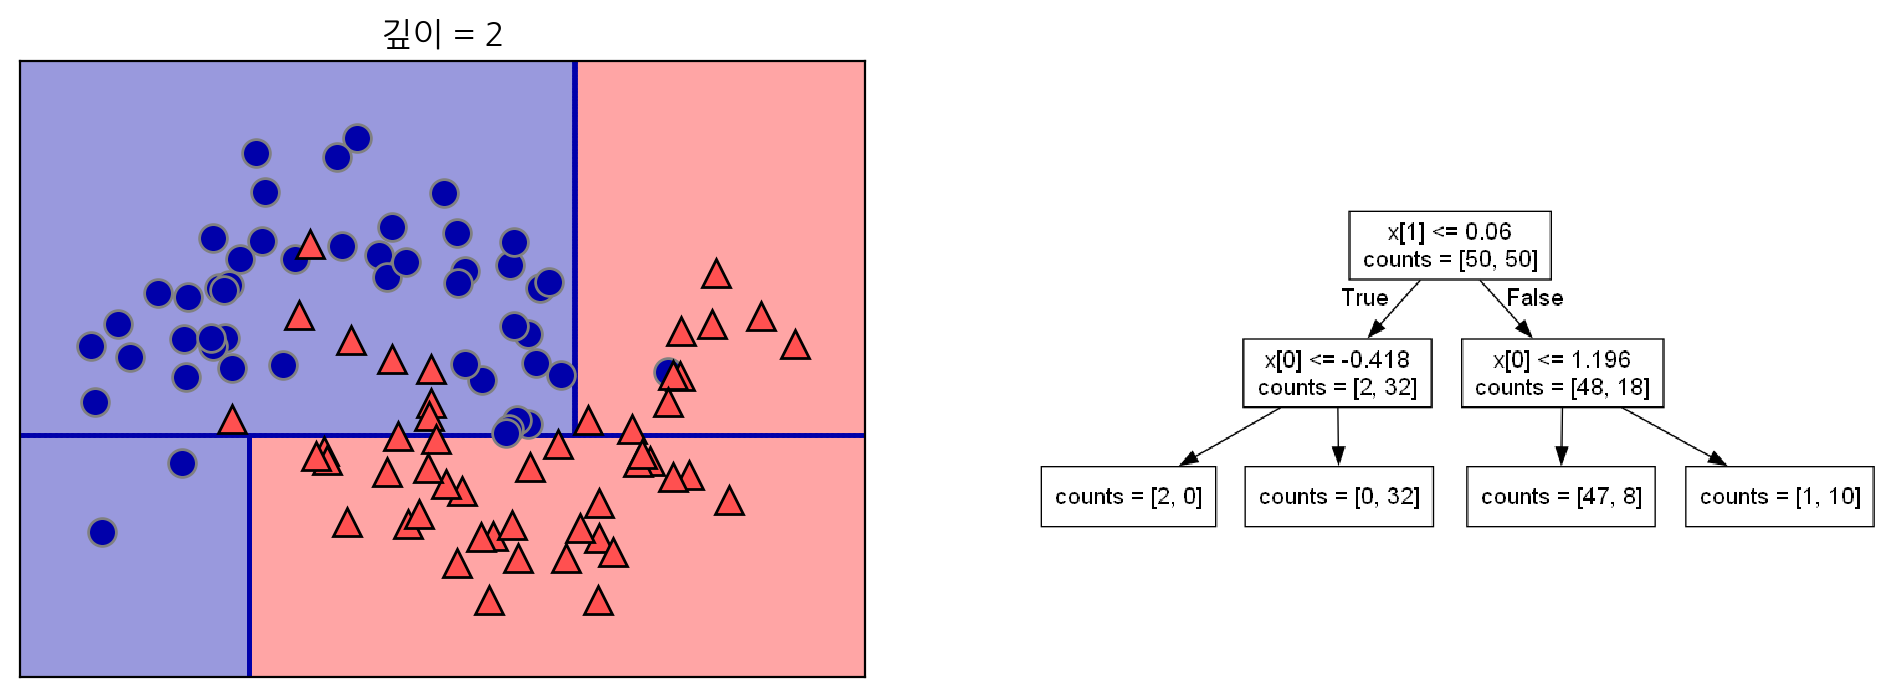

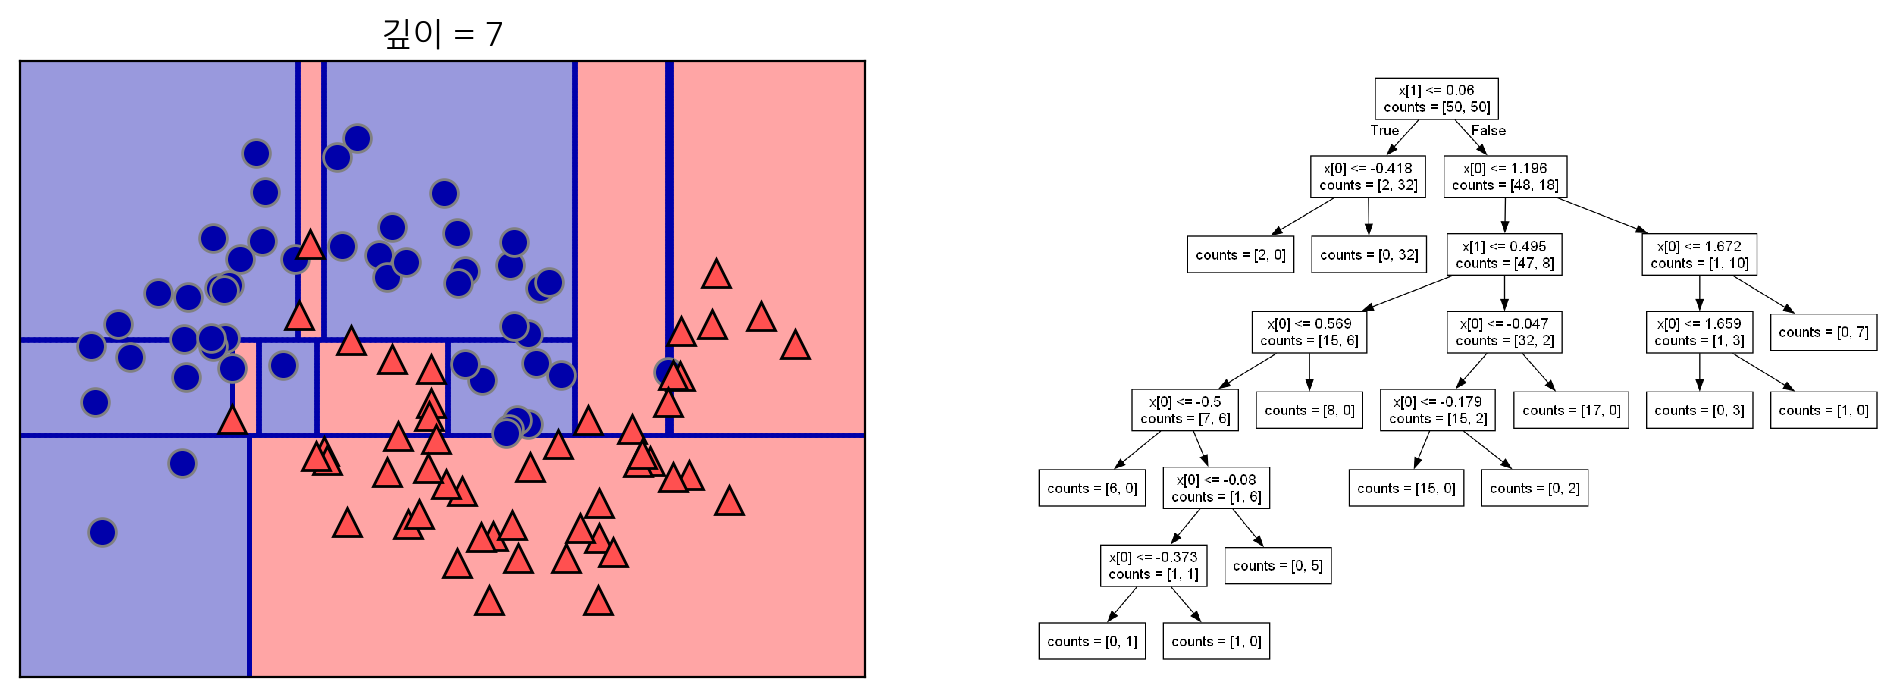

In [69]:
# 결정트리 과정을 시각적으로 도식화
mglearn.plots.plot_tree_progressive()

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=42)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)
print(tree.score(X_train,y_train), tree.score(X_test, y_test))

1.0 0.951048951048951


In [71]:
cancer["target"] # 과대적합 해소? ---> 이걸 파악해야 알 수 있음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [72]:
cancer["data"].shape

(569, 30)

### 일반적인 결정트리 학습

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # 이거 기억 !

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, # 2. 원래 데이터셋에서 각 클래스의 비율을 유지
                                                    random_state=42)        #    분류는 가능하지만 회귀에서는 쓰지 않도록
tree = DecisionTreeClassifier(max_depth=4, random_state=42) # 1. 30개 다 외우지 못하도록 트리의 depth 조절 (max_depth=4 설정)
tree.fit(X_train, y_train)
tree.score(X_train, y_train)
print(tree.score(X_train,y_train), tree.score(X_test, y_test))

0.9882629107981221 0.9440559440559441


### 결정트리 시각화

In [74]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names,
                impurity=False, filled=True)

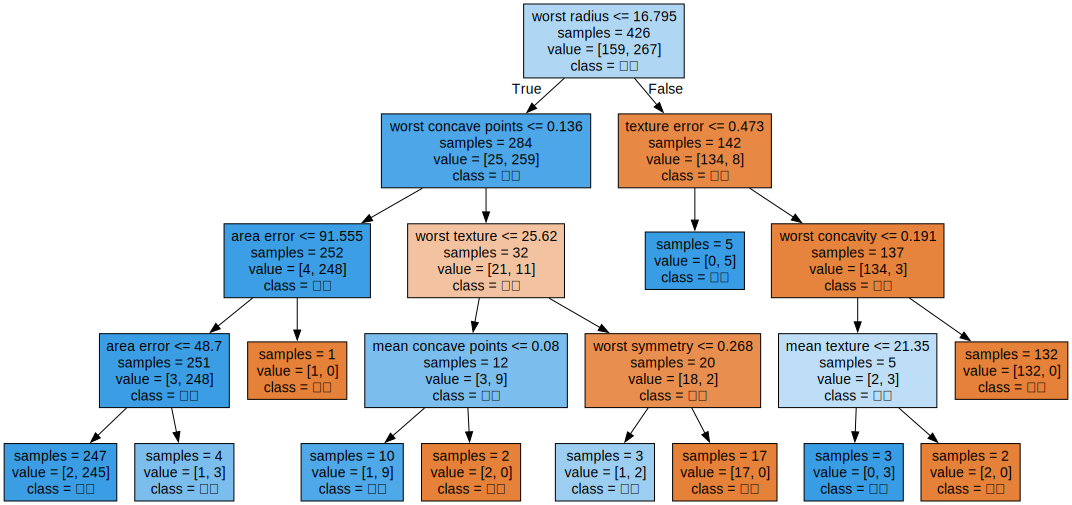

In [75]:
import graphviz

try:
    with open("tree.dot", encoding='utf-8') as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))
except UnicodeDecodeError as e:
    print("UnicodeDecodeError:", e)

### 결정트리 분석
- depth가 길수록 과대적합 가능성 높음
- 윗부분보다는 아래쪽에 분류된 노드 확인
- 양끝(양성-양성-양성, 음성-음성-음성)은 확실한 데이터니까 크게 중요X
- 사이에 위치한 악성-양성, 양성-악성 이런 노드들이 중요

# 특성 중요도

In [76]:
def plot_feat_importances(model):
    n_feat = cancer.data.shape[1]
    plt.barh(np.arange(n_feat),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_feat), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_feat)

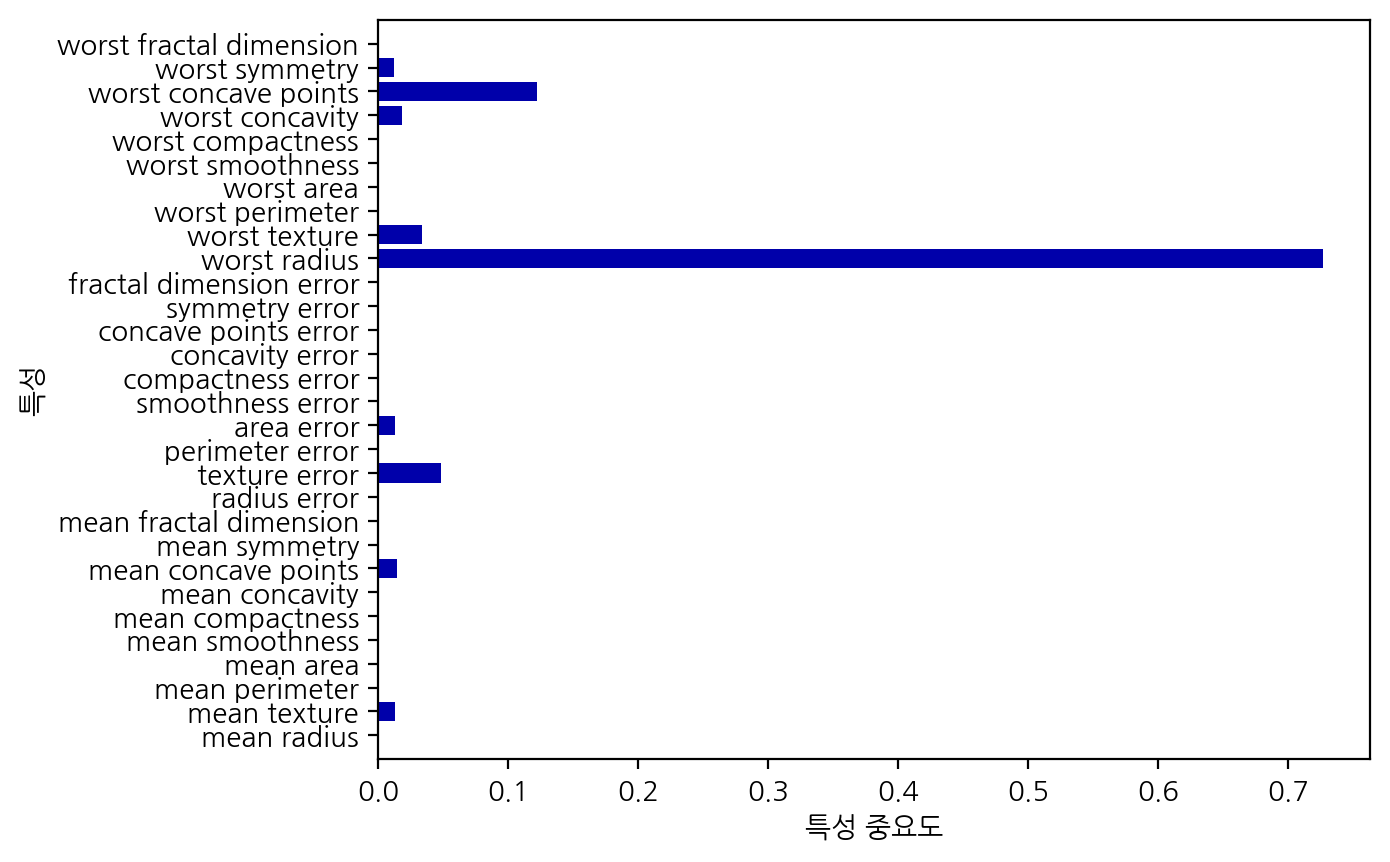

In [77]:
plot_feat_importances(tree)

In [78]:
tree.feature_importances_

array([0.   , 0.013, 0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.   ,
       0.   , 0.   , 0.048, 0.   , 0.013, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.033, 0.   , 0.   , 0.   , 0.   , 0.018,
       0.122, 0.012, 0.   ])

# 랜덤 포레스트
- 앙상블
- 결정트리는 주요특징 파악에만 사용하고
- 데이터 분류, 회귀 시에는 대부분 랜덤 포레스트

In [79]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier ###

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42) ### n_estimators : 트리개수 (default=100개)
rfc.fit(X_train, y_train)
print(rfc.score(X_train,y_train), rfc.score(X_test, y_test))
# 아직 과대적합 해결안됨

1.0 0.958041958041958


In [80]:
from sklearn.tree import export_graphviz
# 예측기 1개를 선택
# TODO : forest 전체값으로 변경 -> 변경불가
estimator = rfc.estimators_[3]

export_graphviz(estimator, out_file="forest.dot", 
                class_names=["악성", "양성"],
                feature_names=cancer.feature_names,
                impurity=False, 
                filled=True)

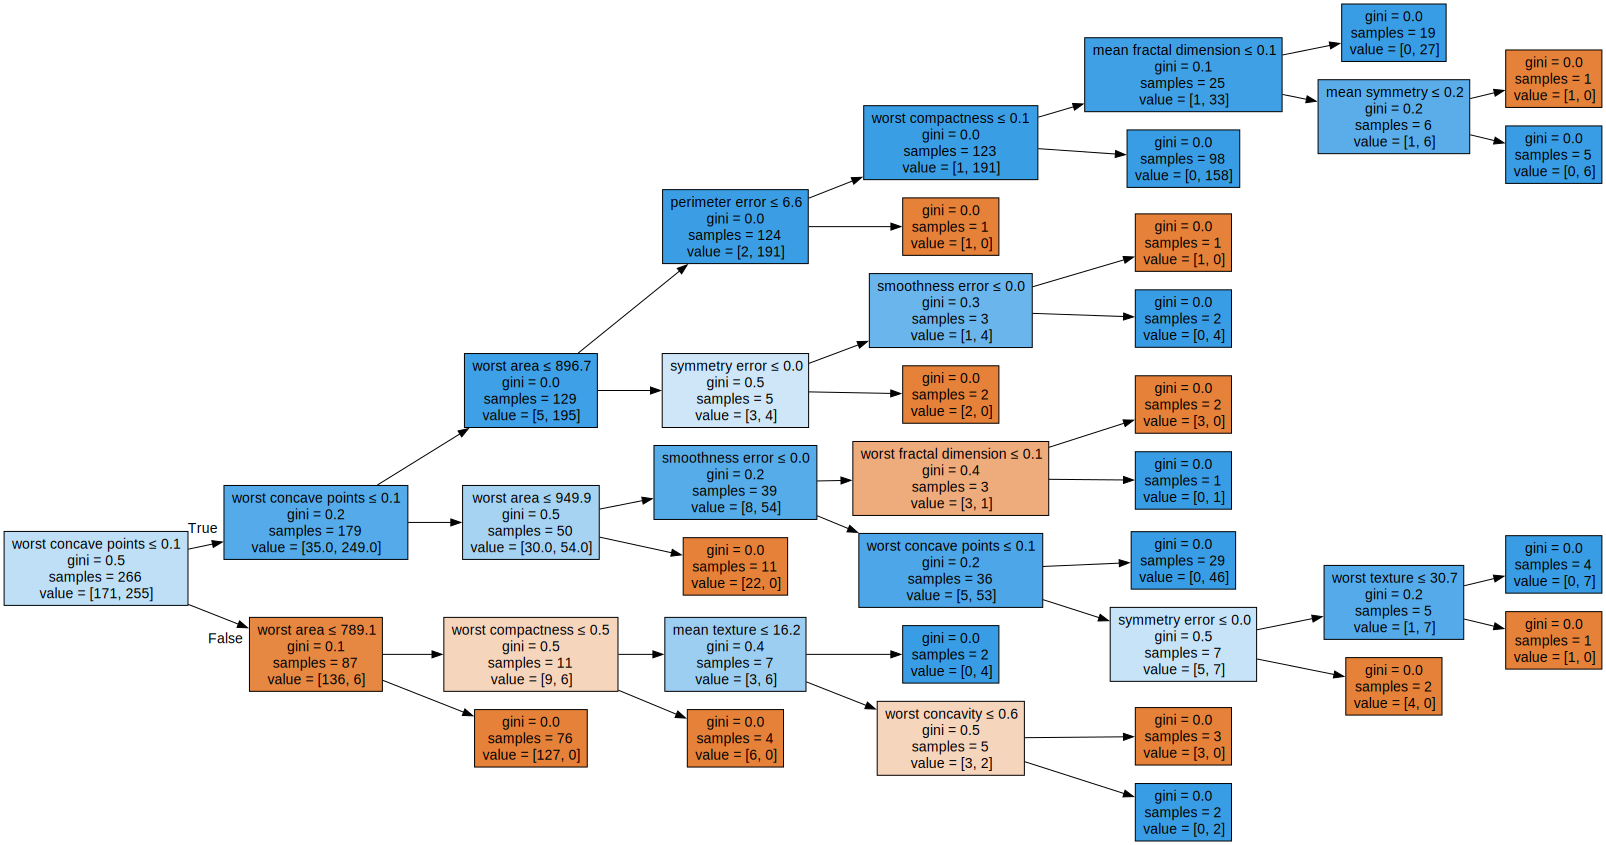

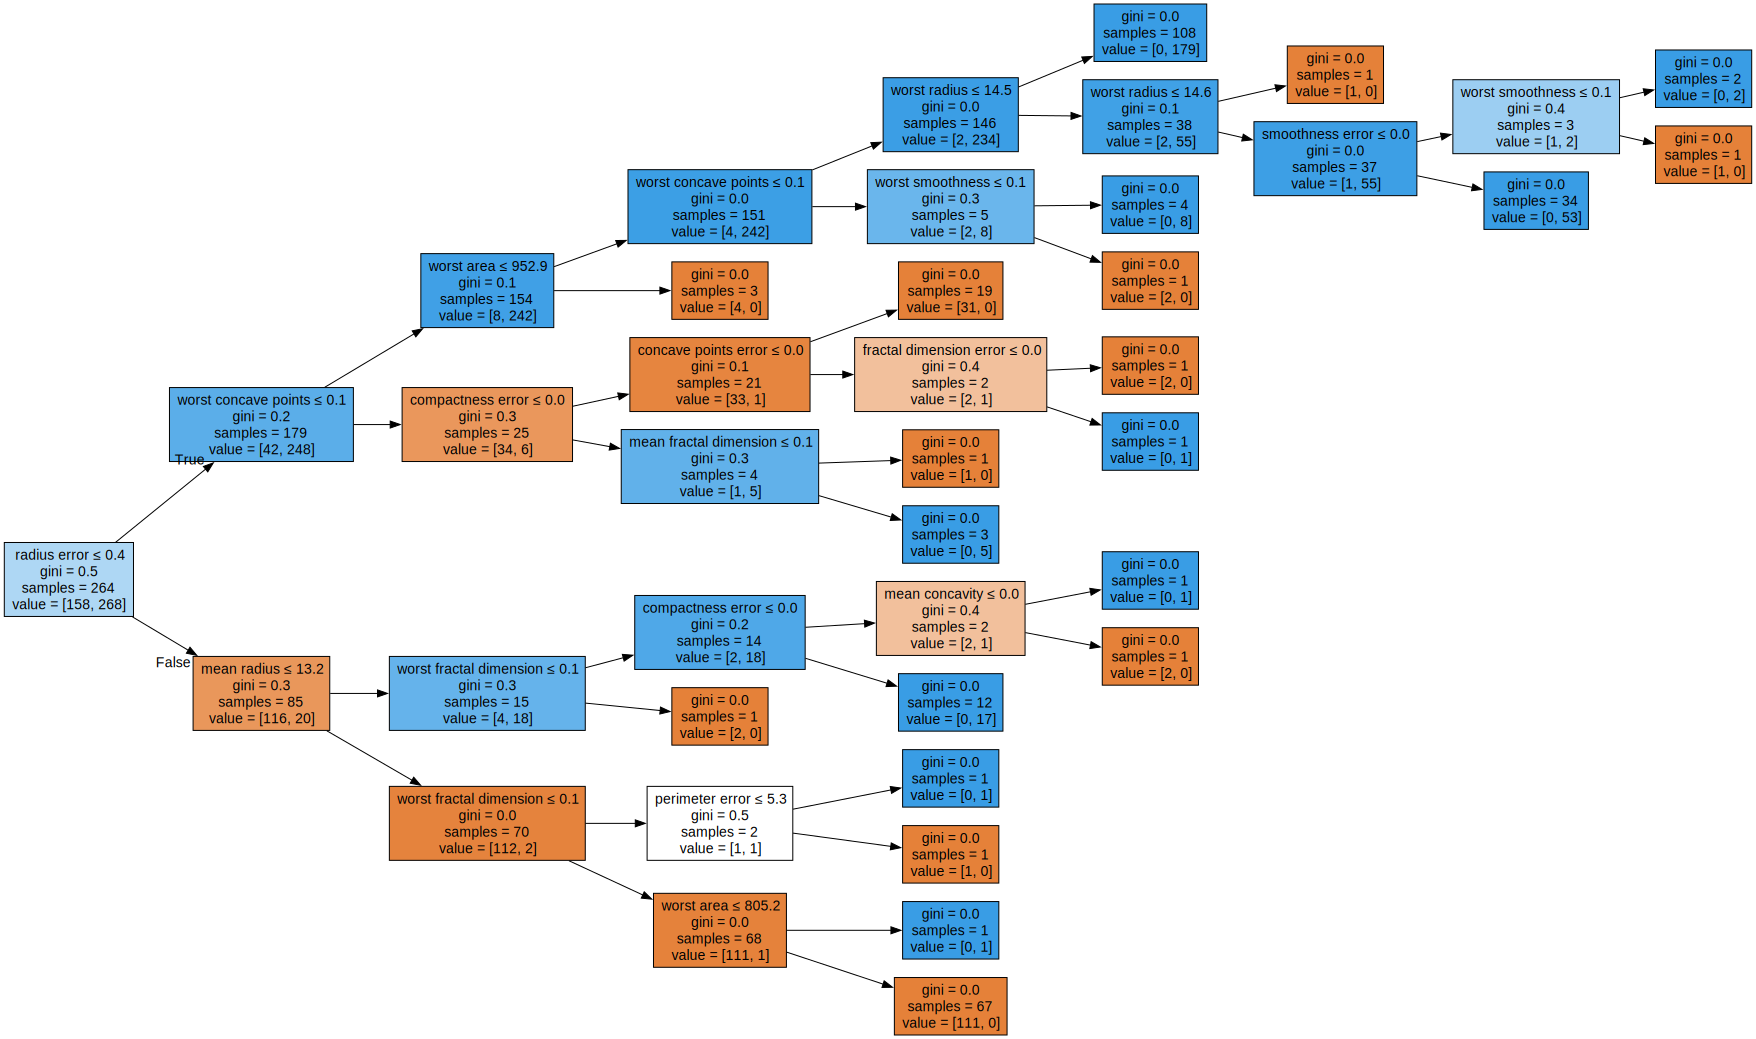

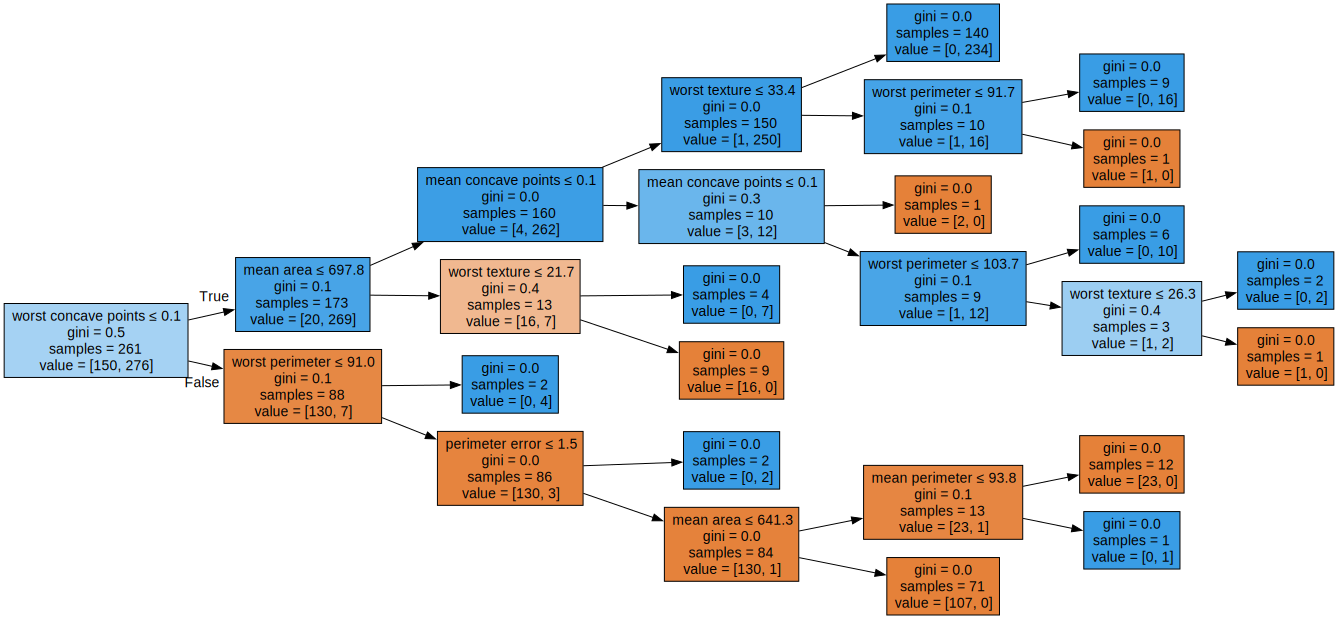

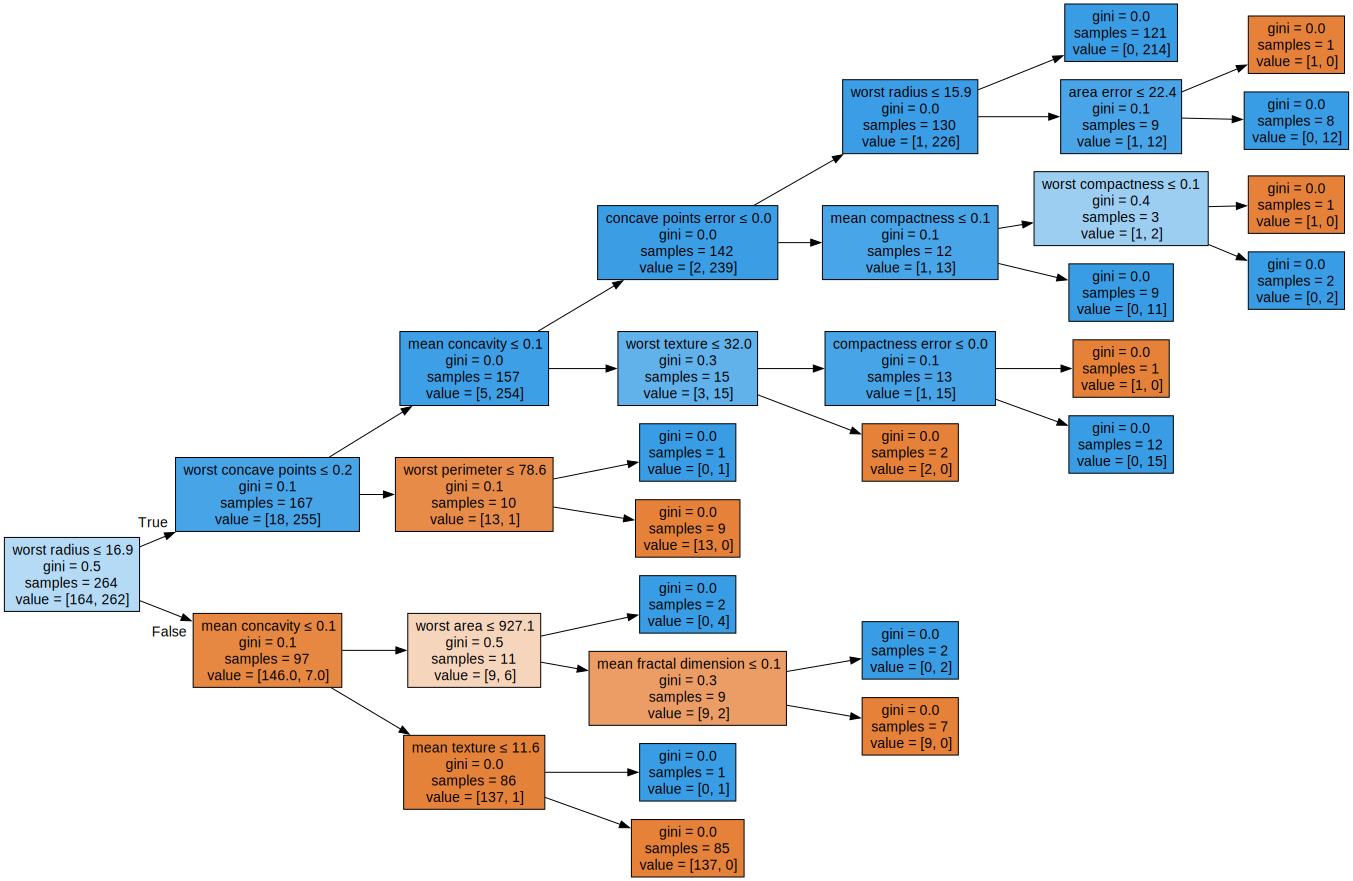

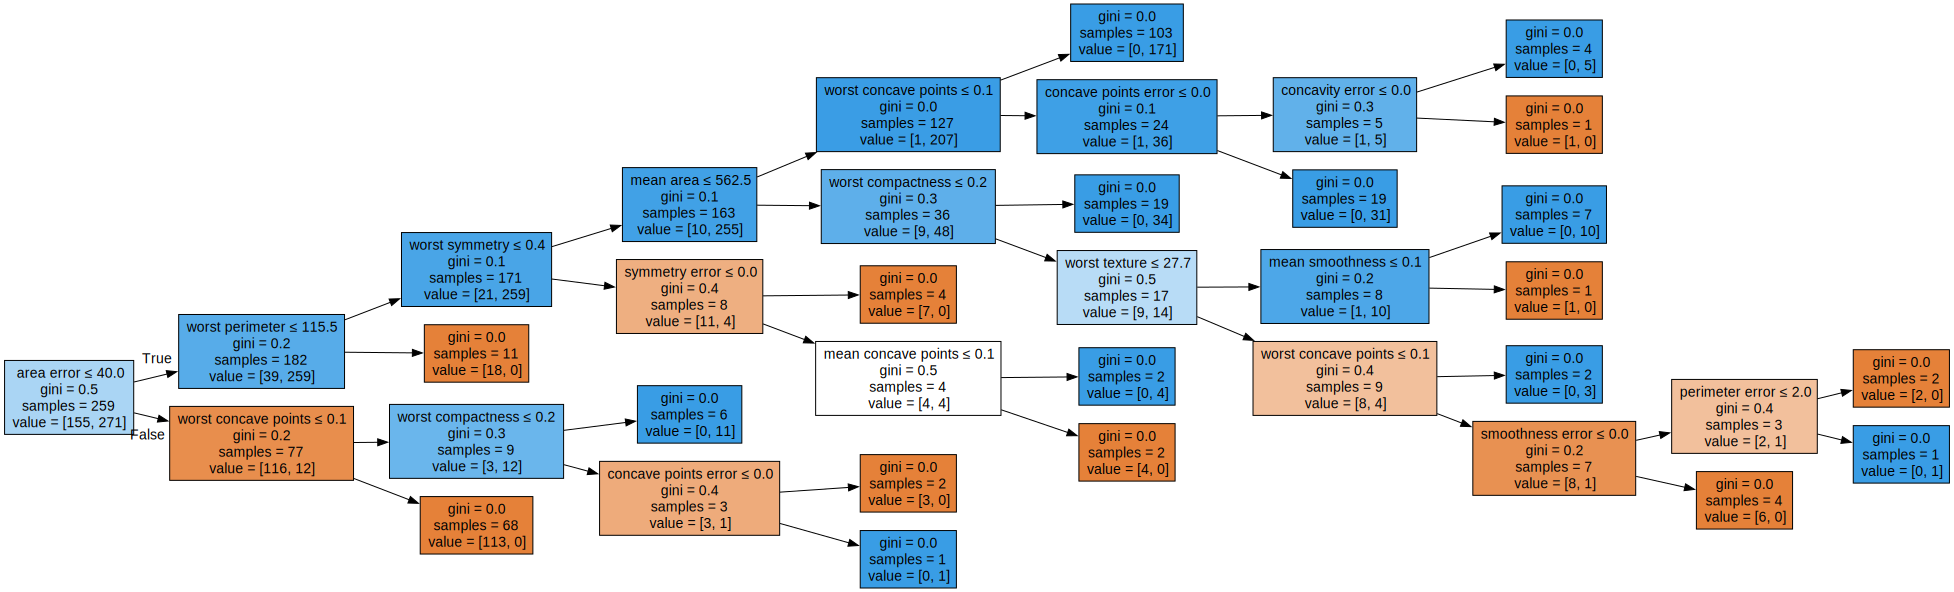

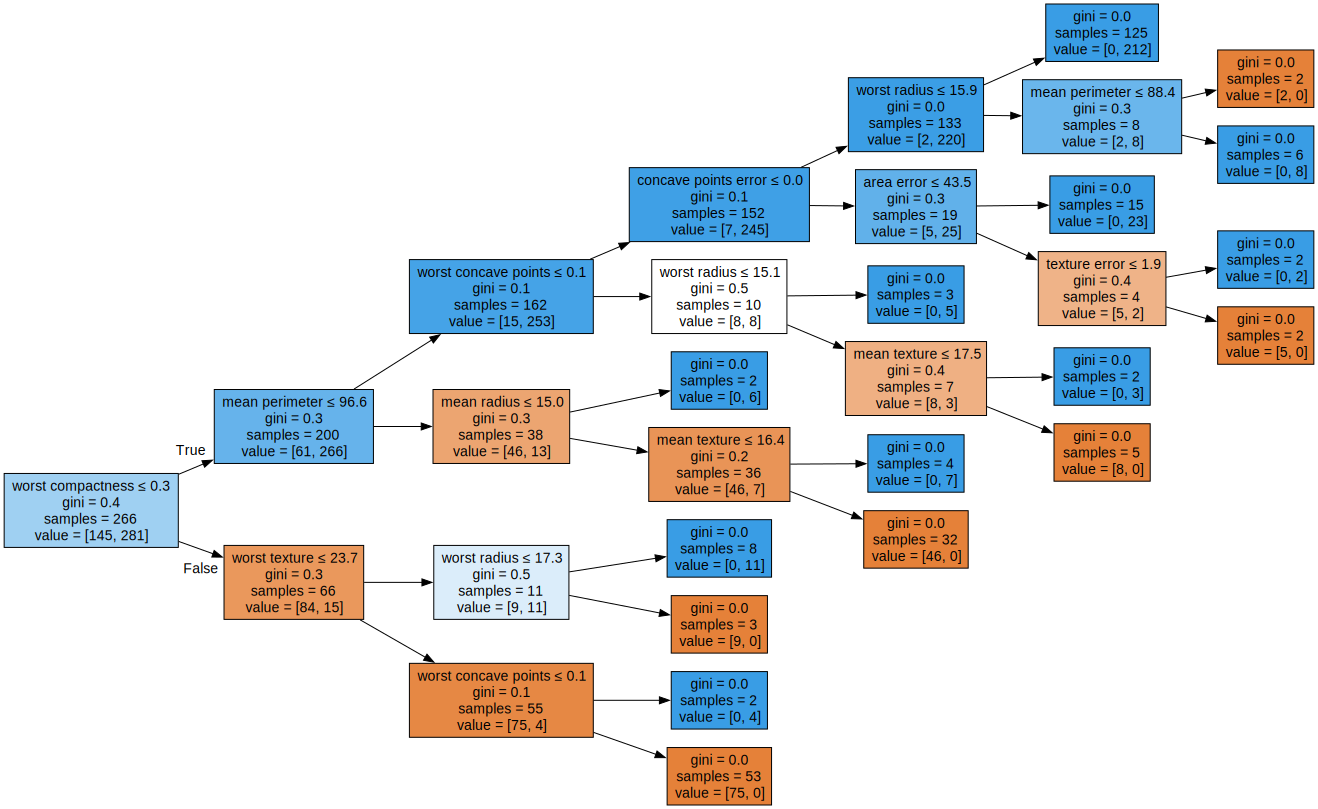

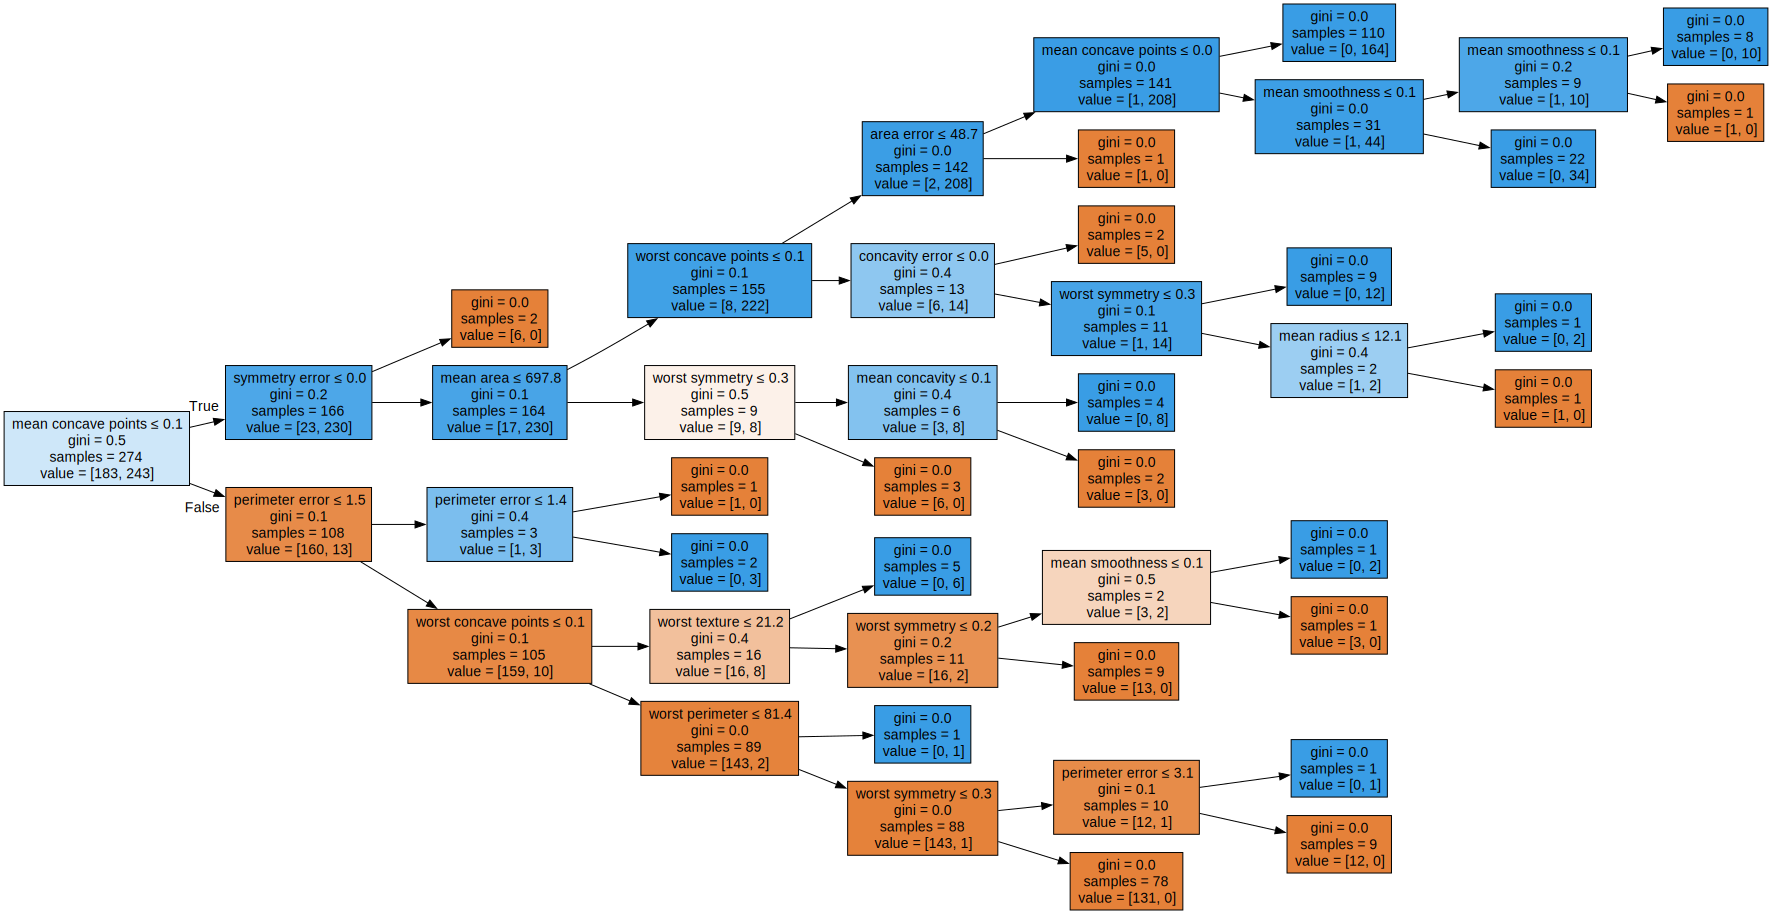

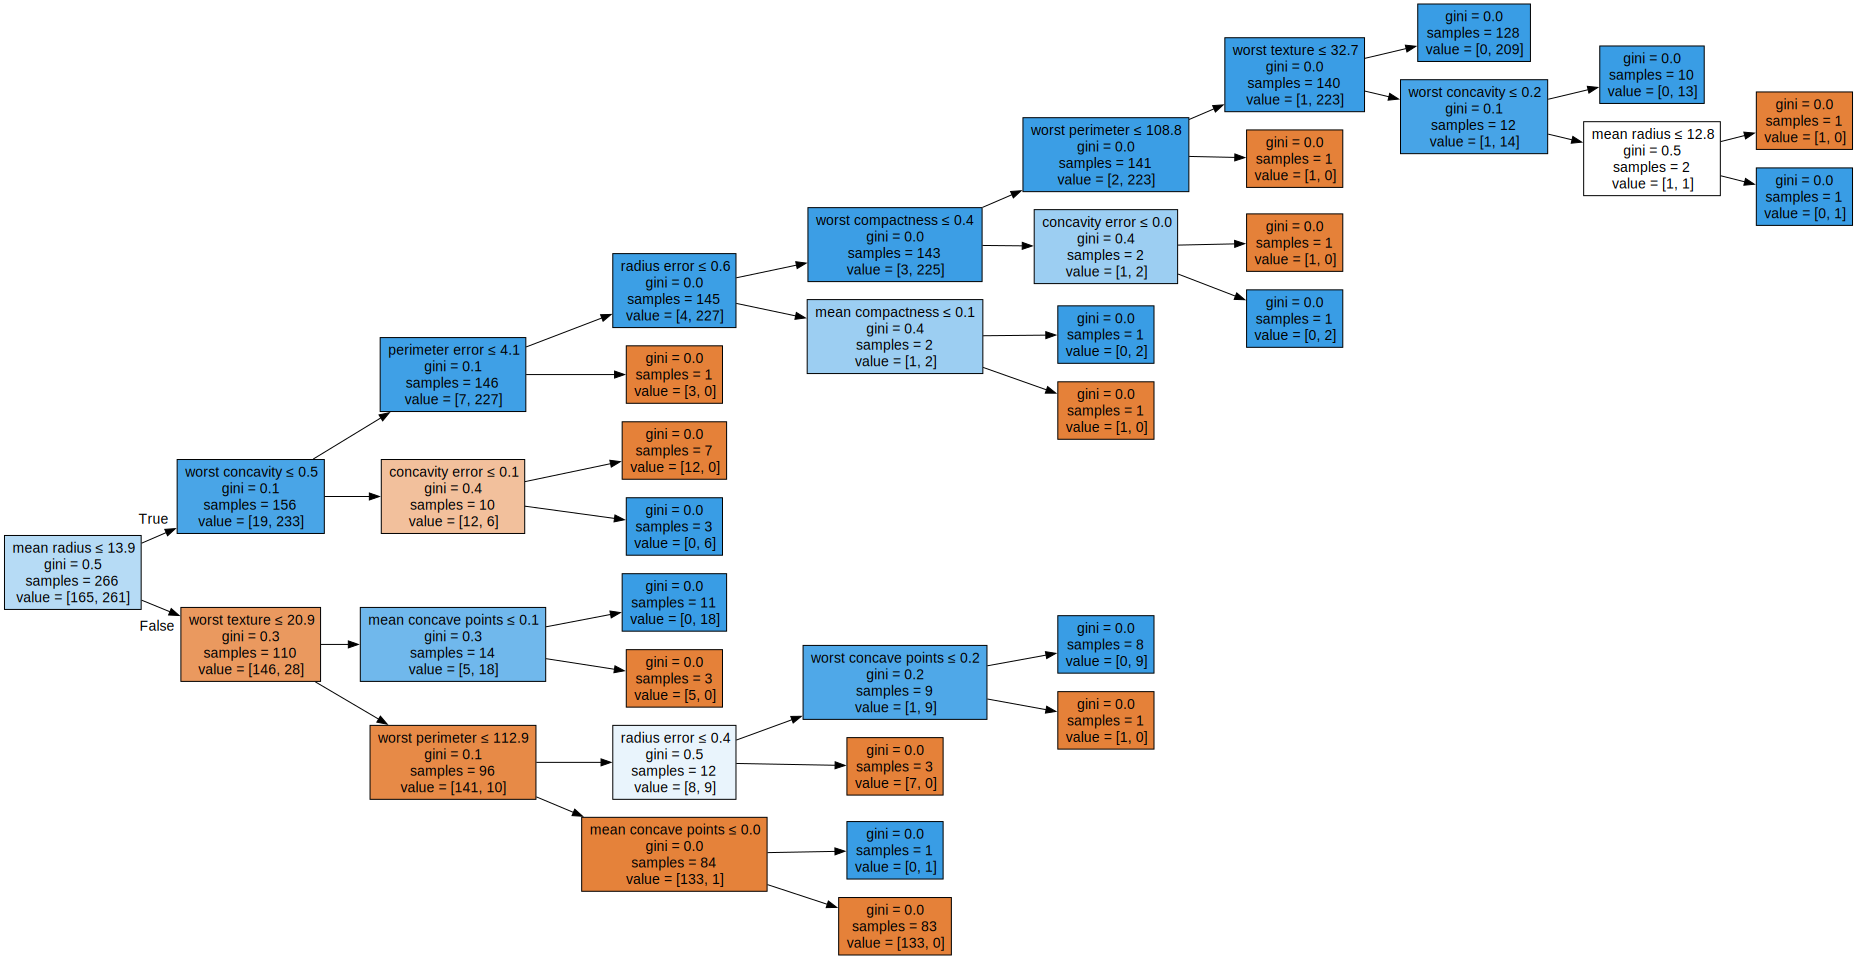

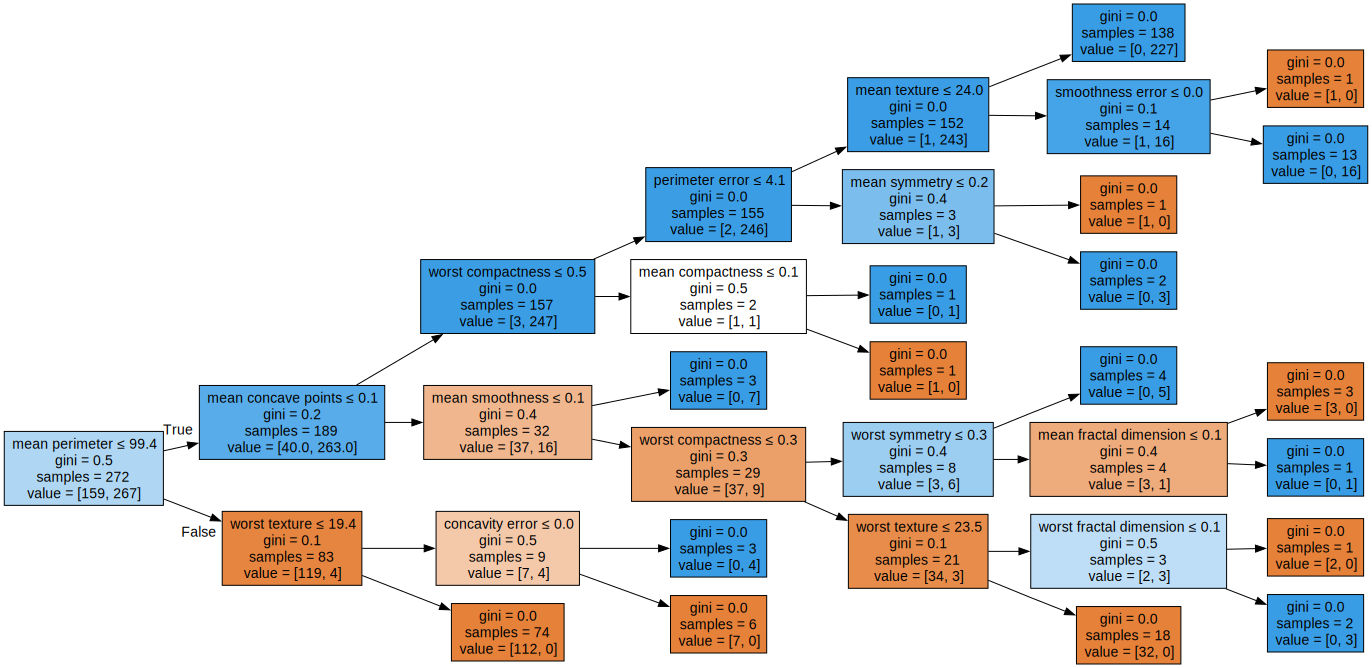

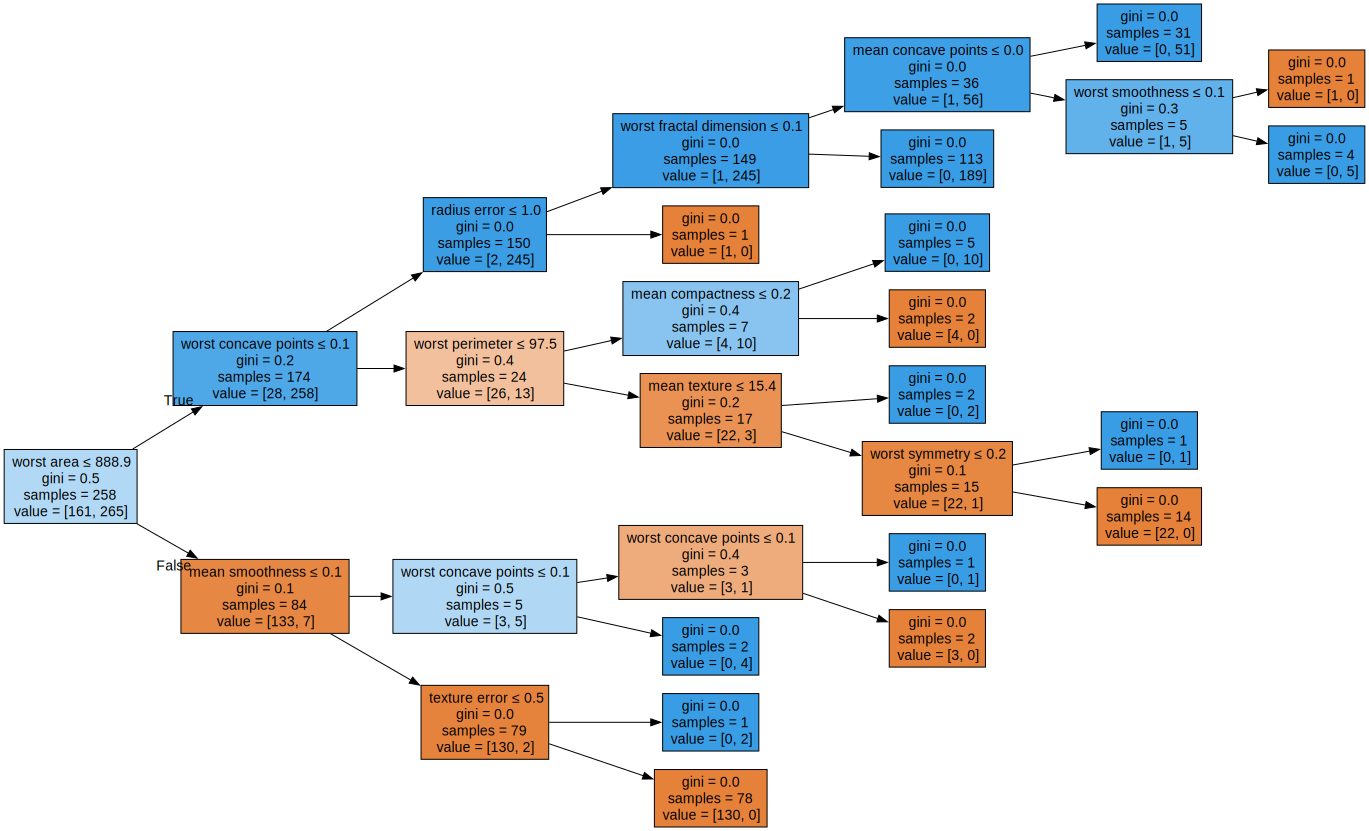

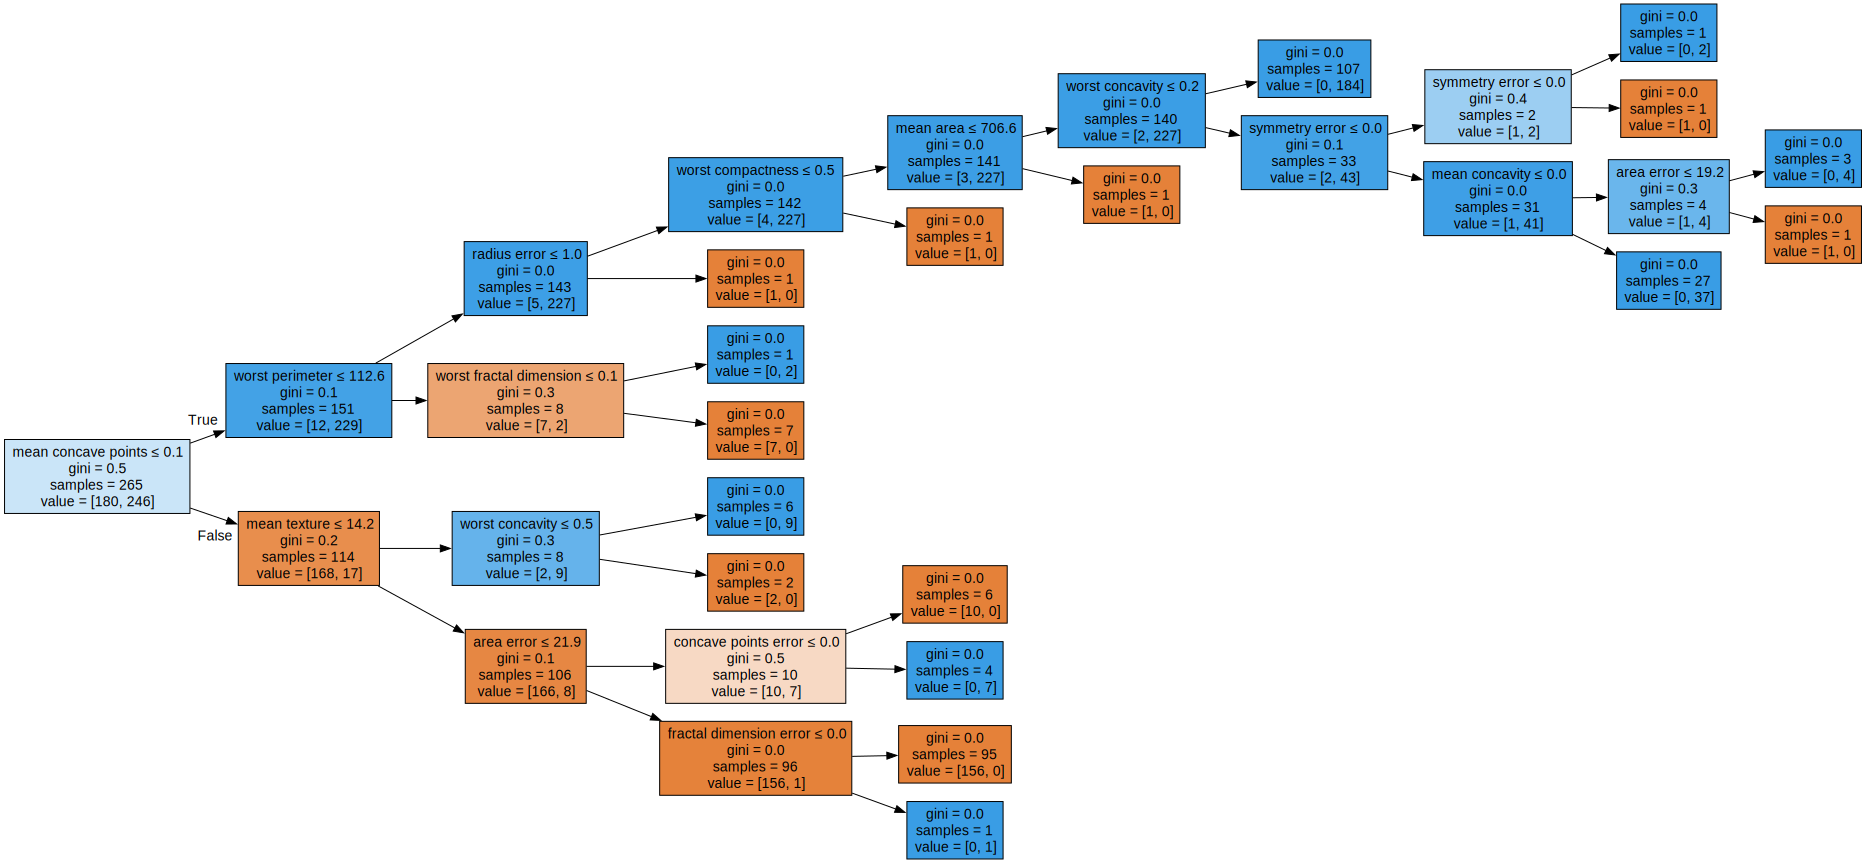

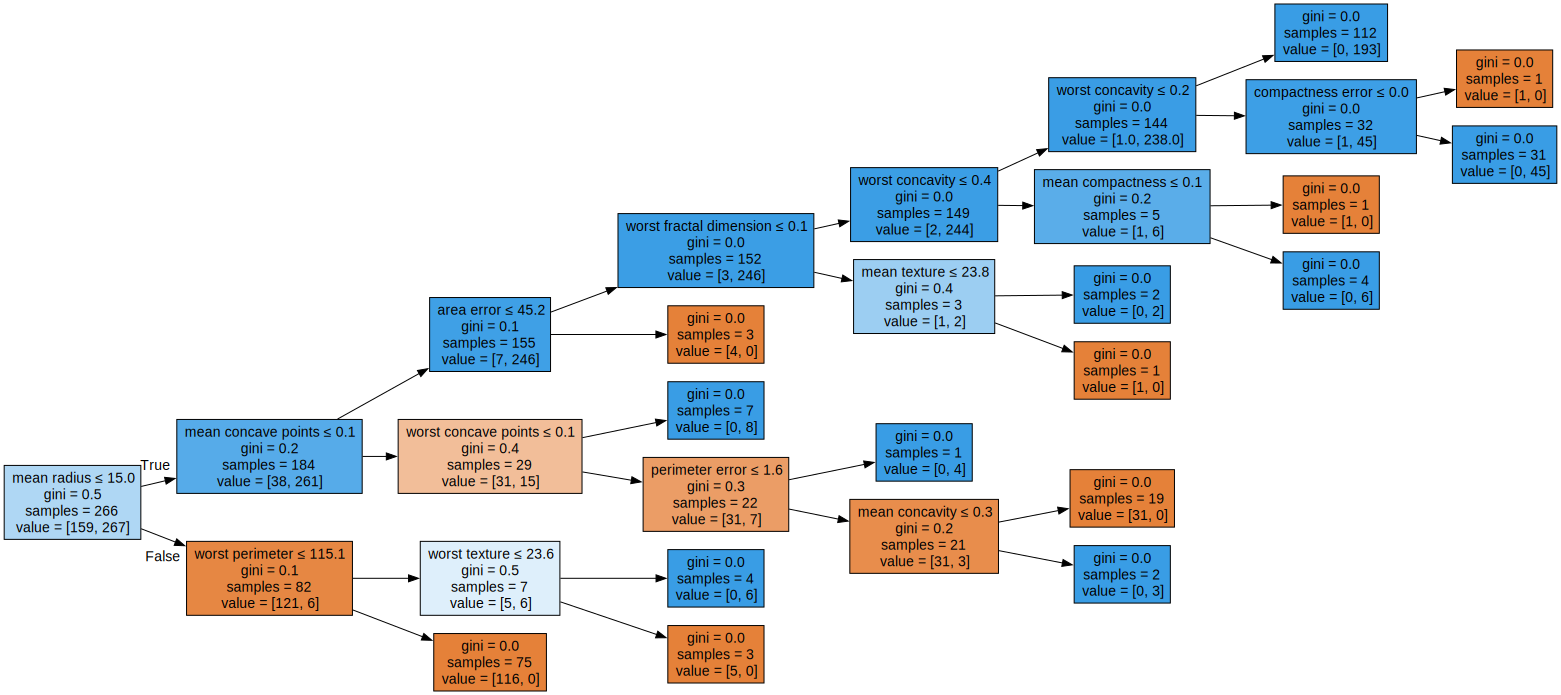

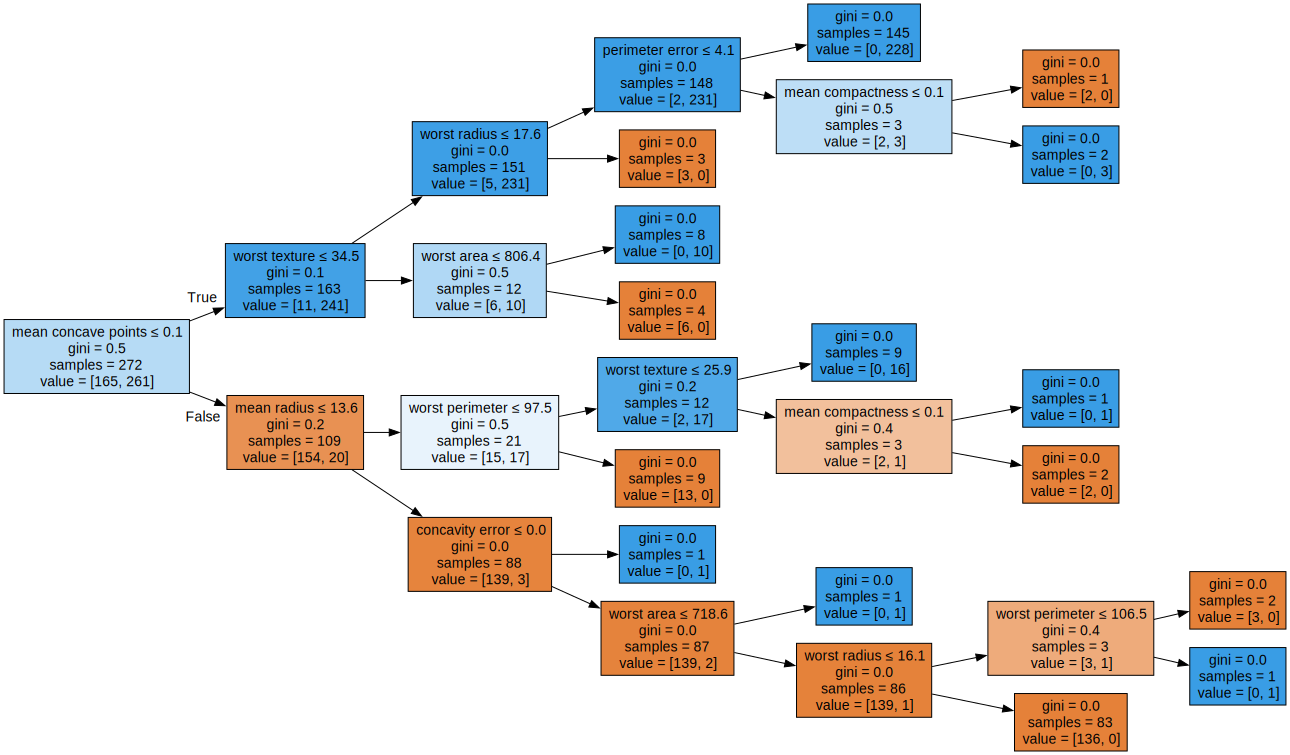

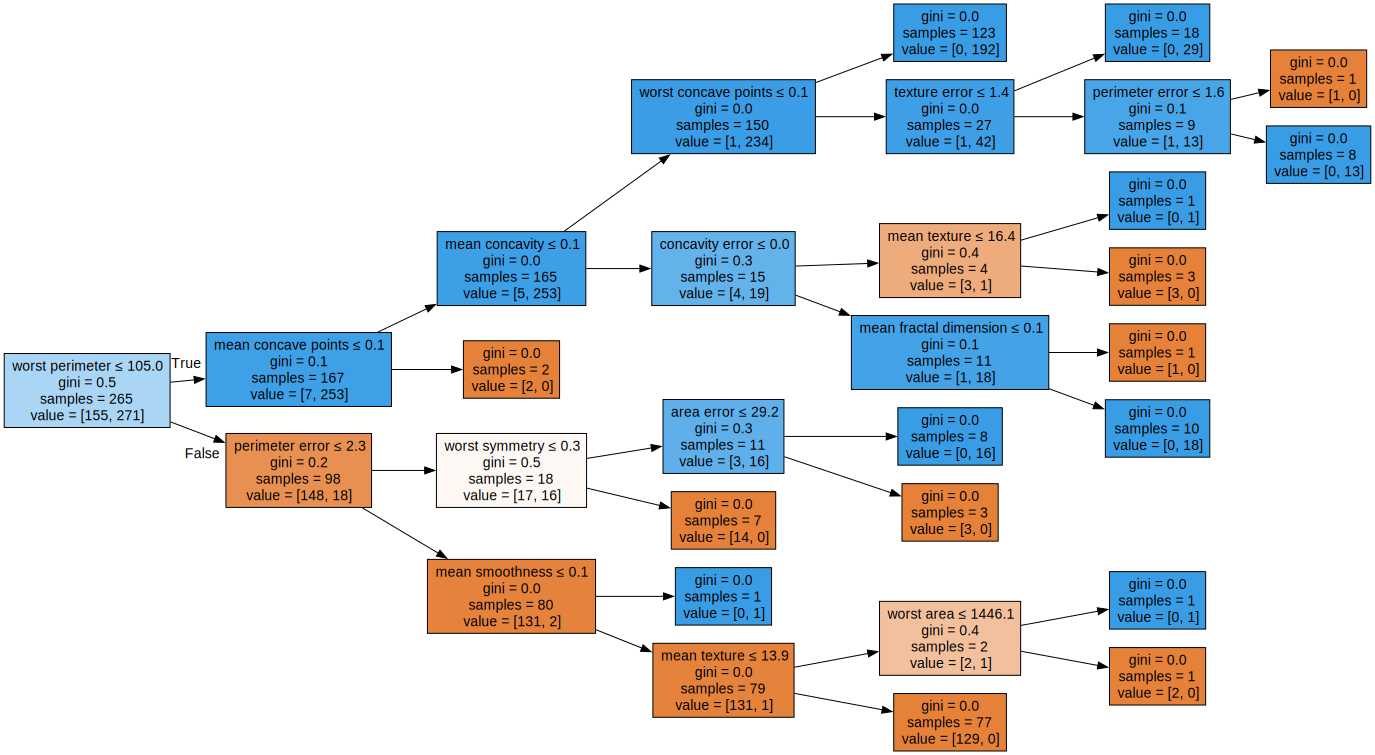

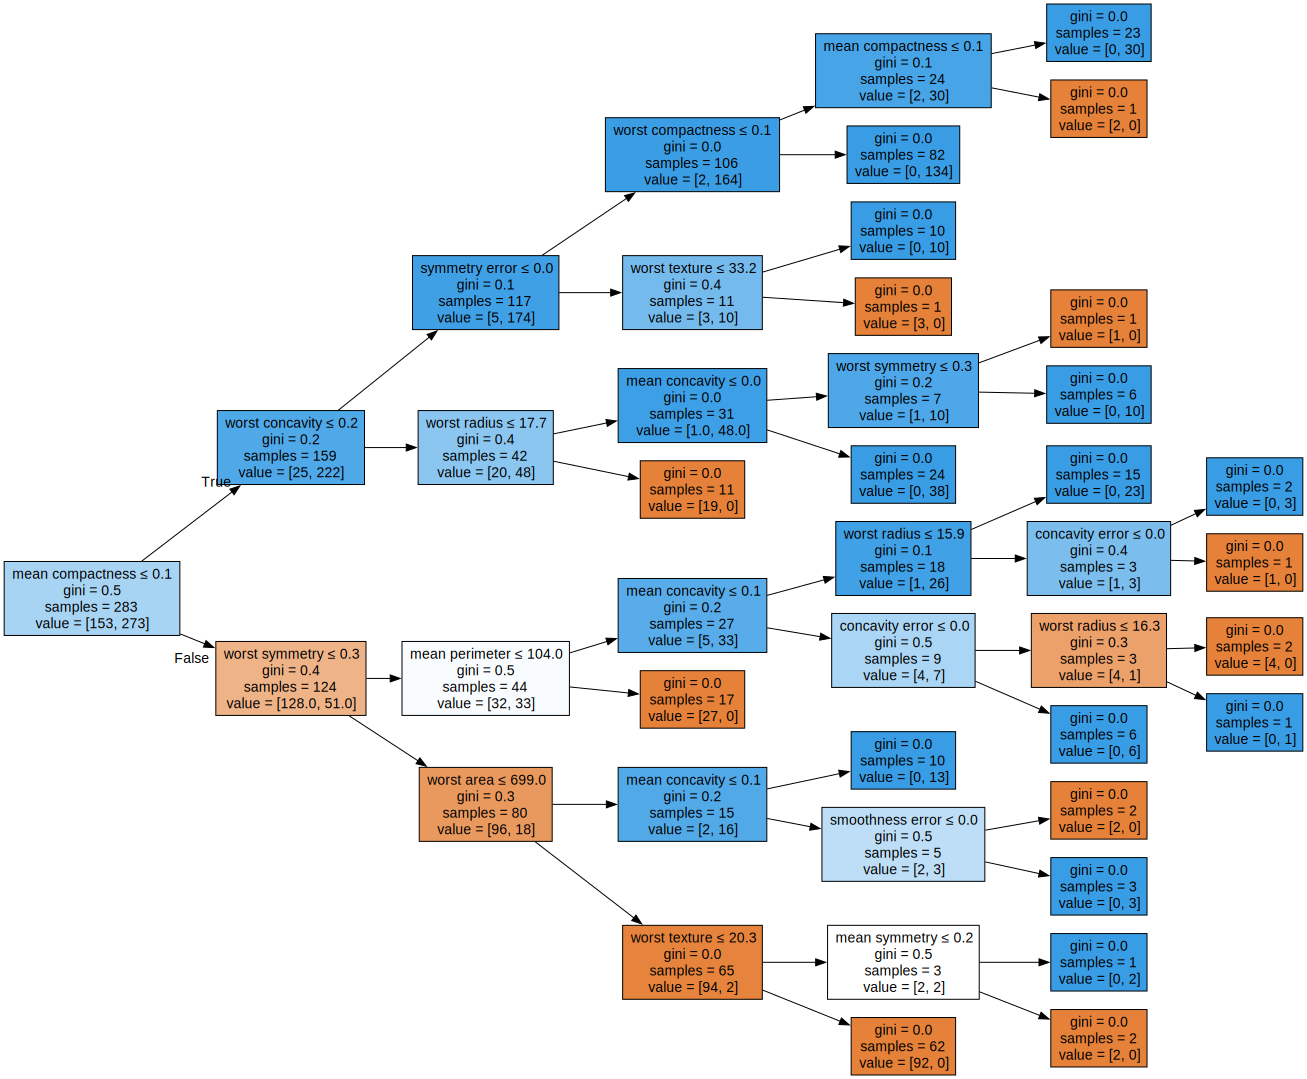

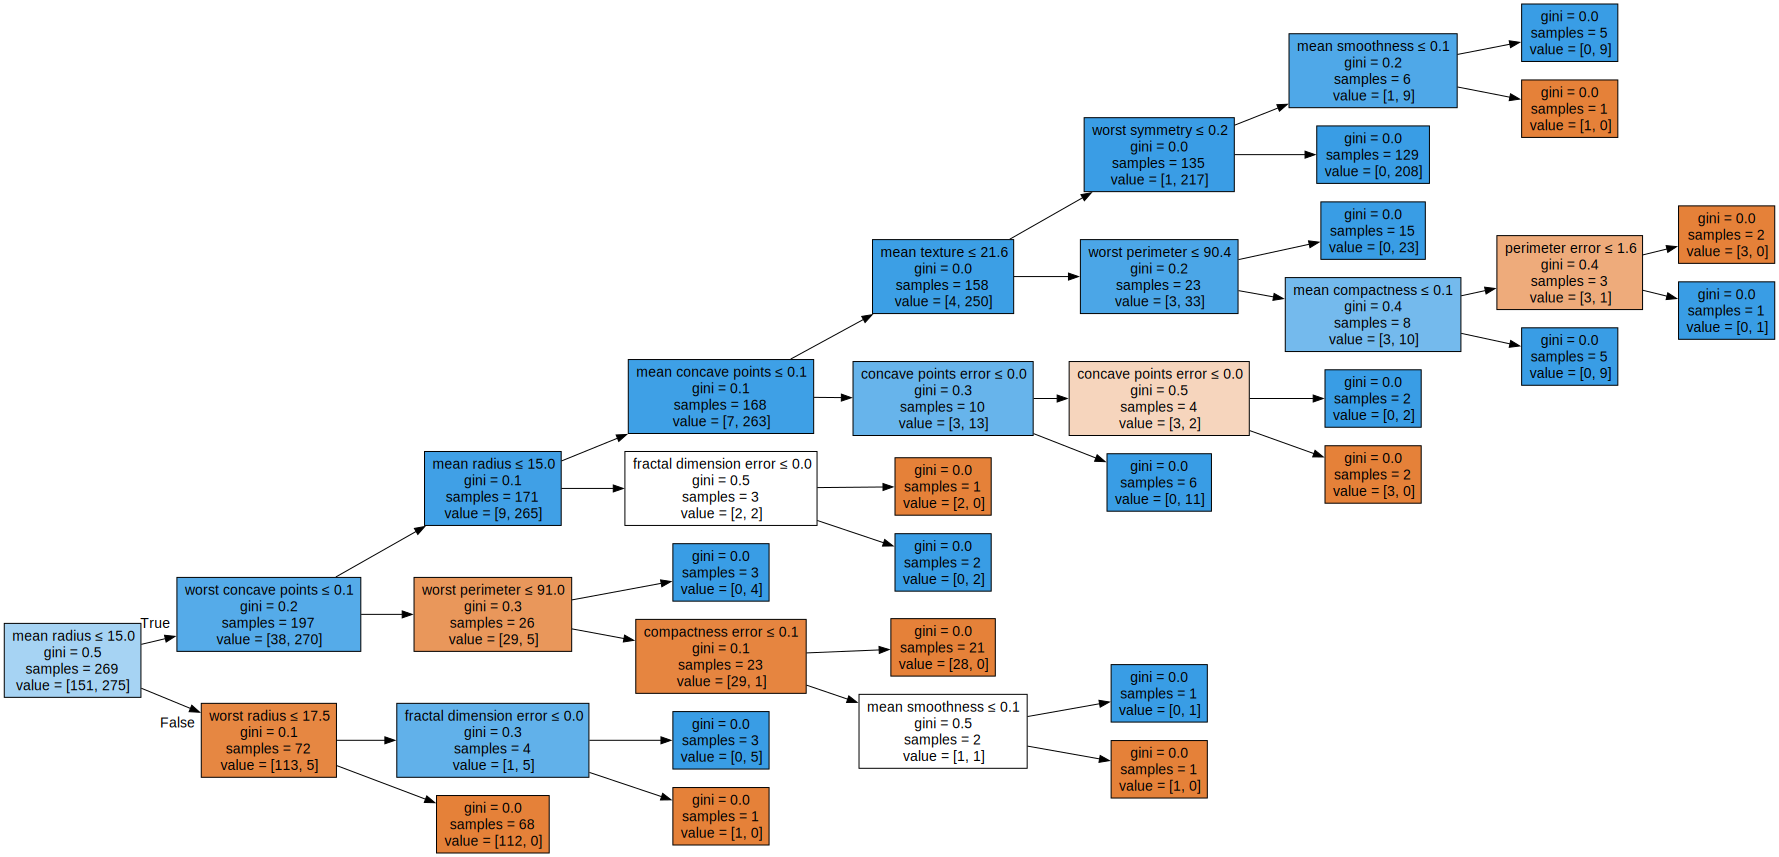

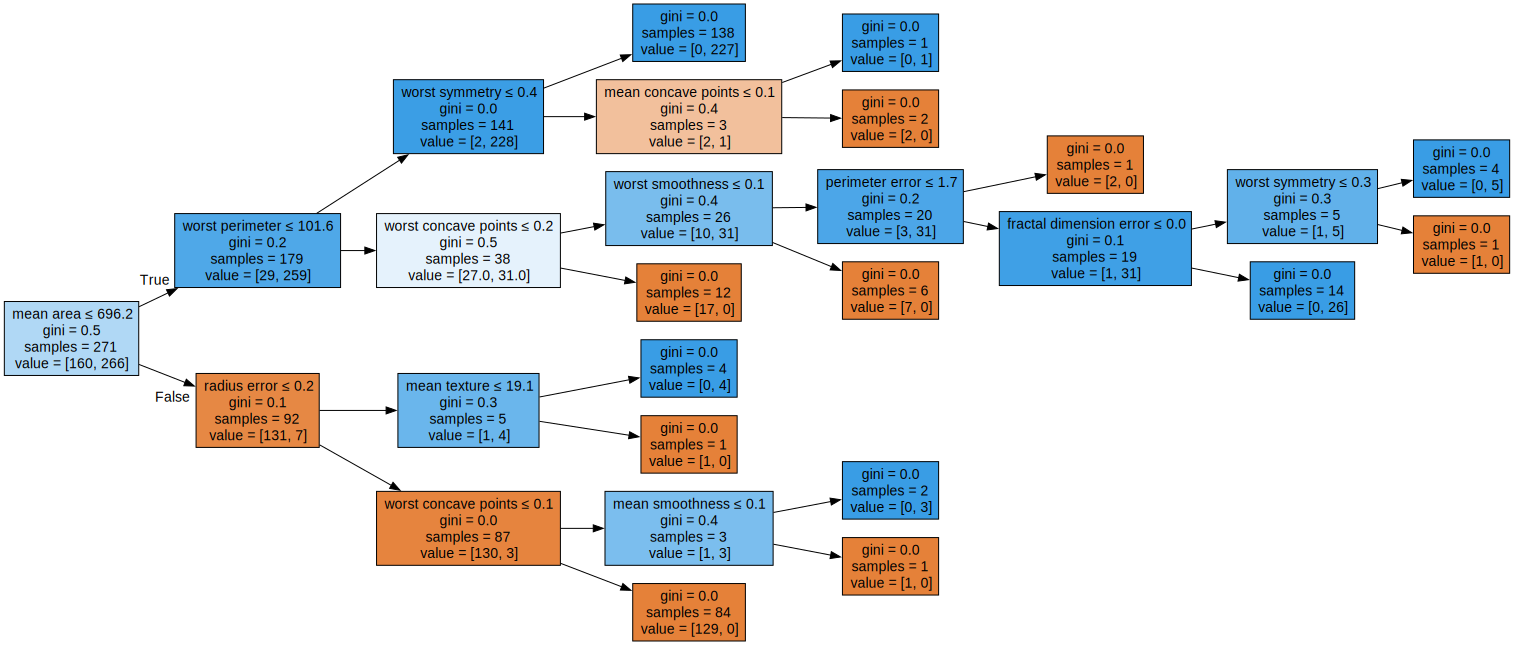

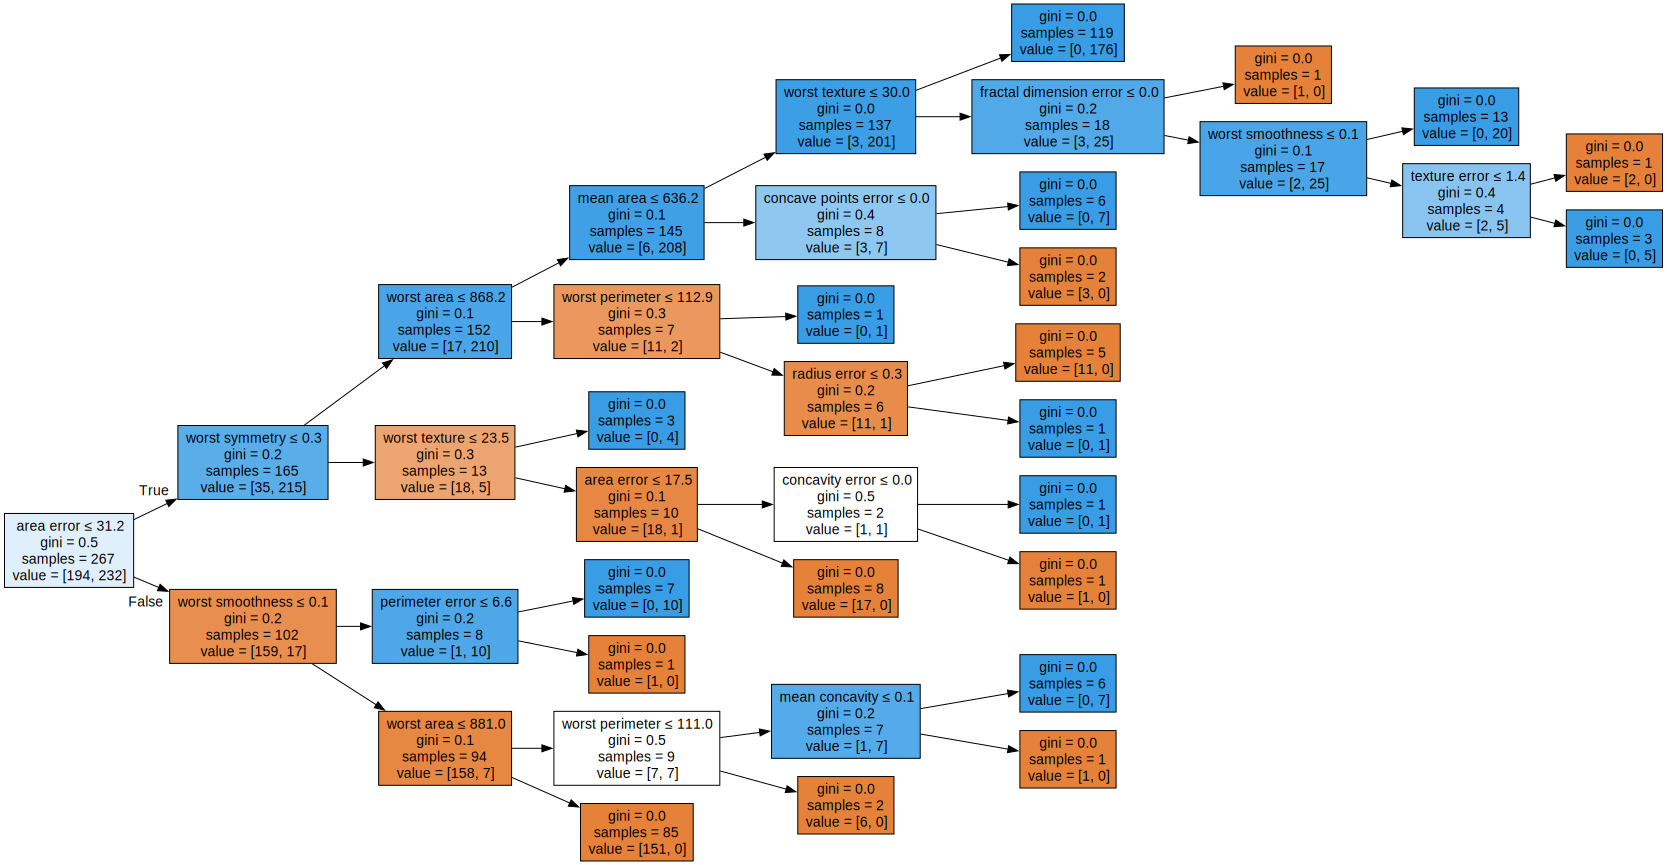

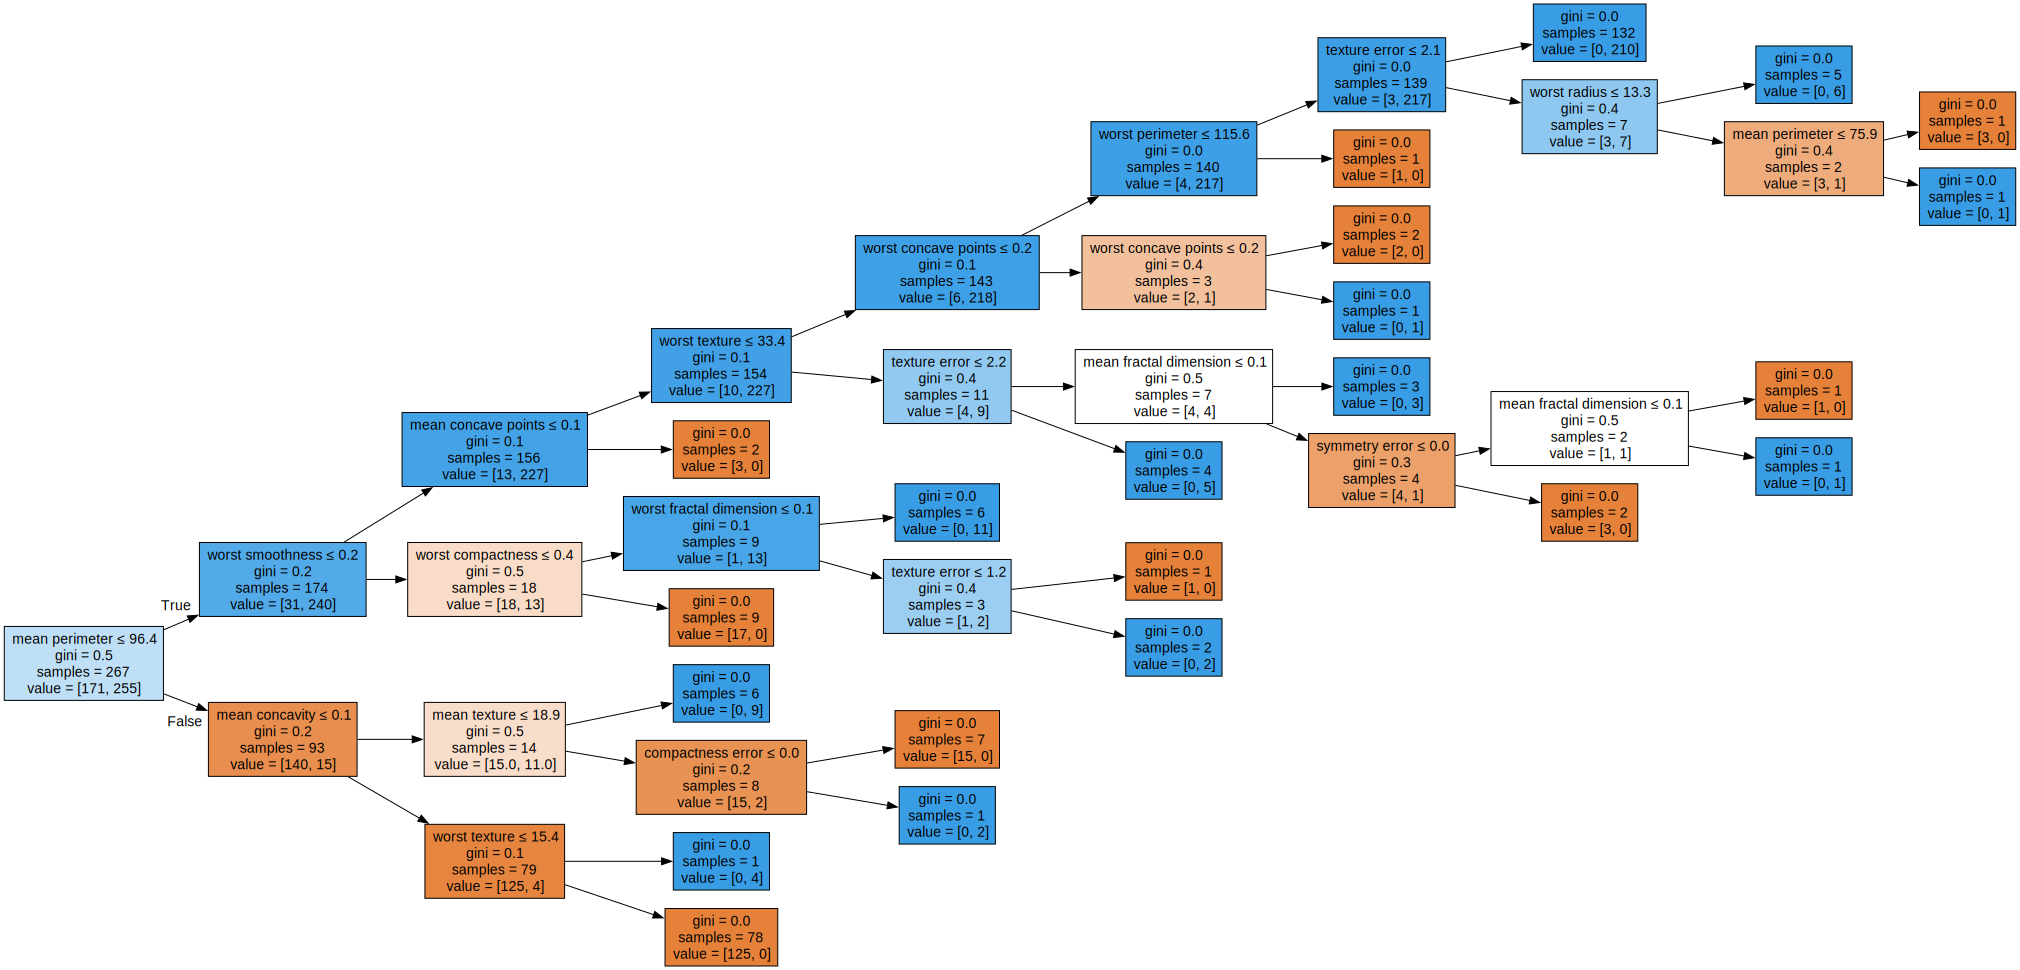

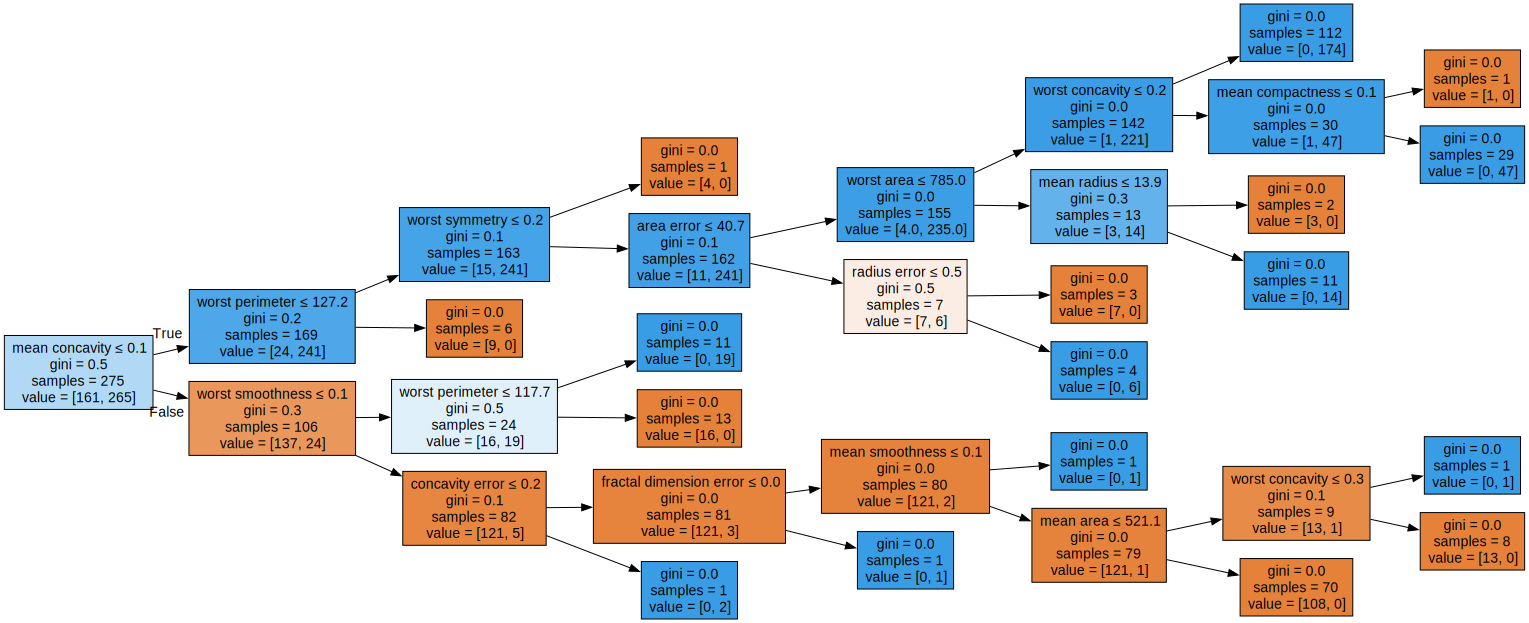

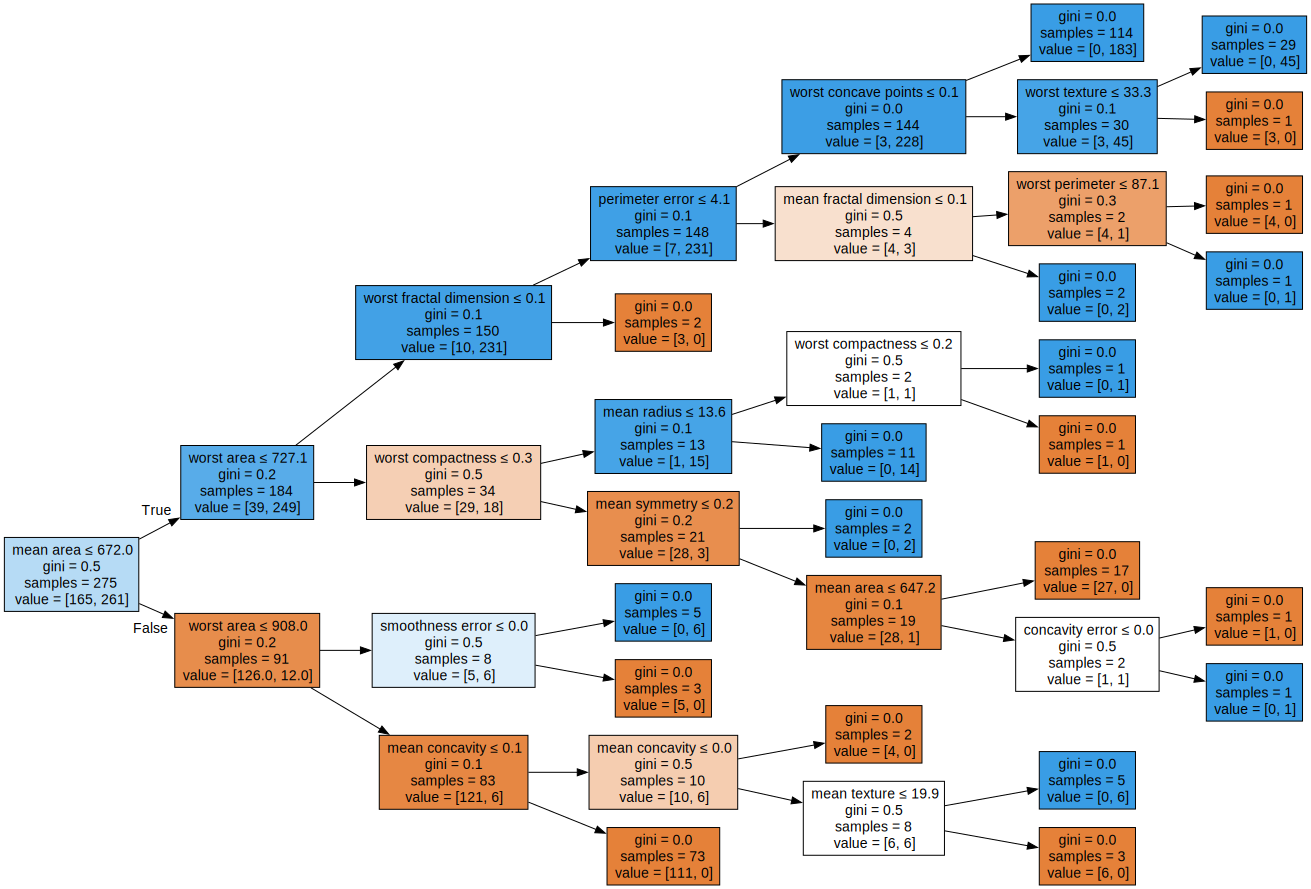

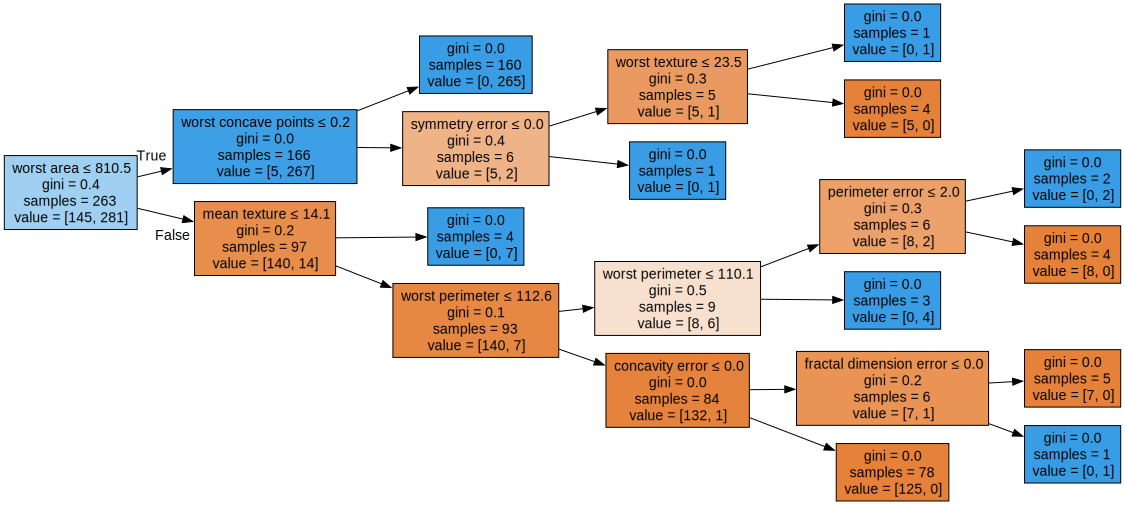

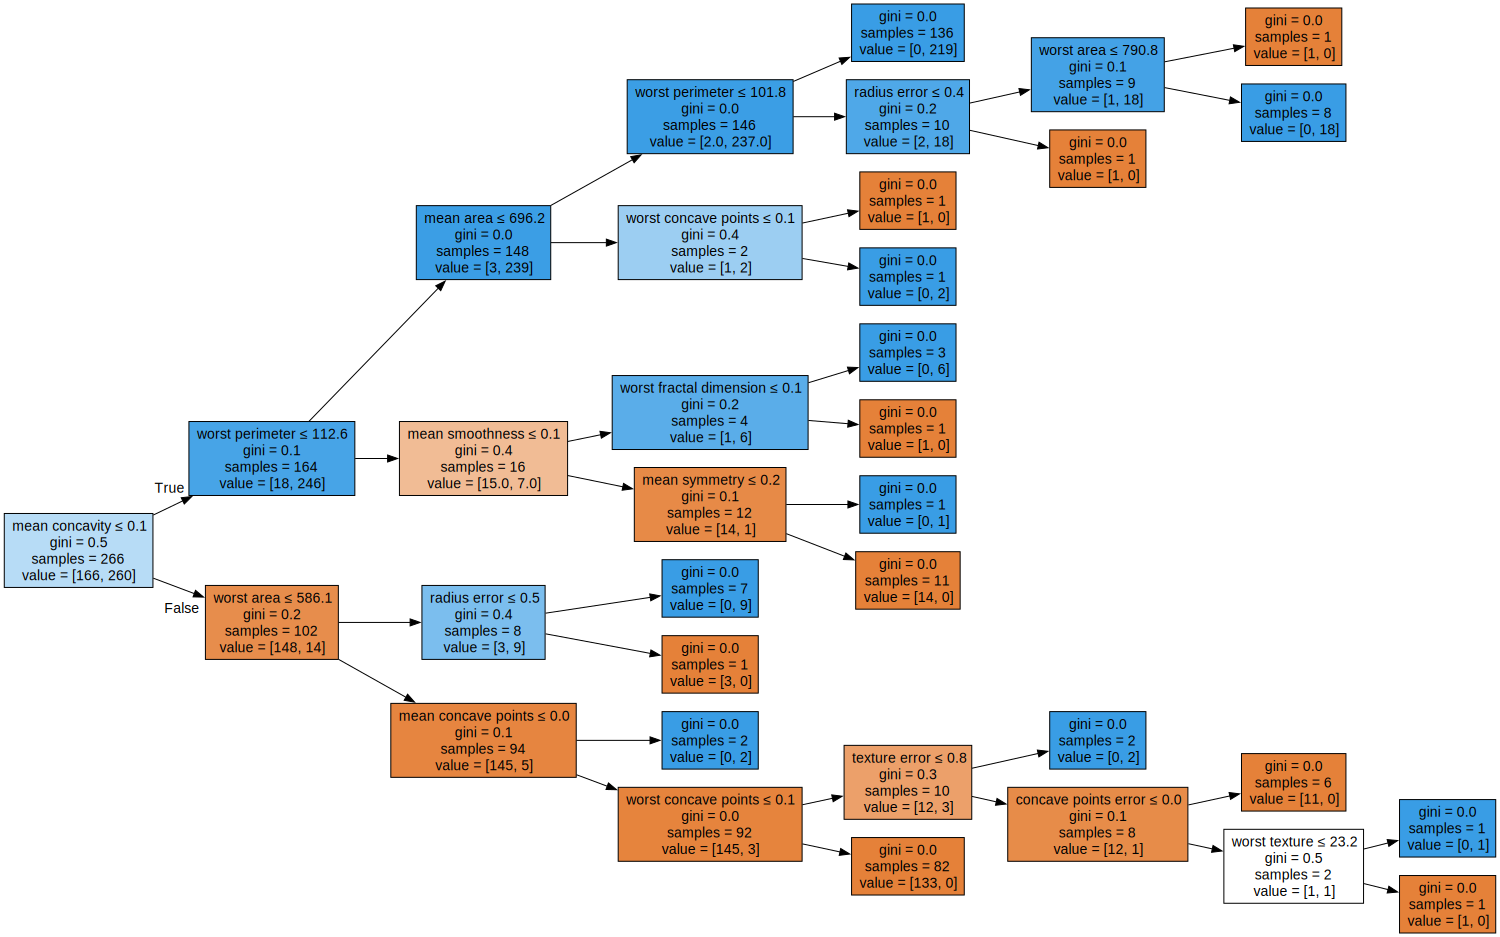

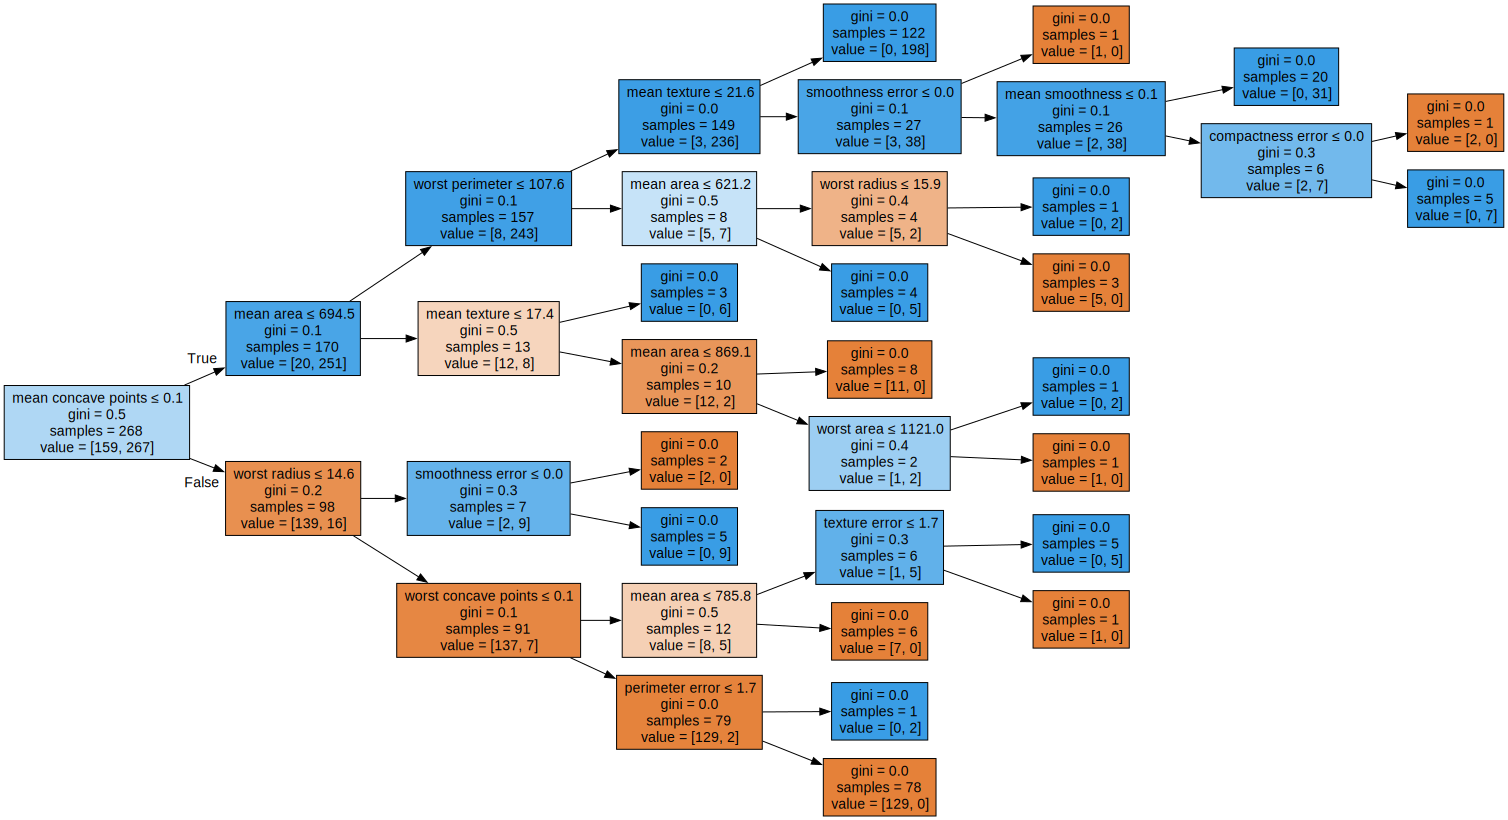

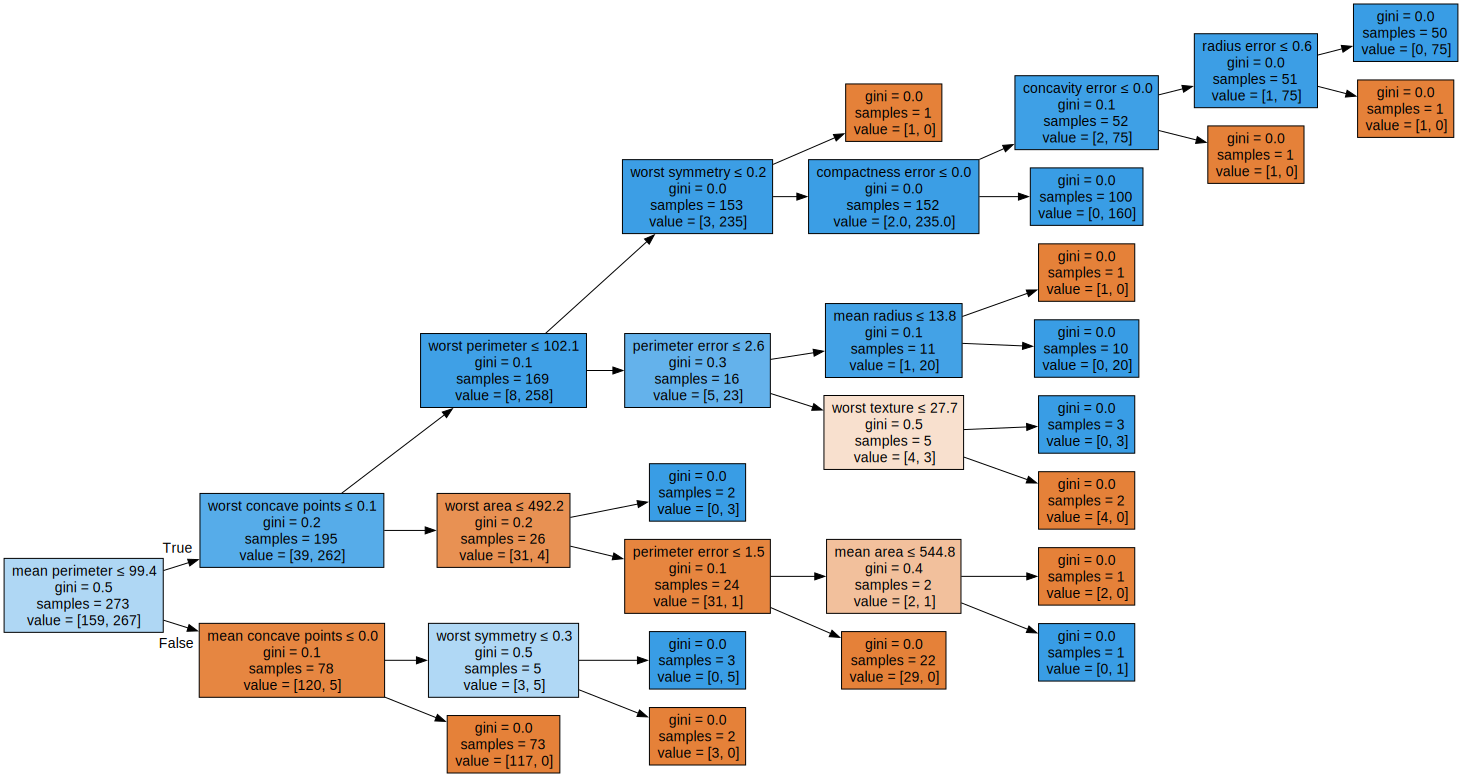

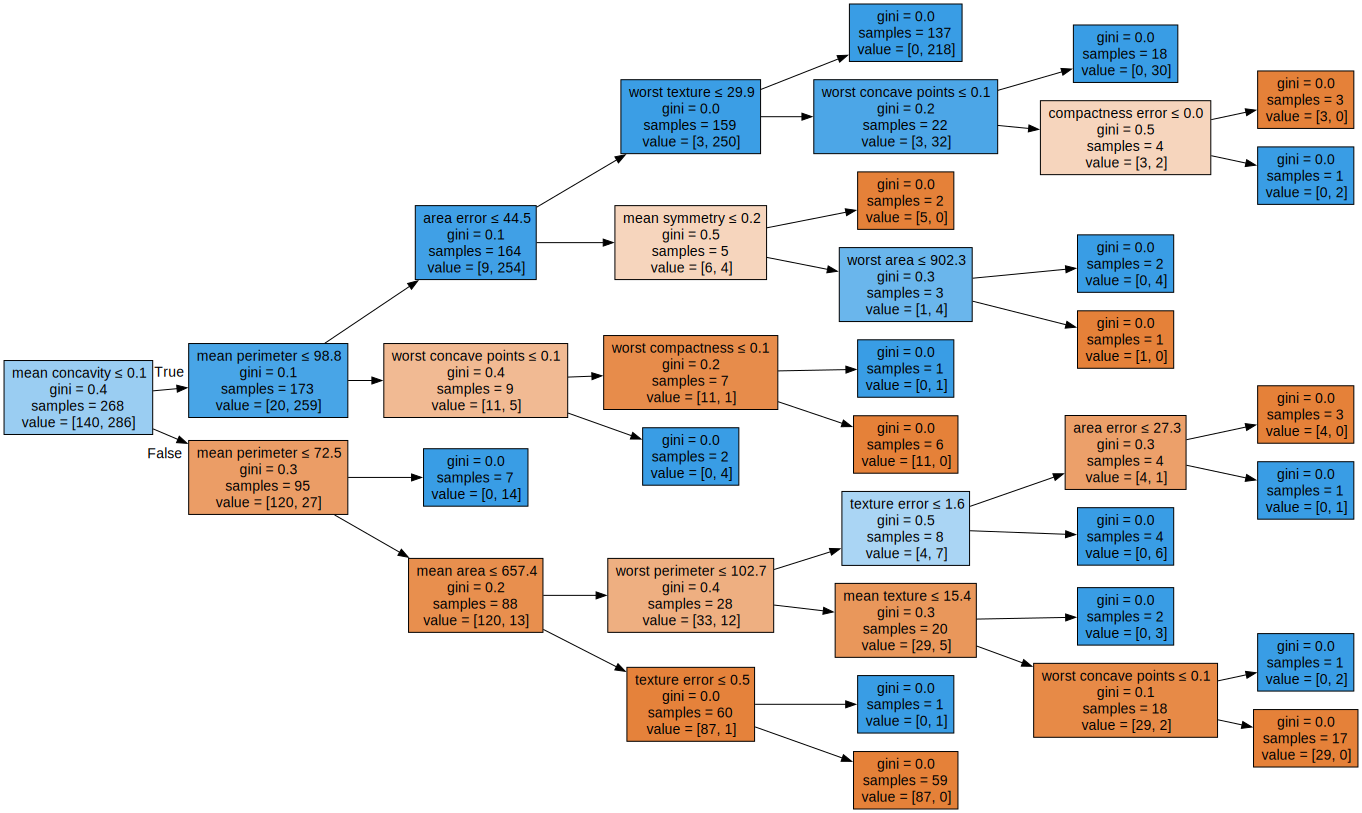

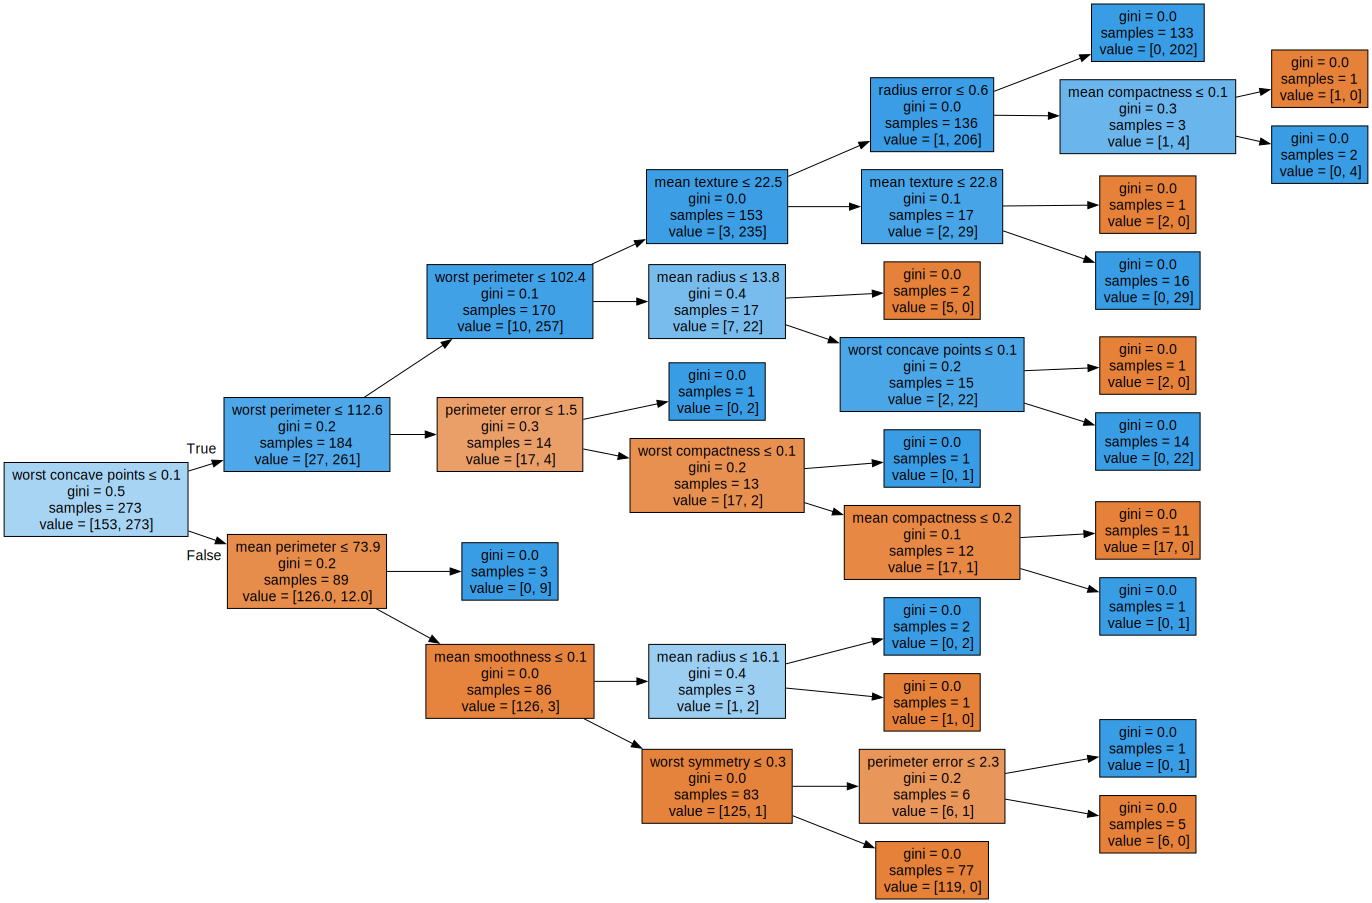

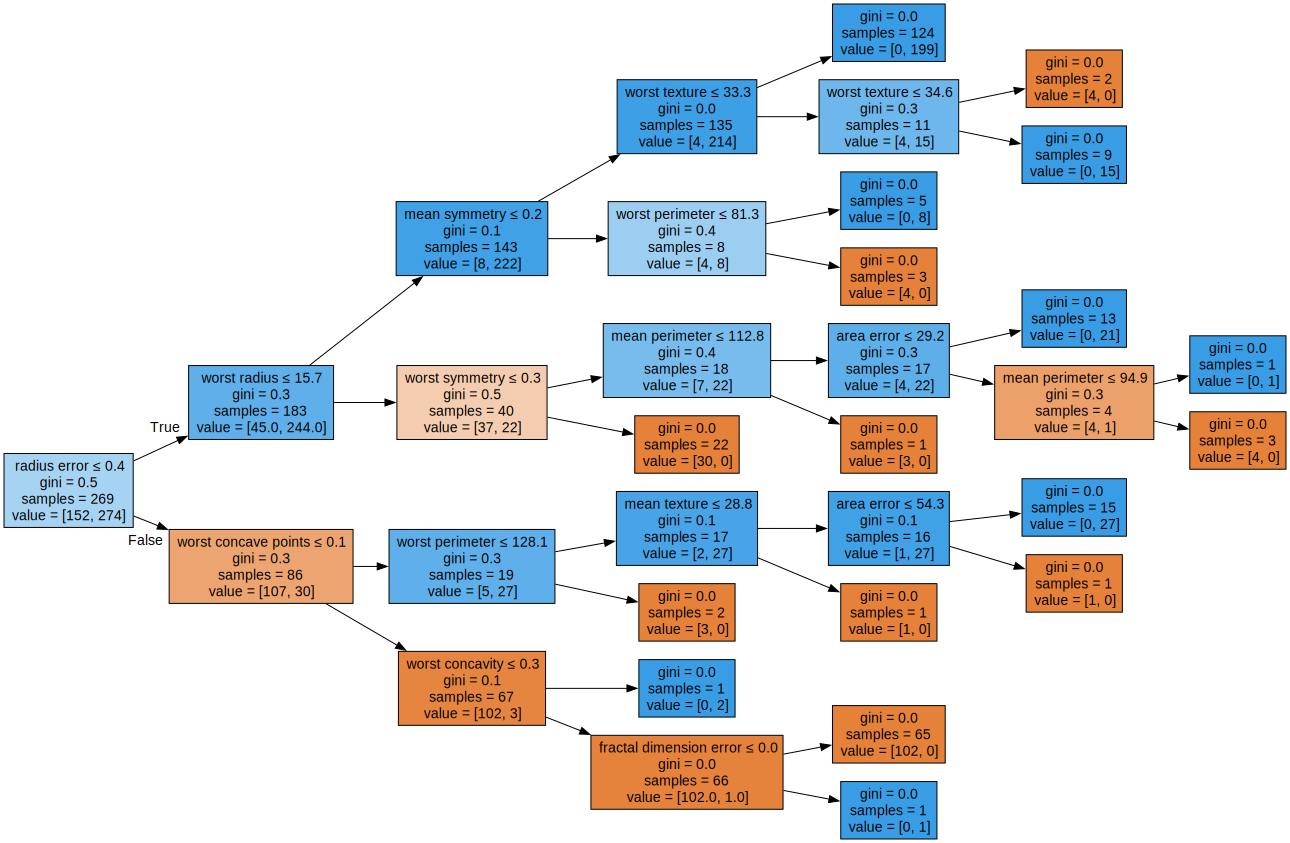

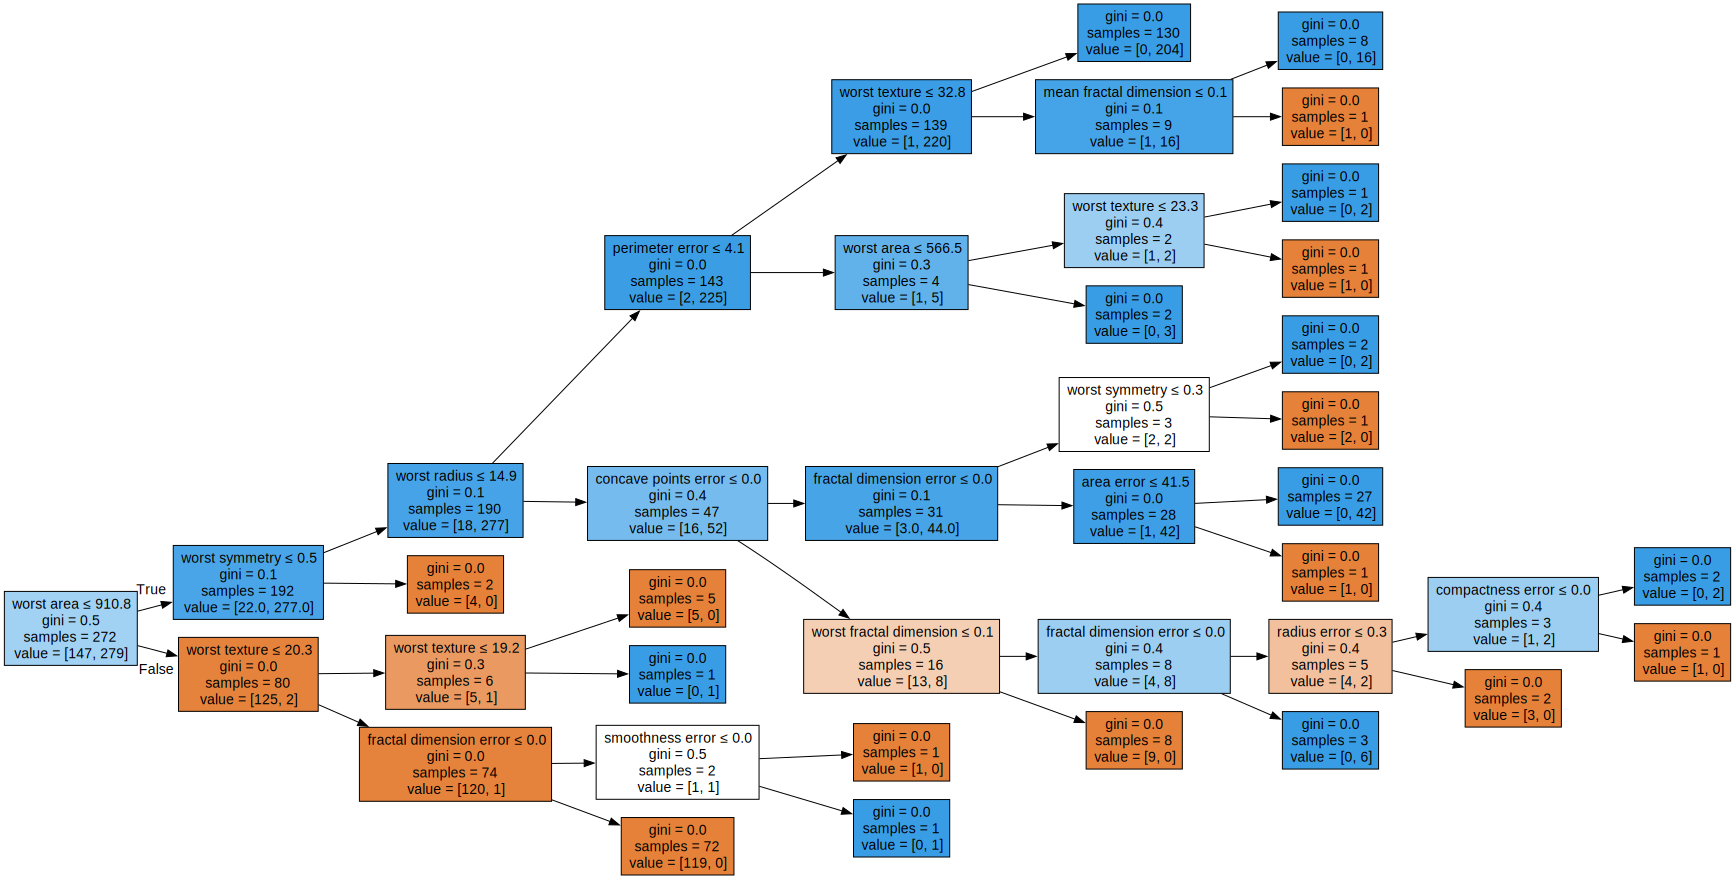

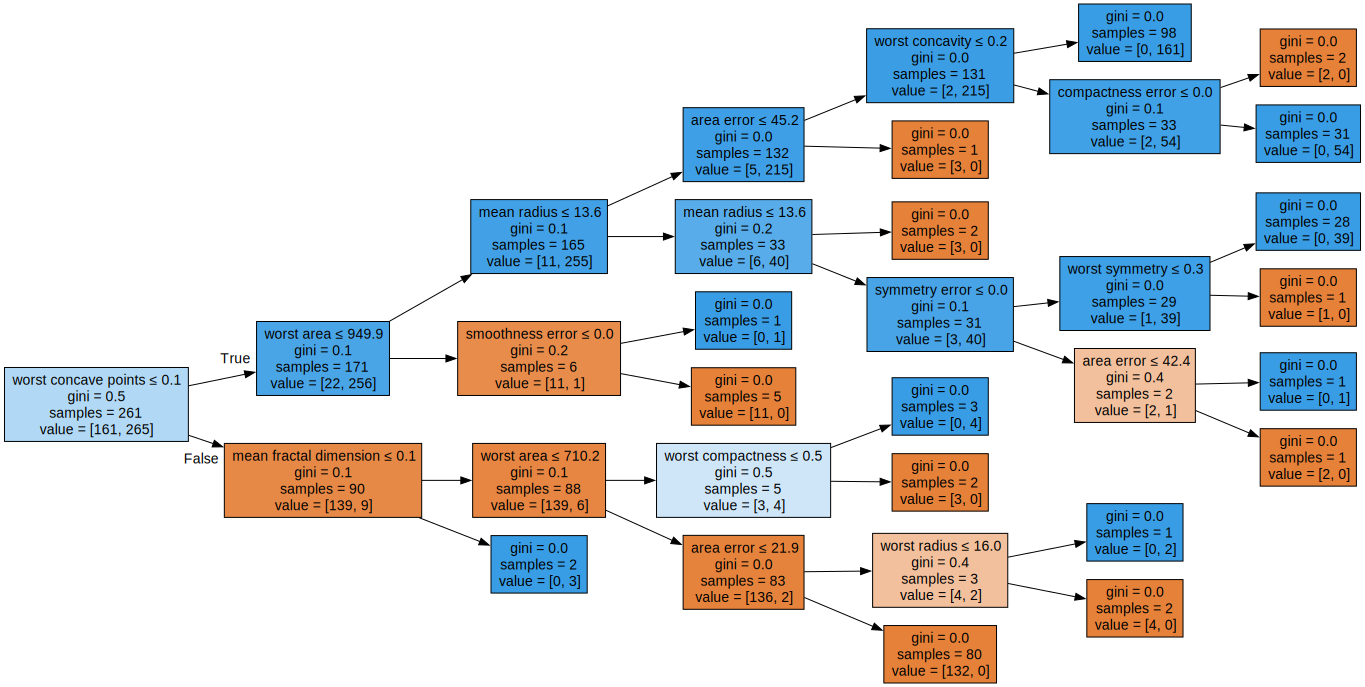

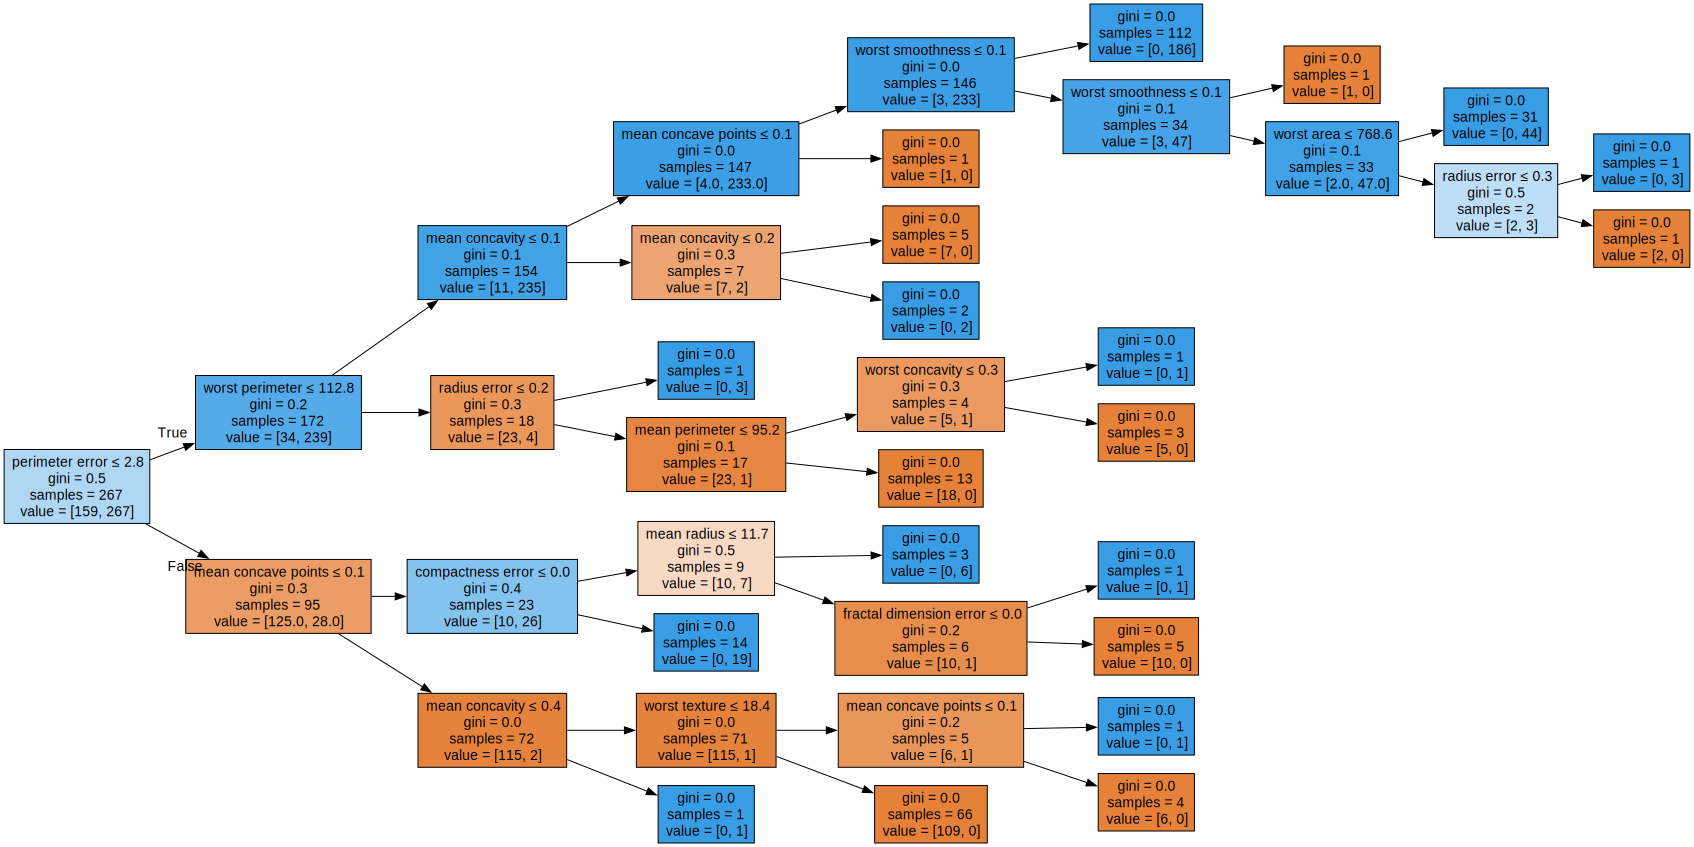

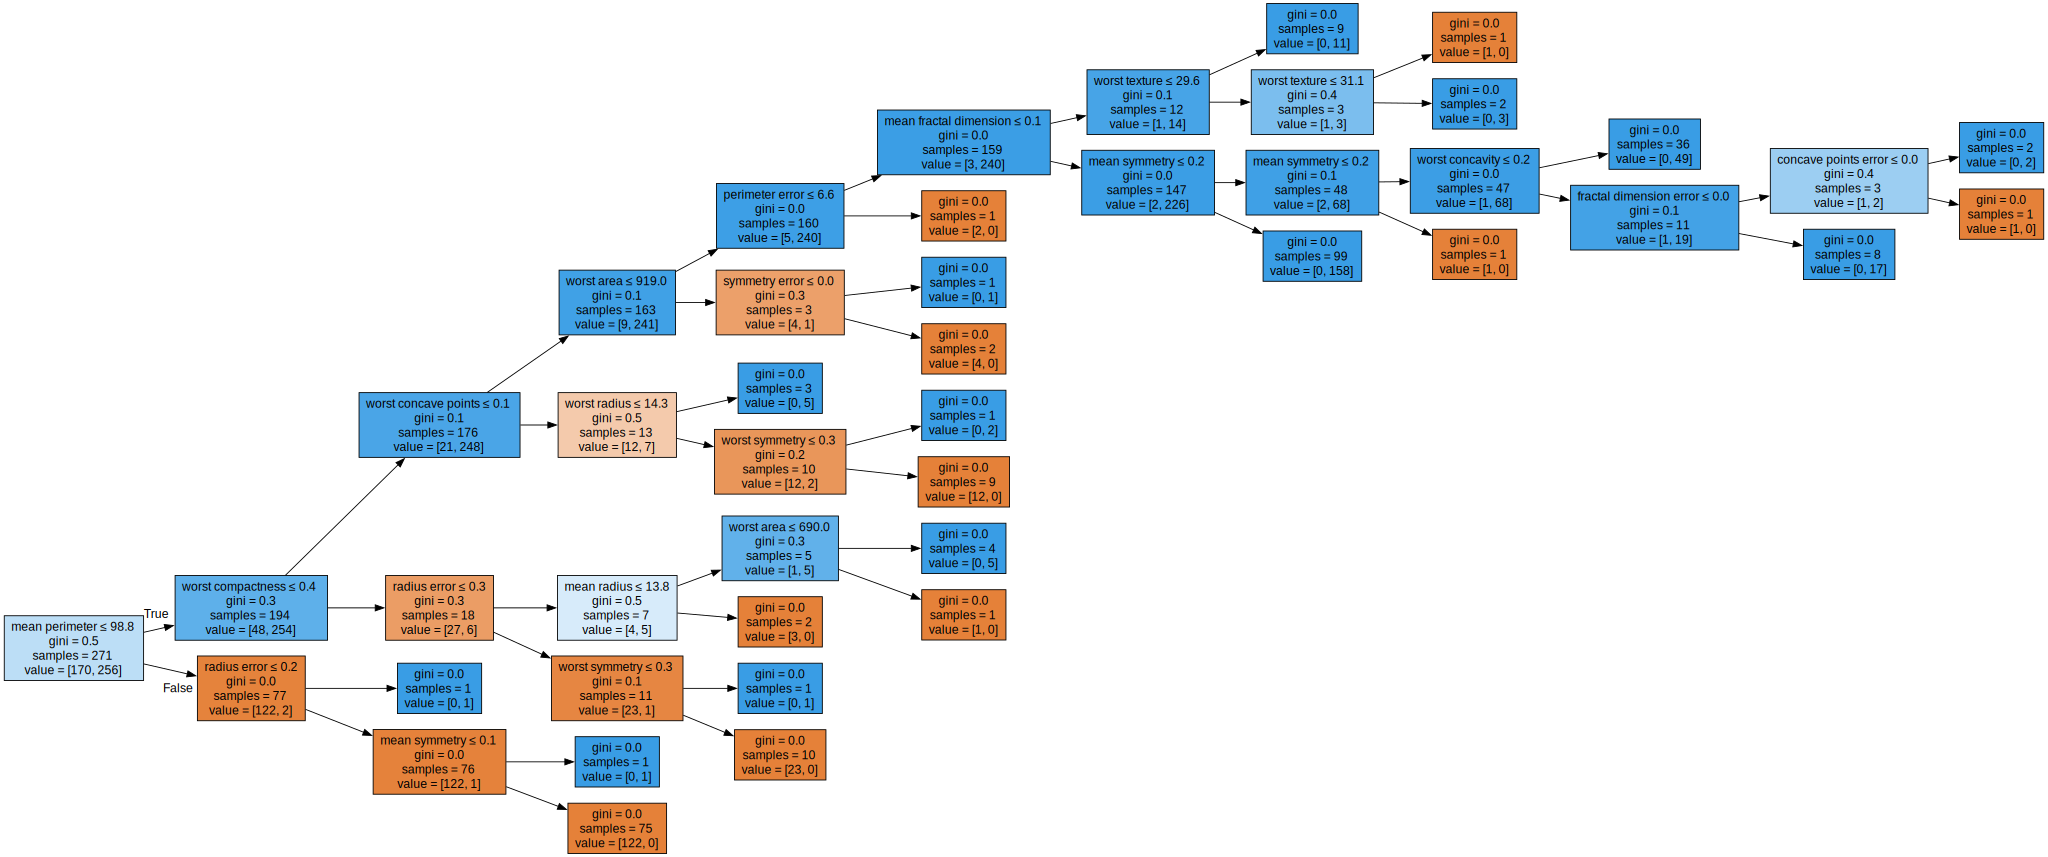

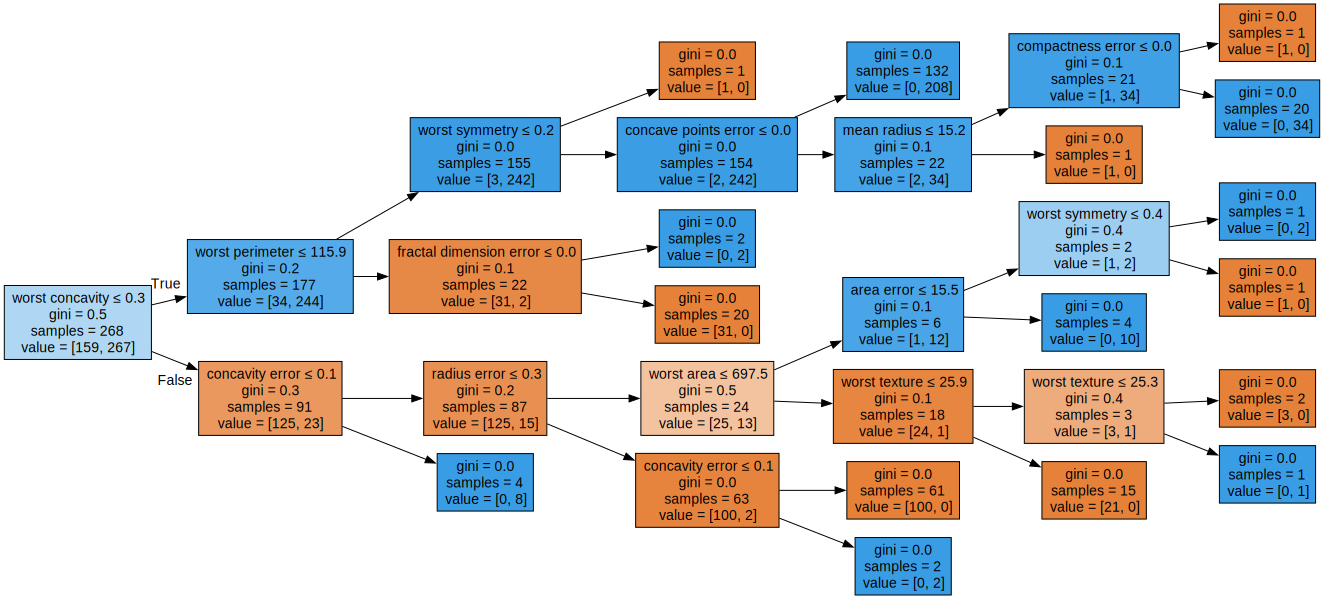

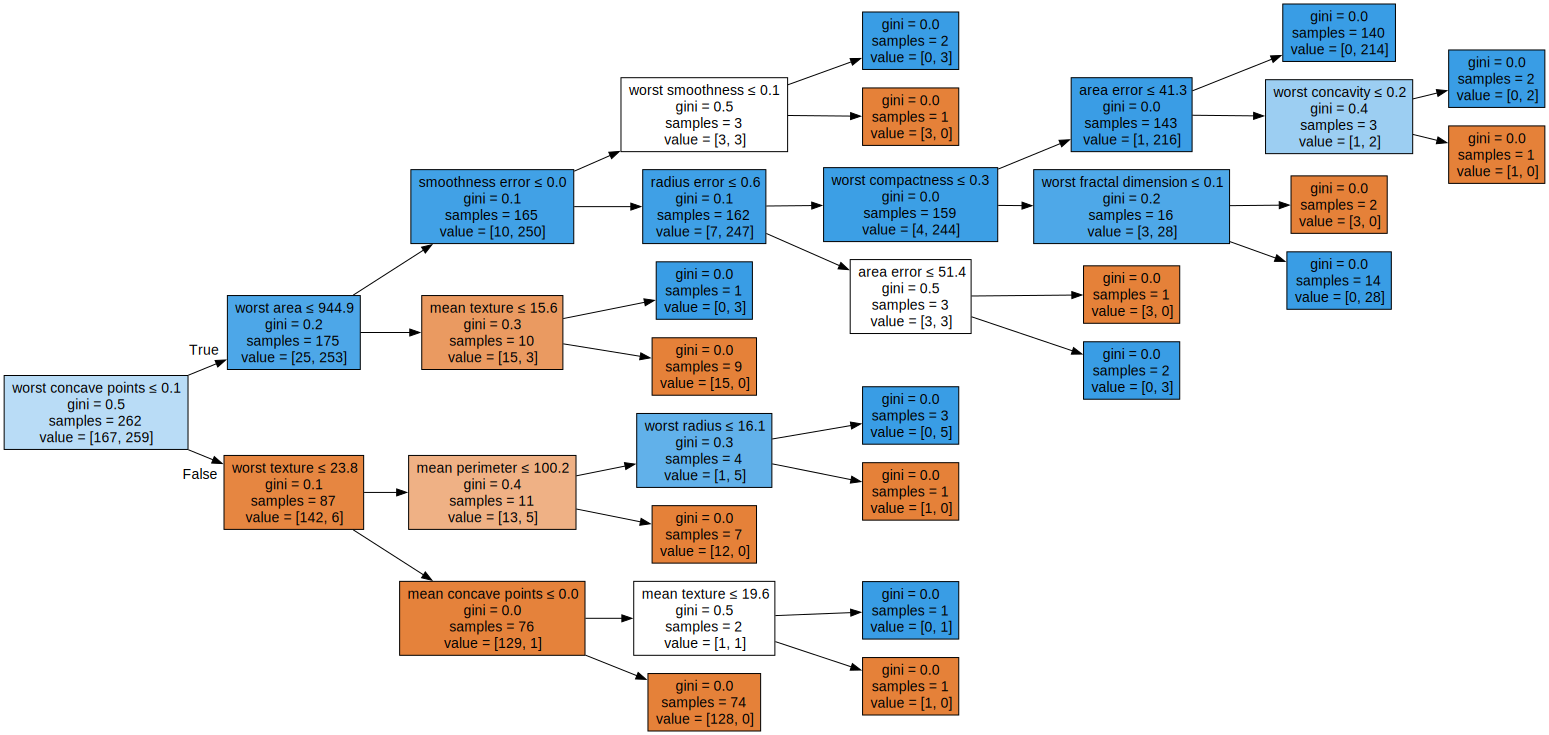

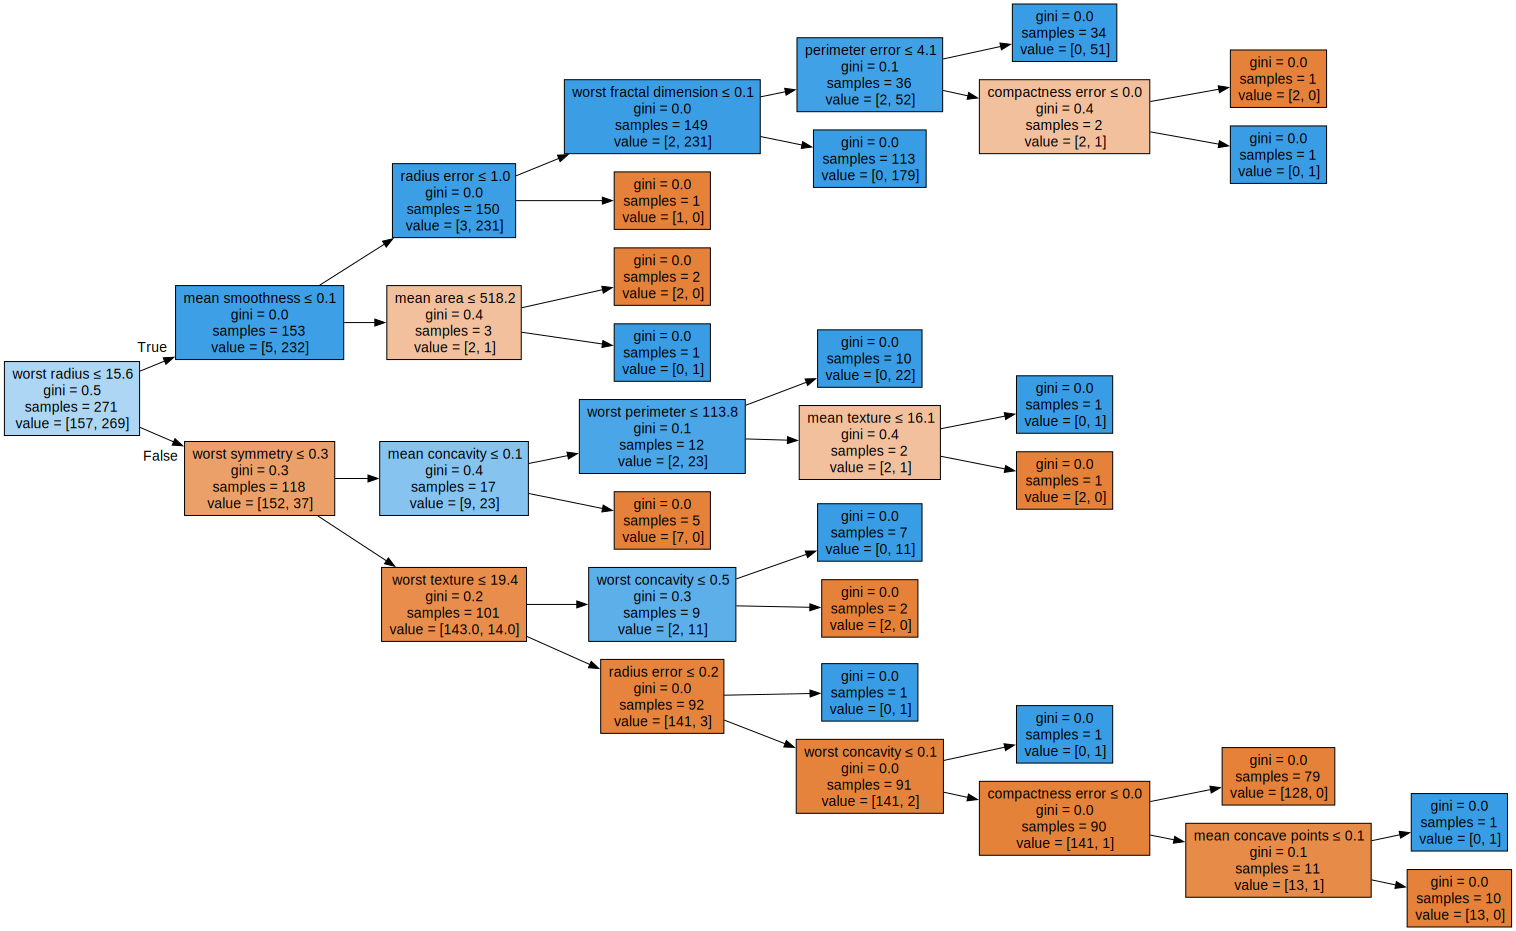

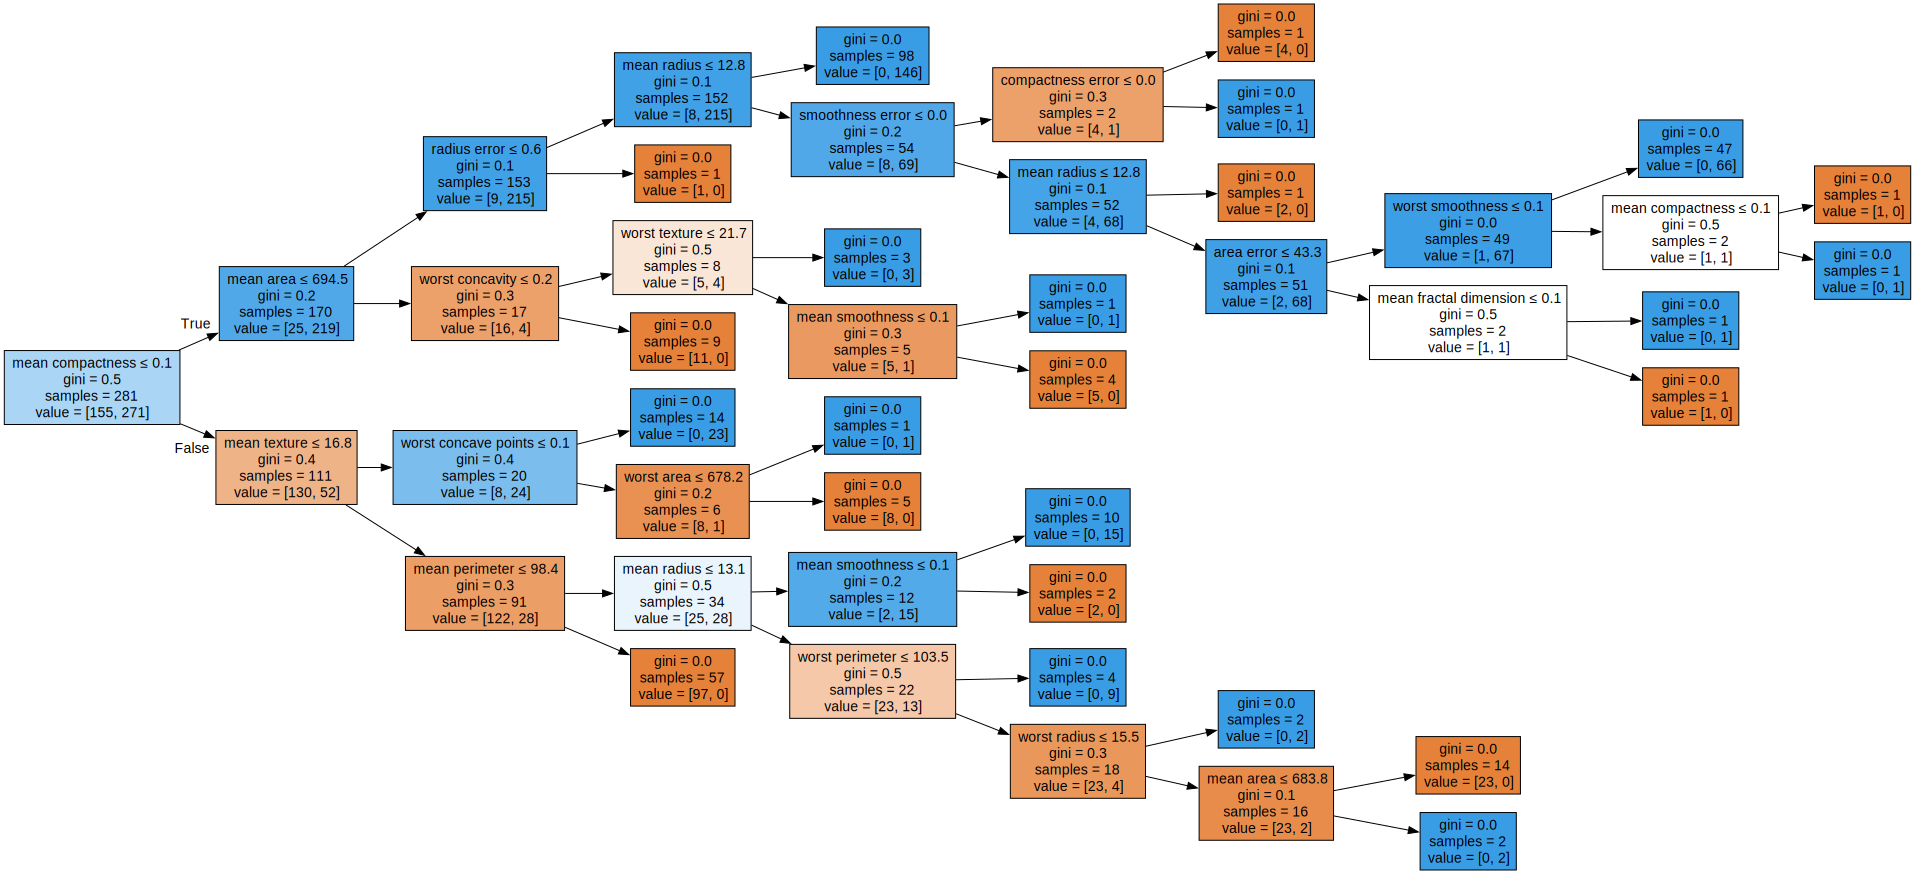

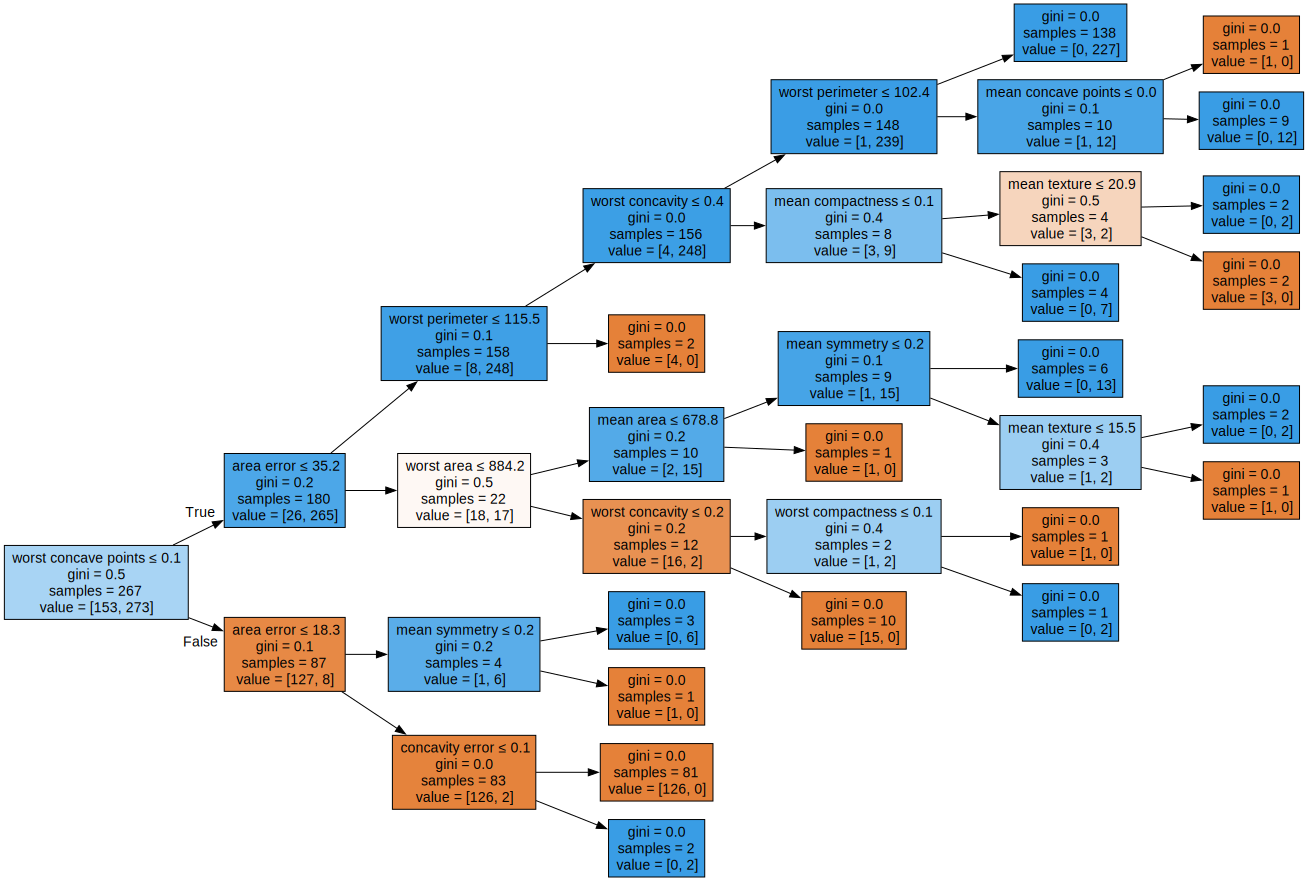

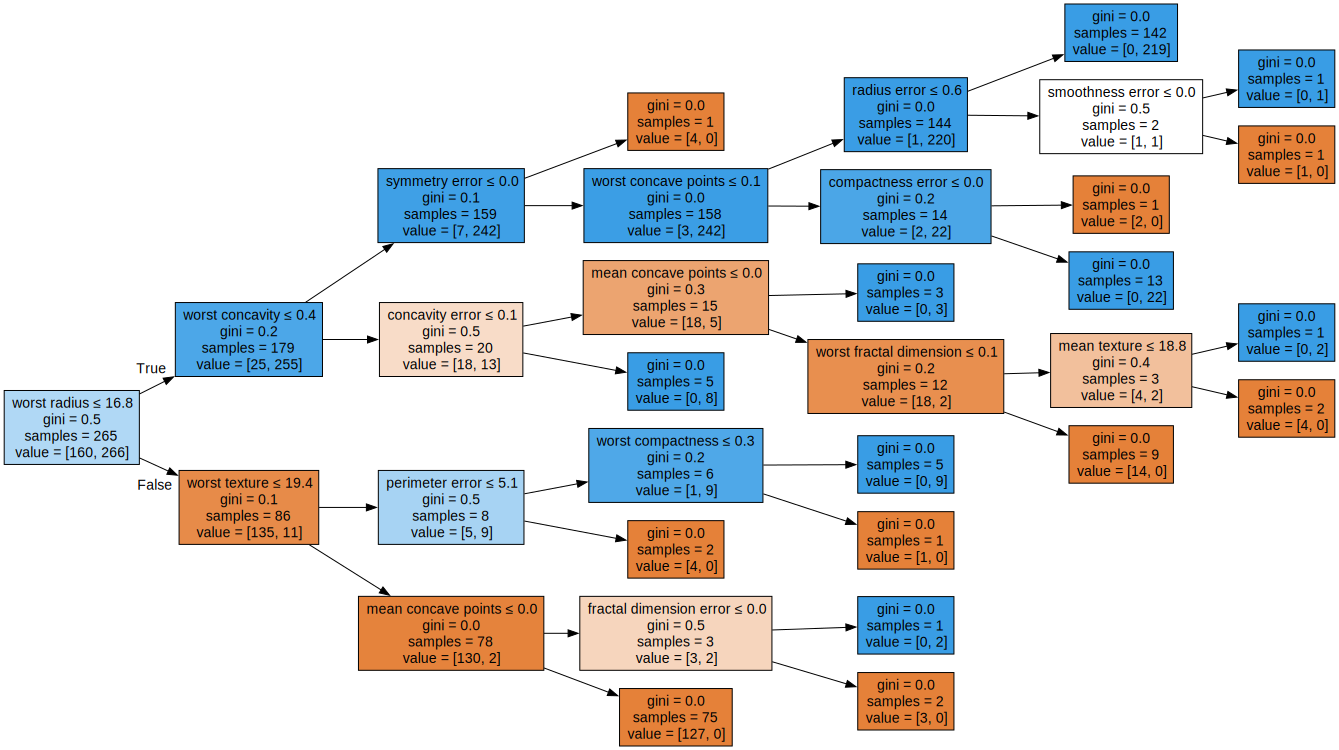

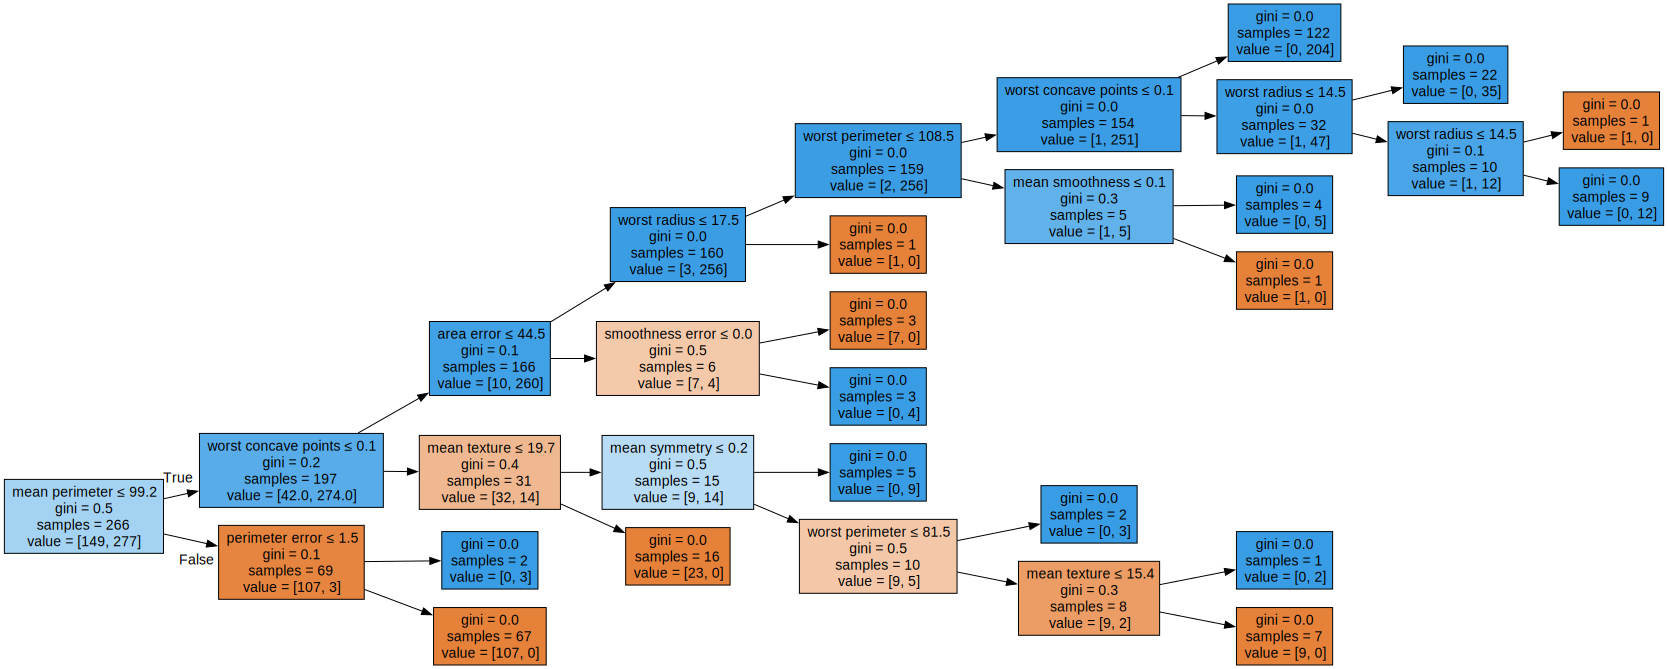

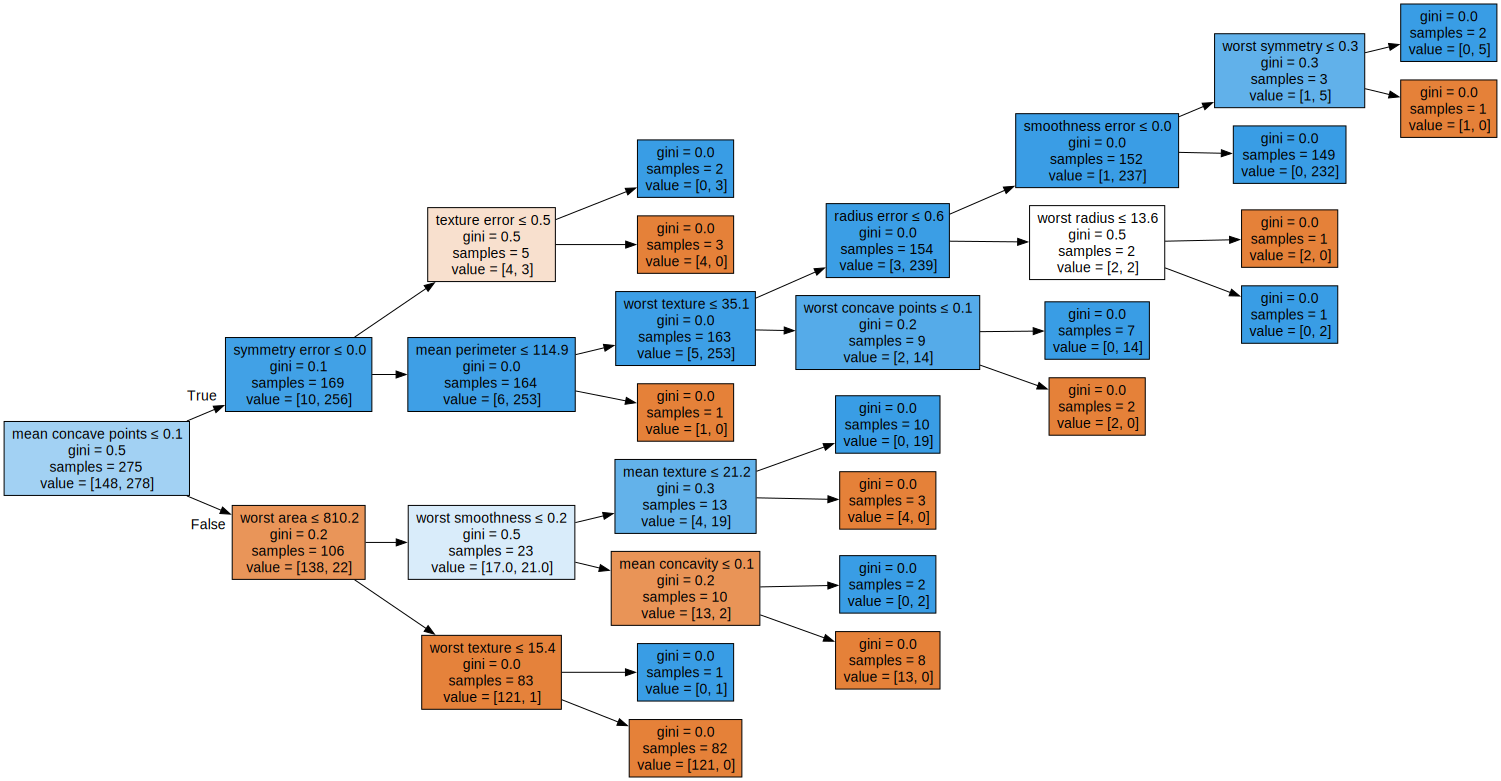

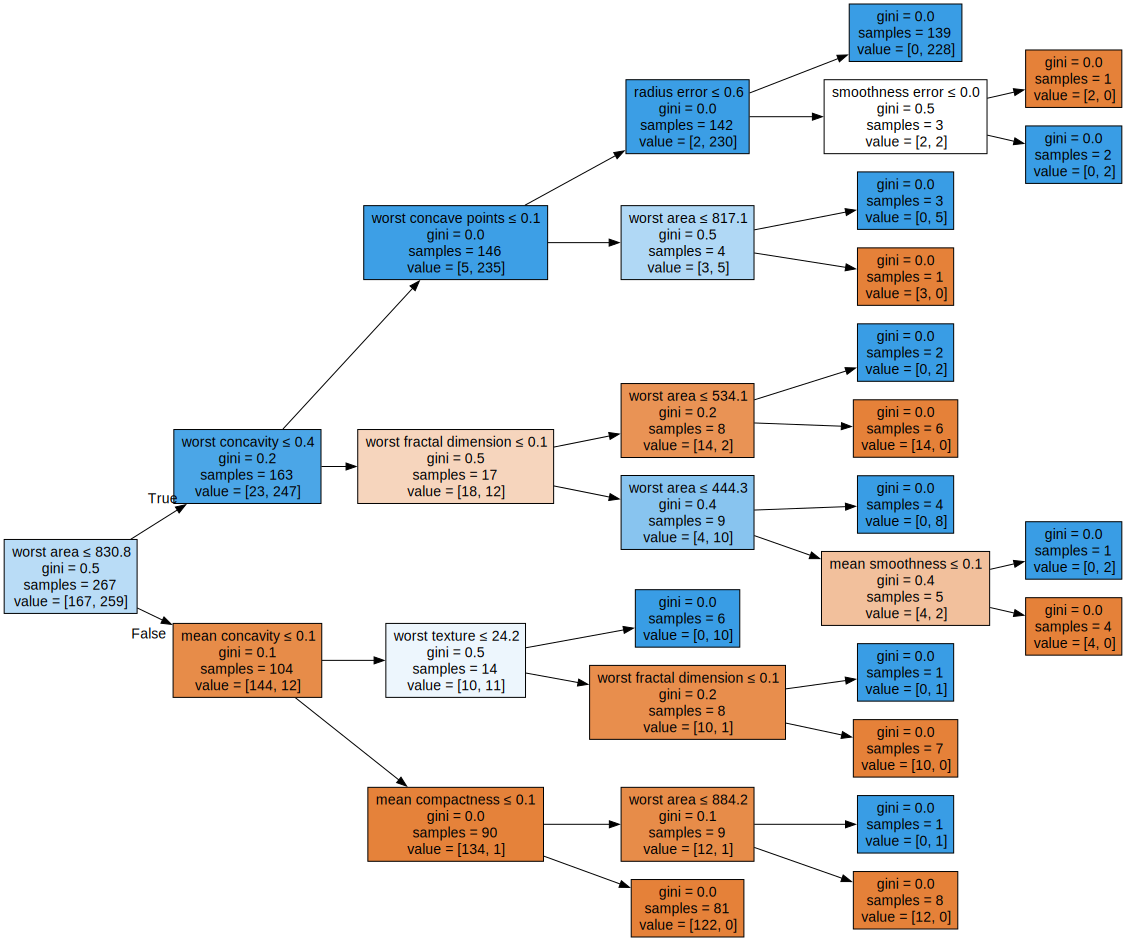

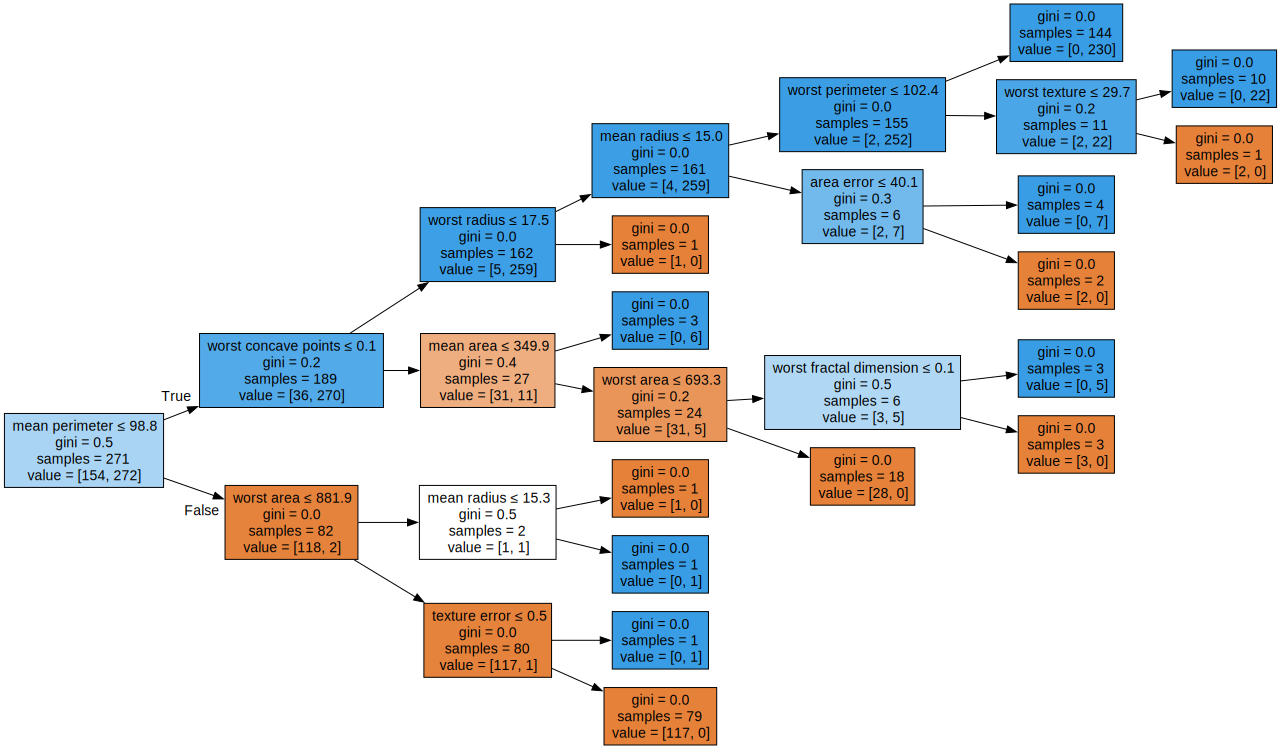

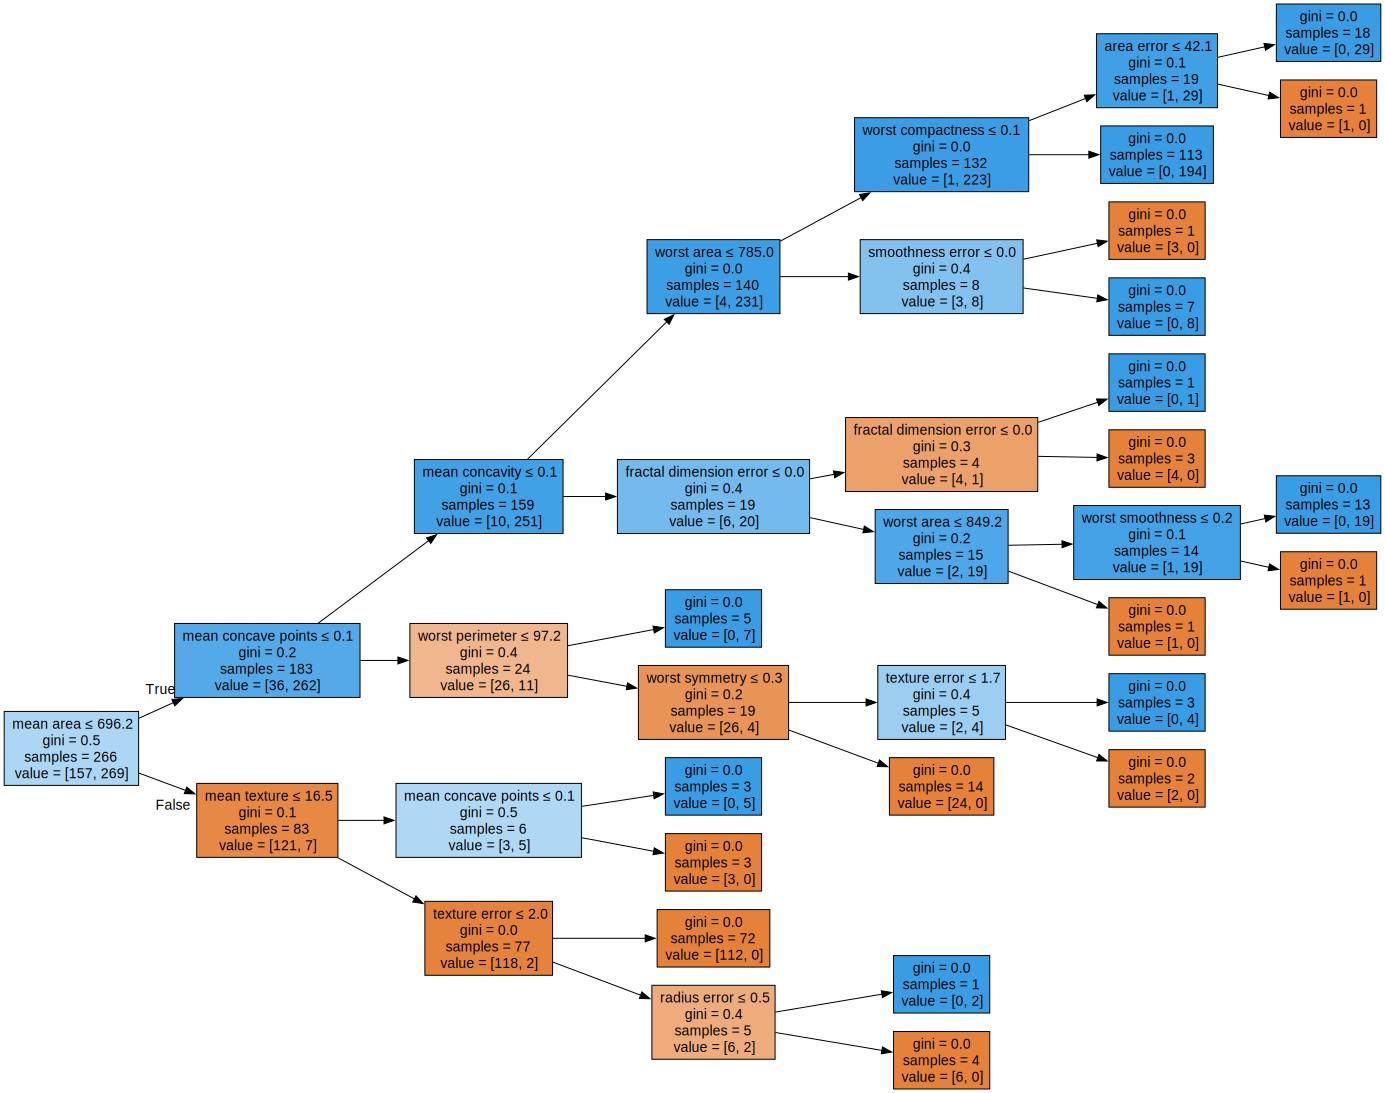

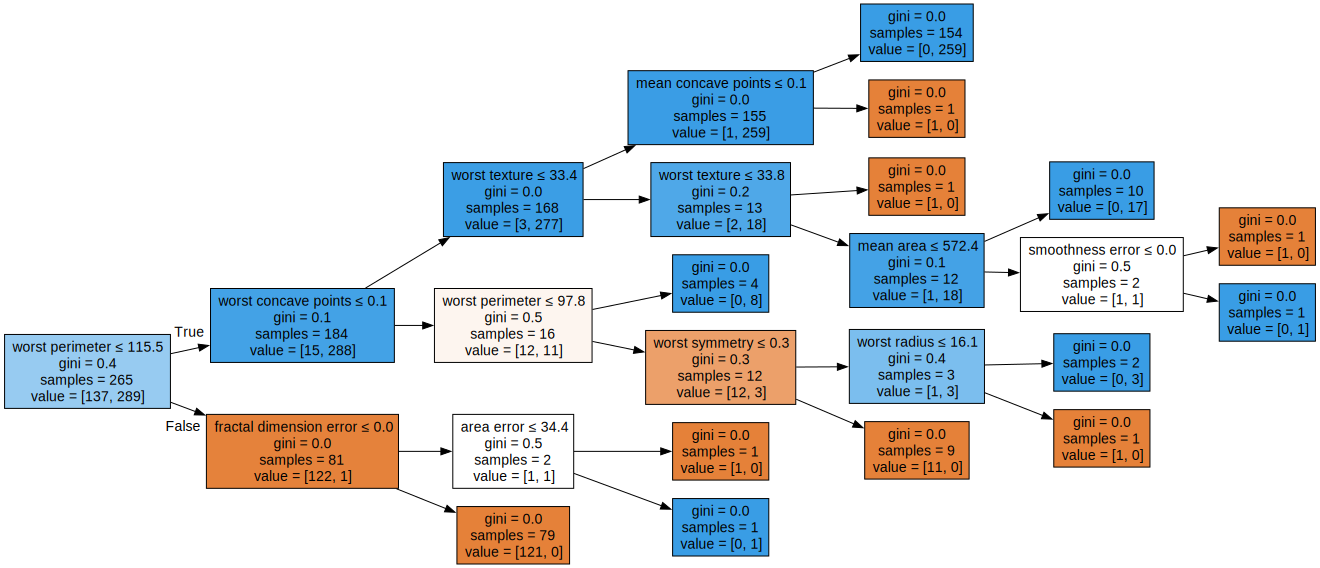

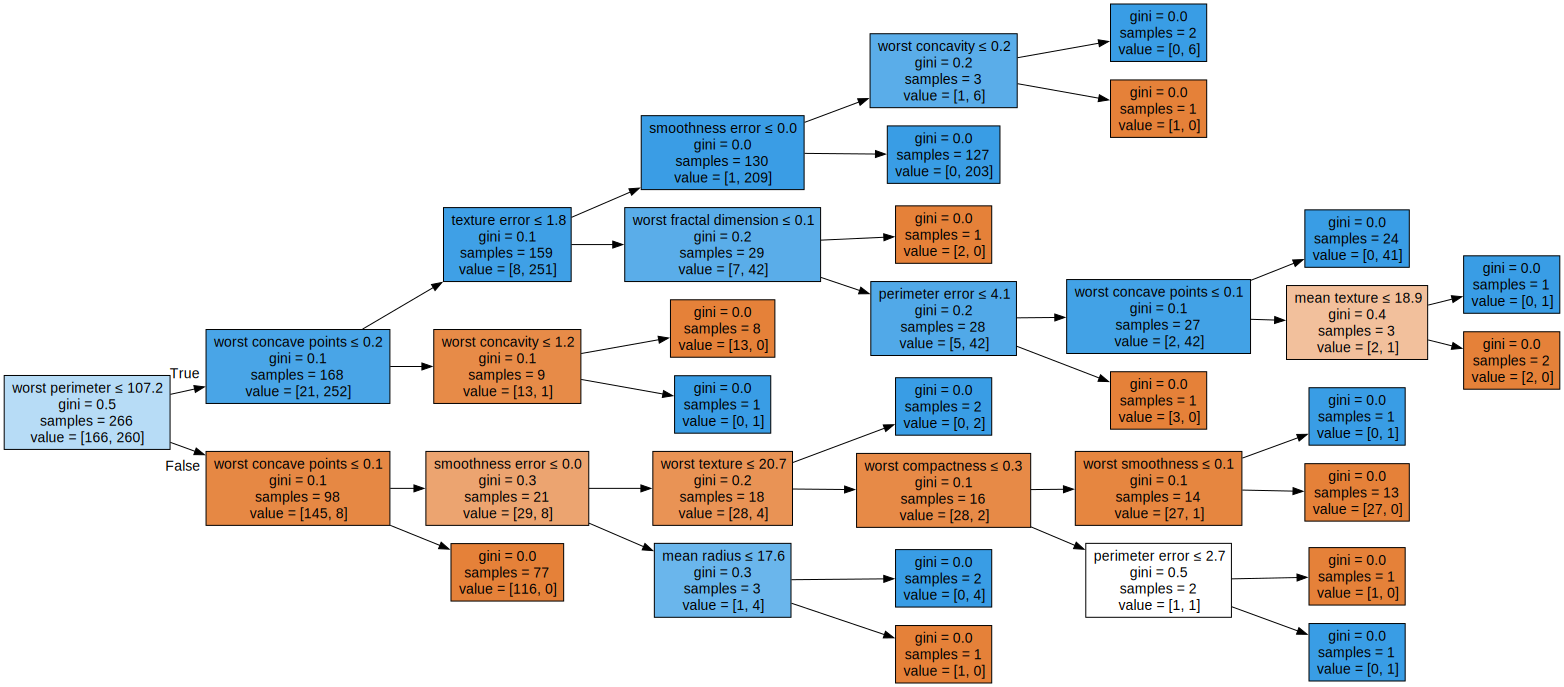

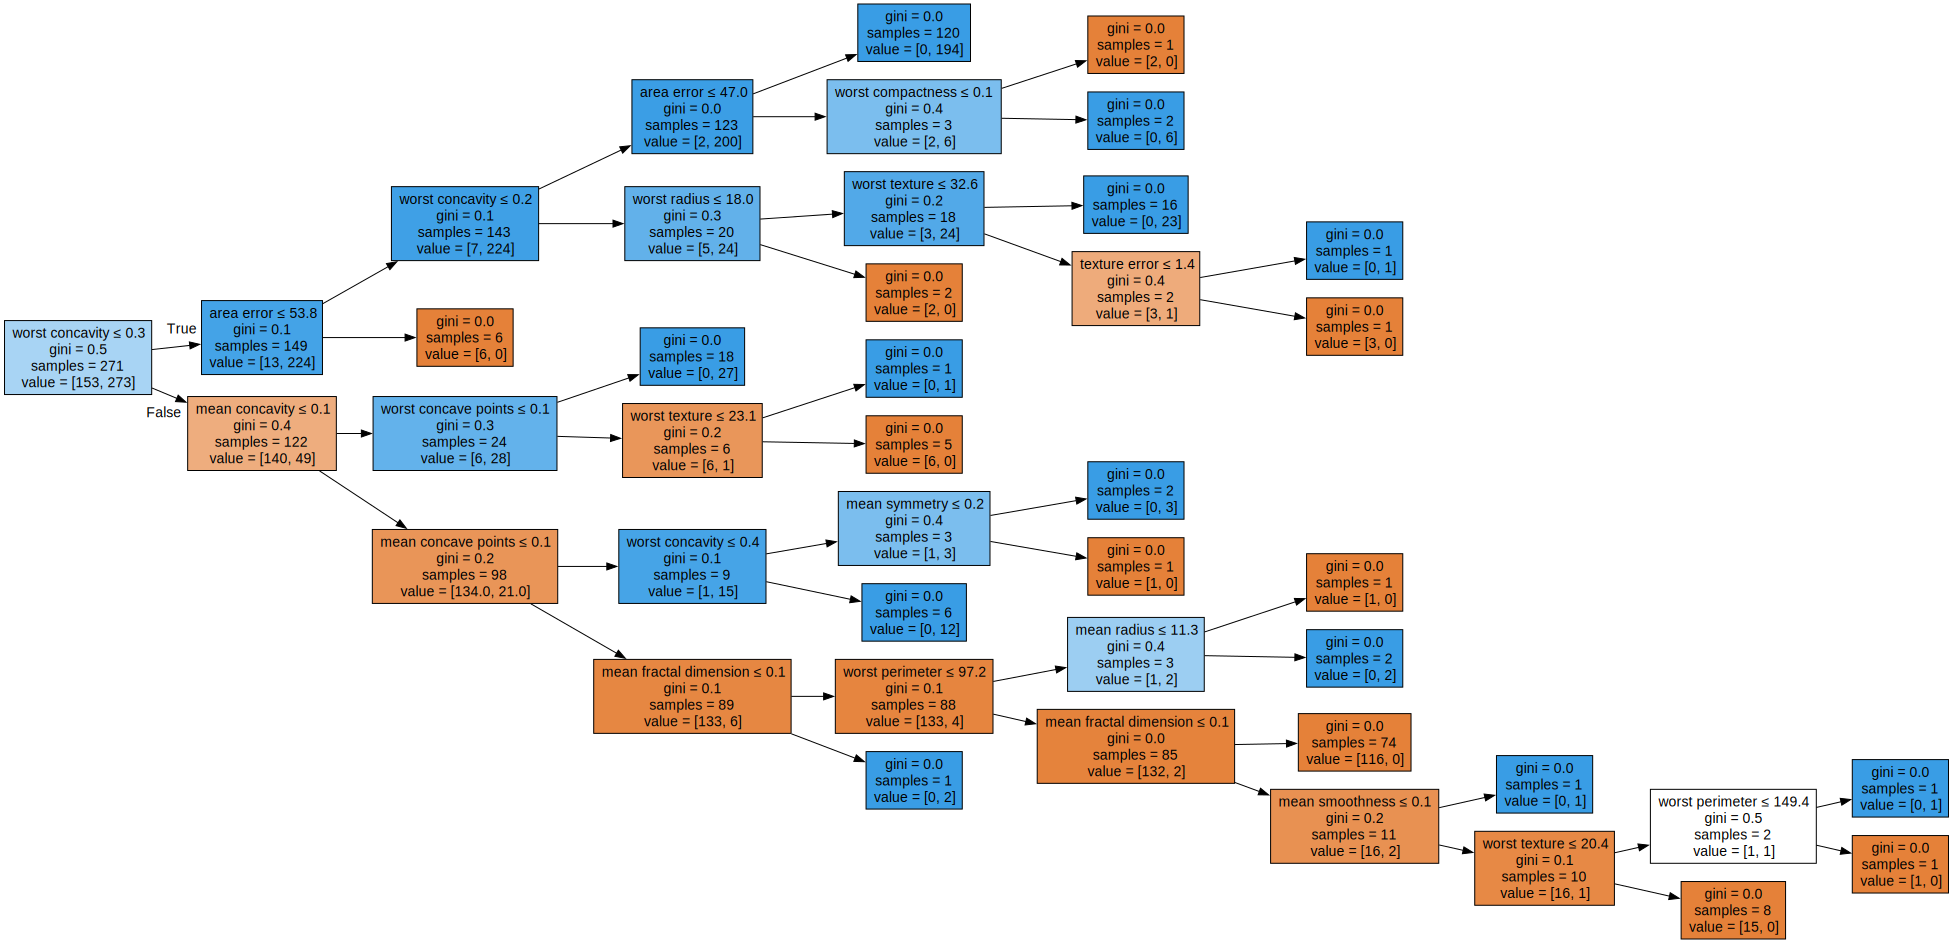

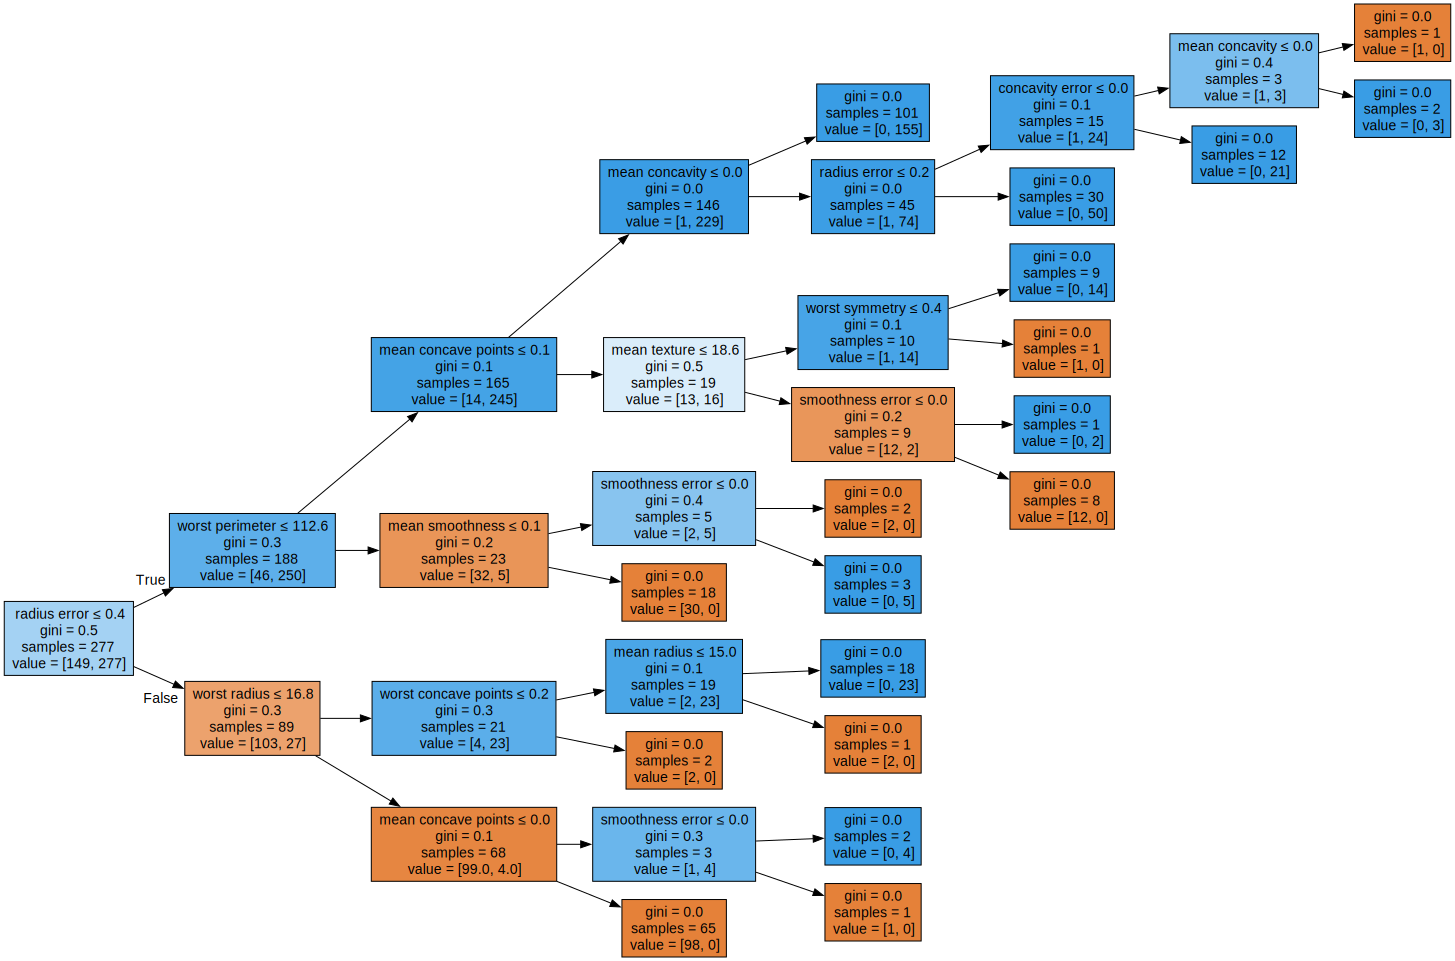

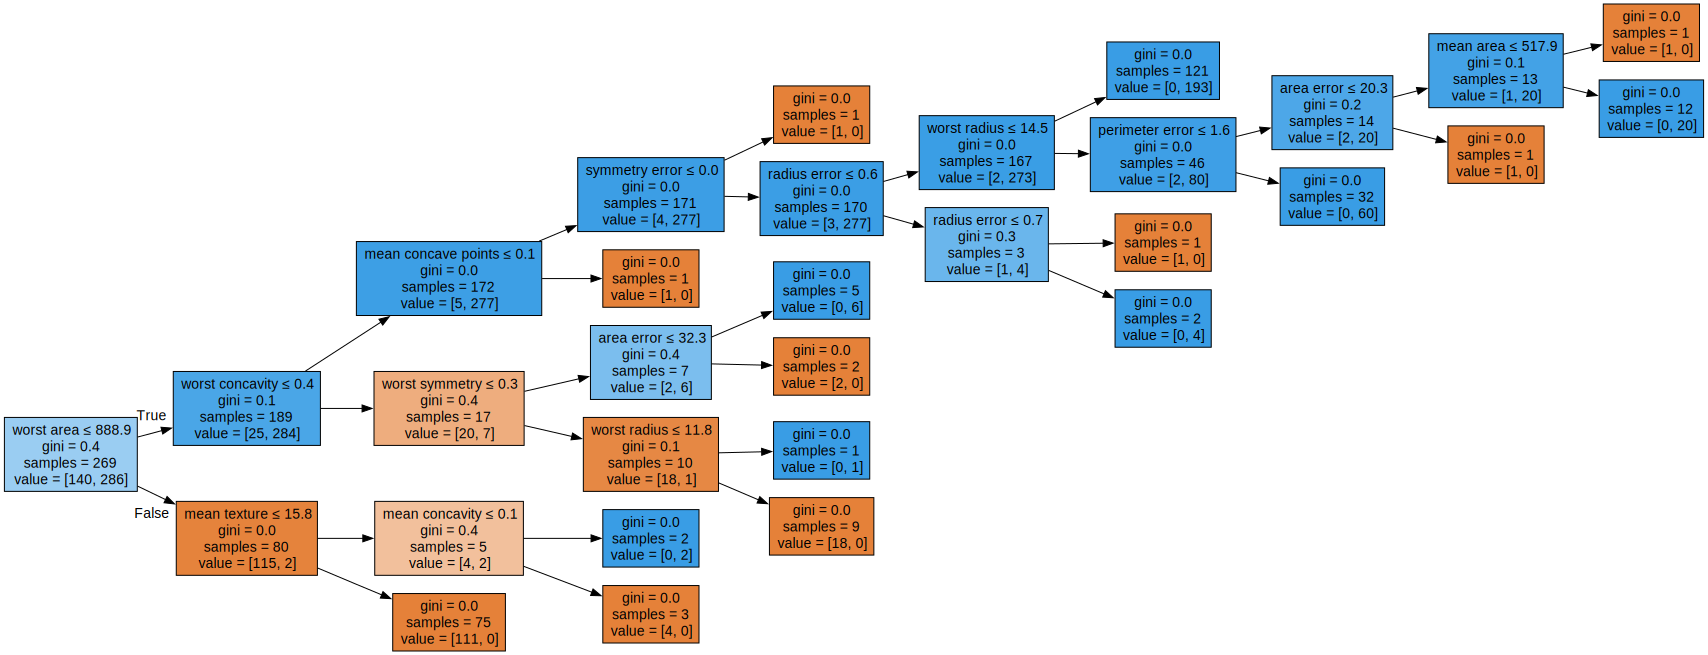

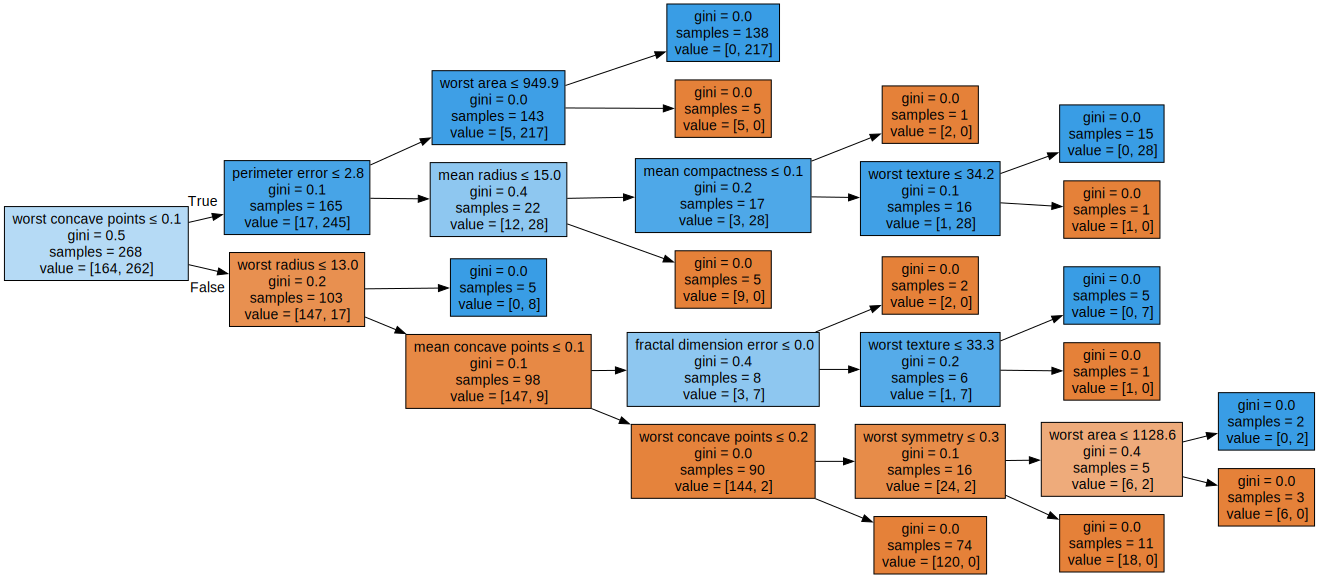

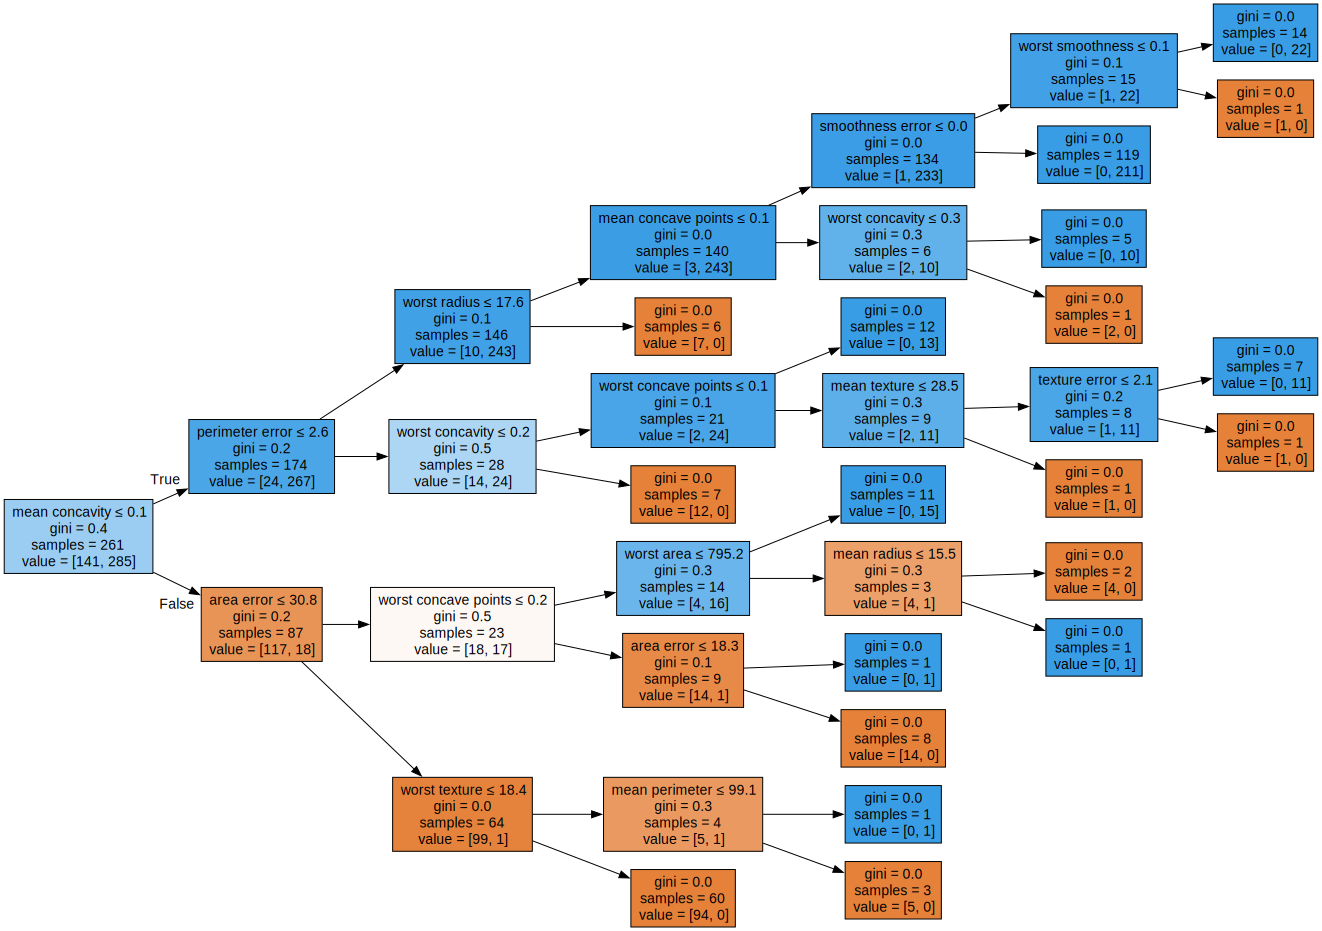

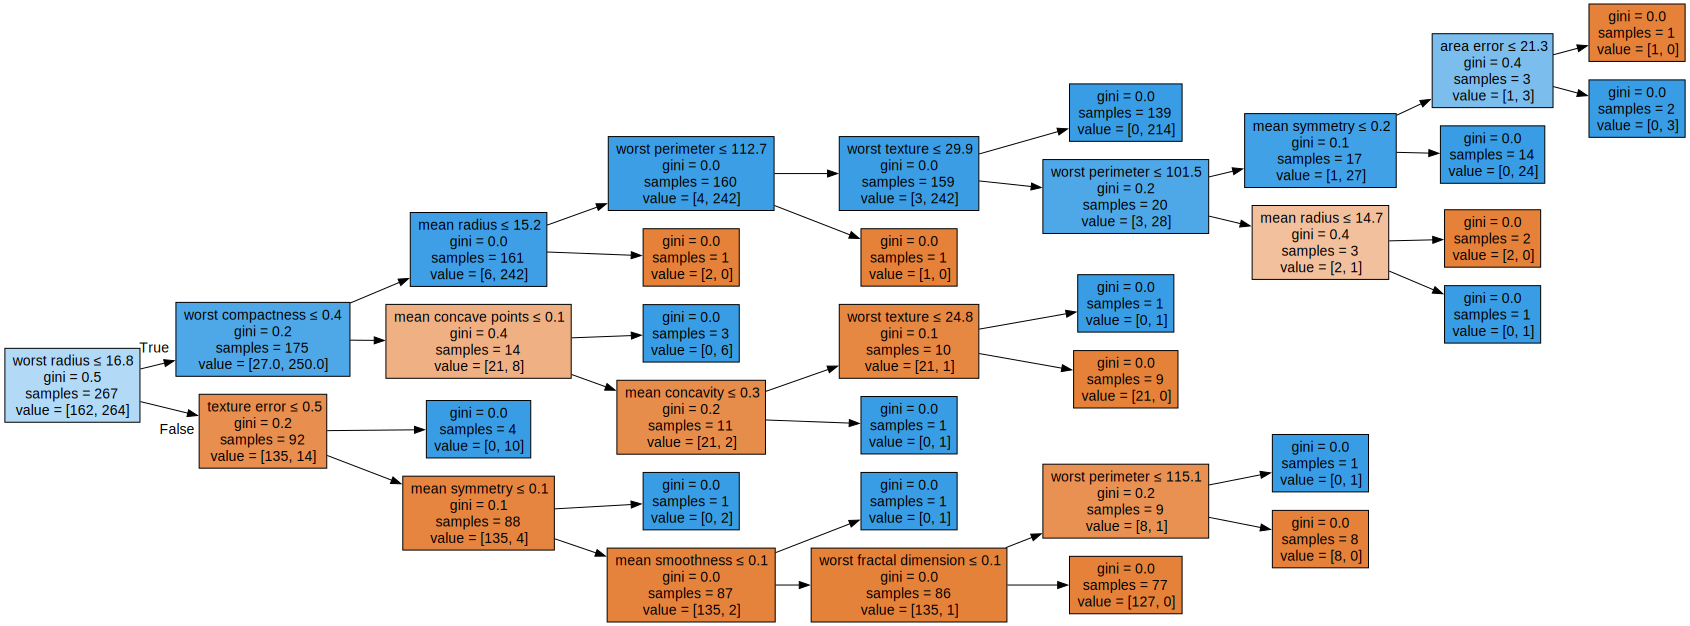

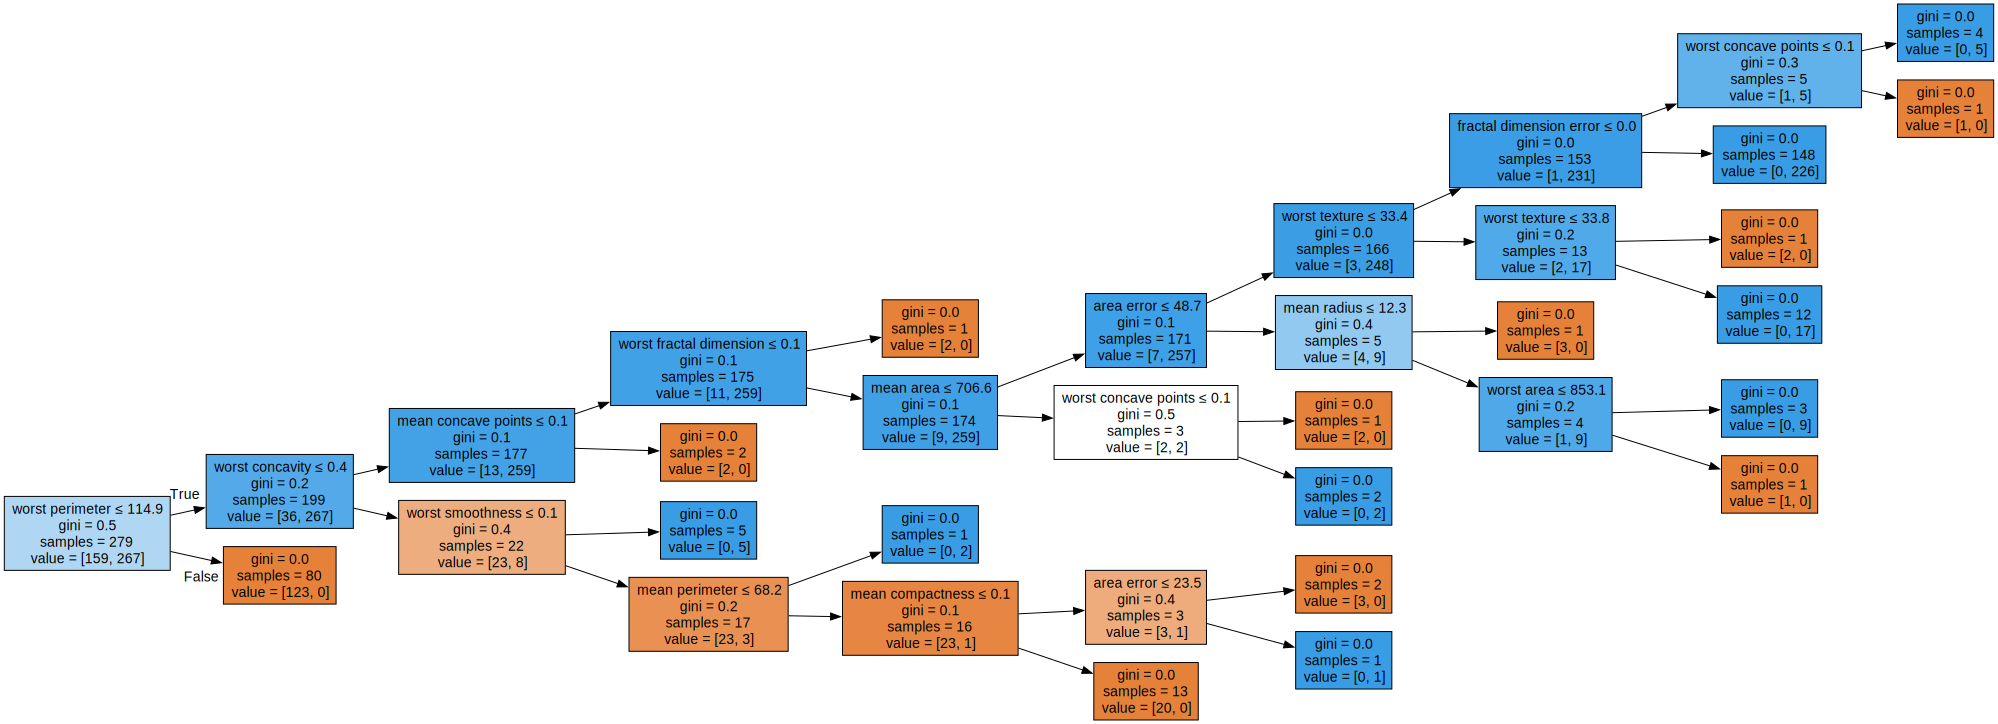

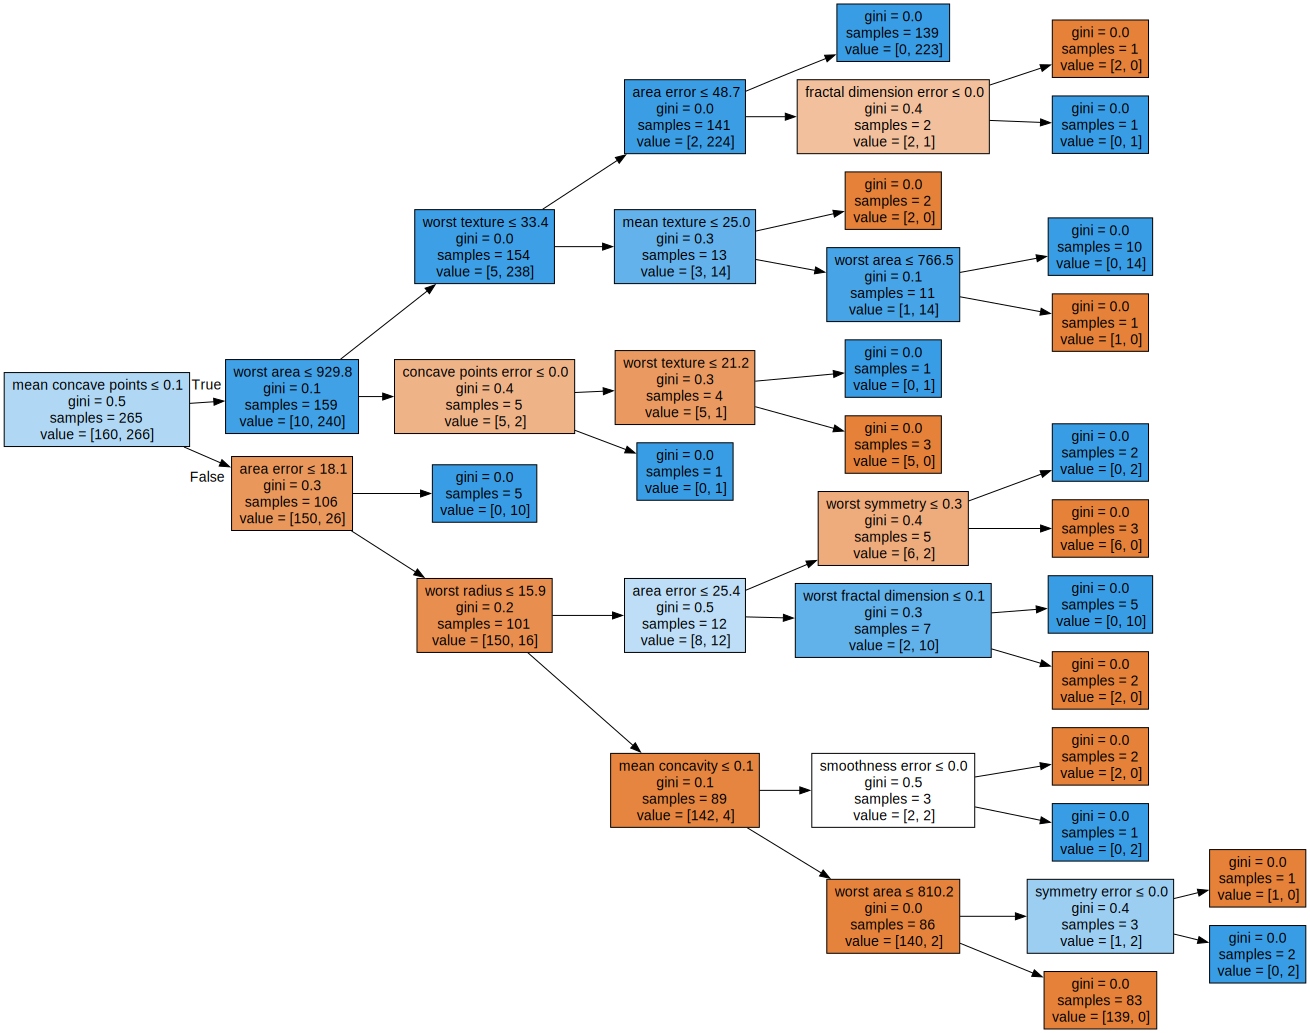

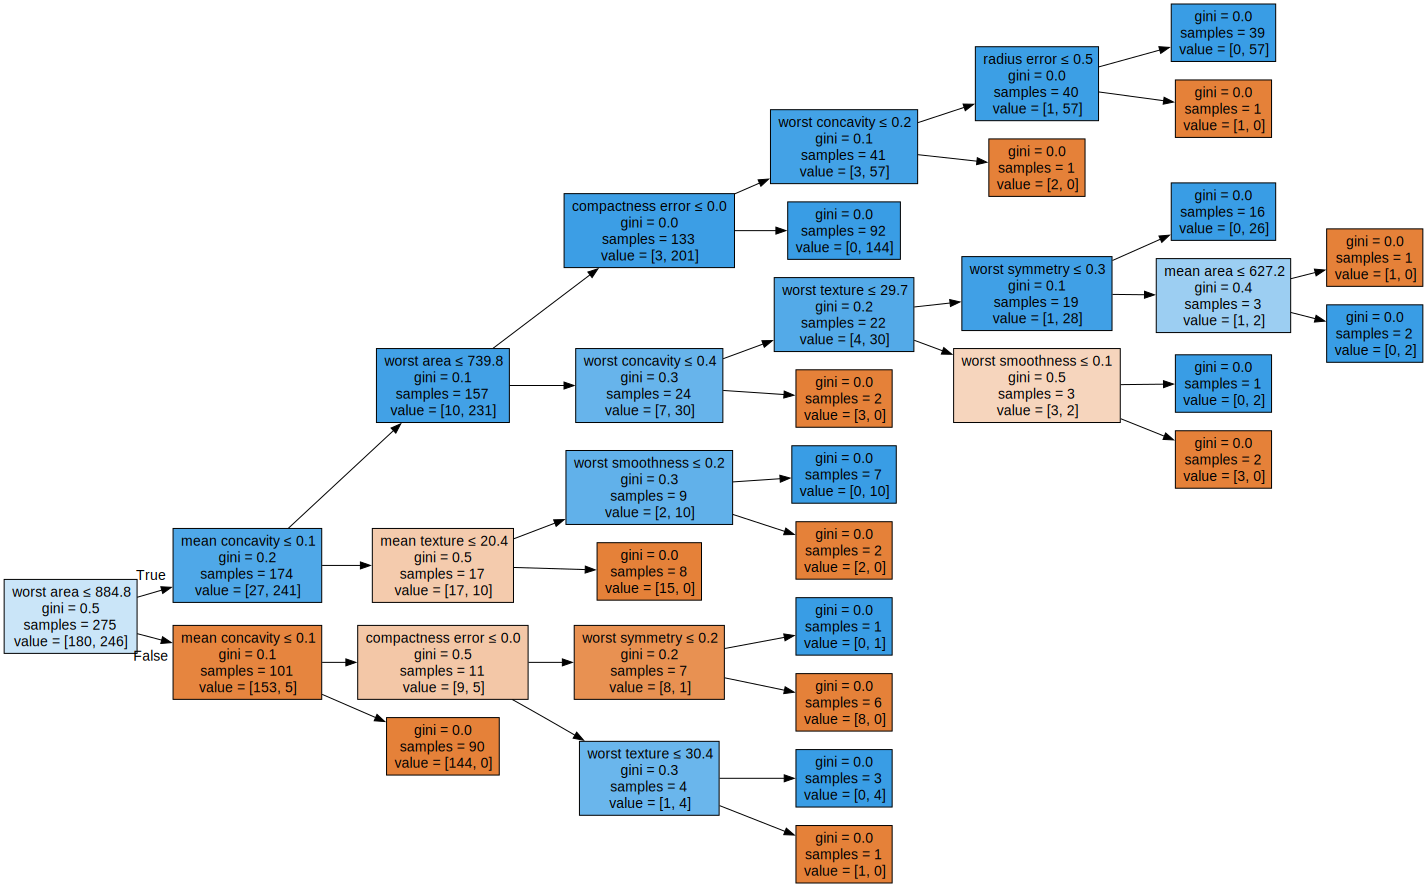

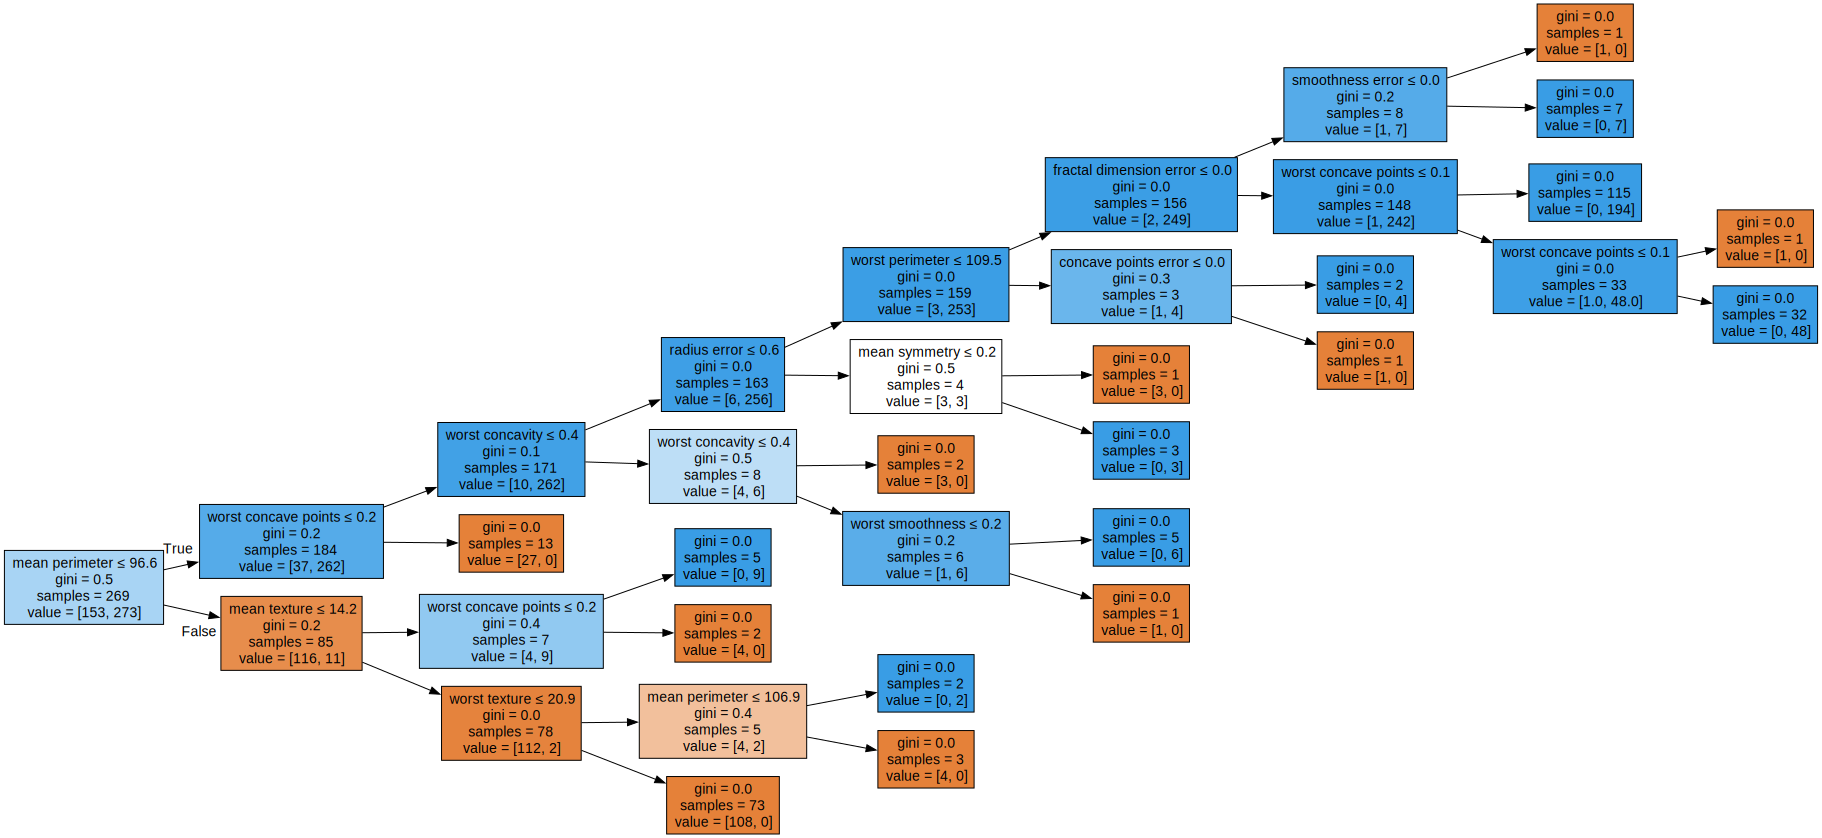

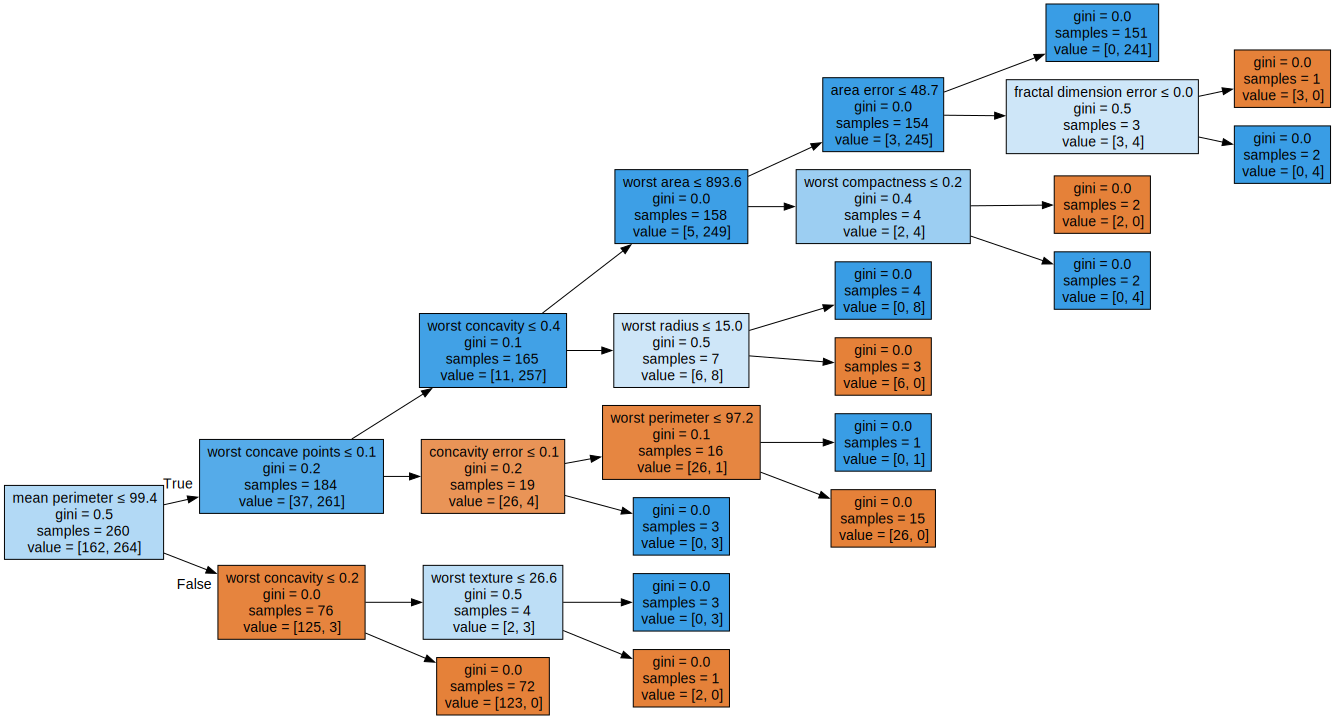

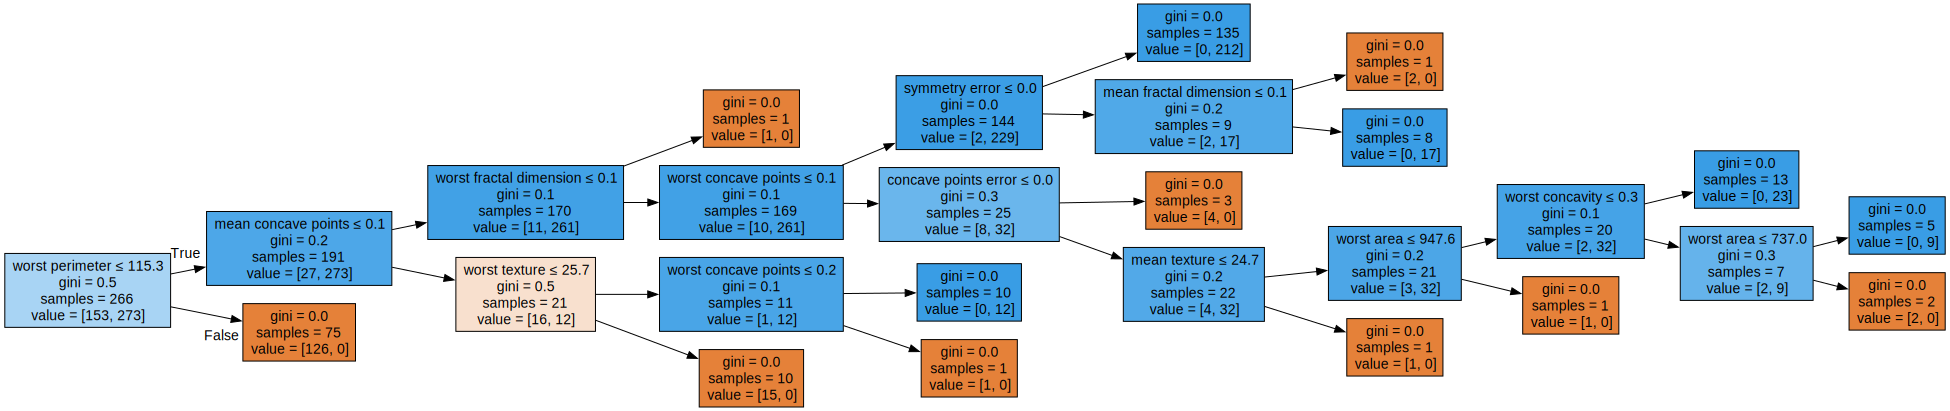

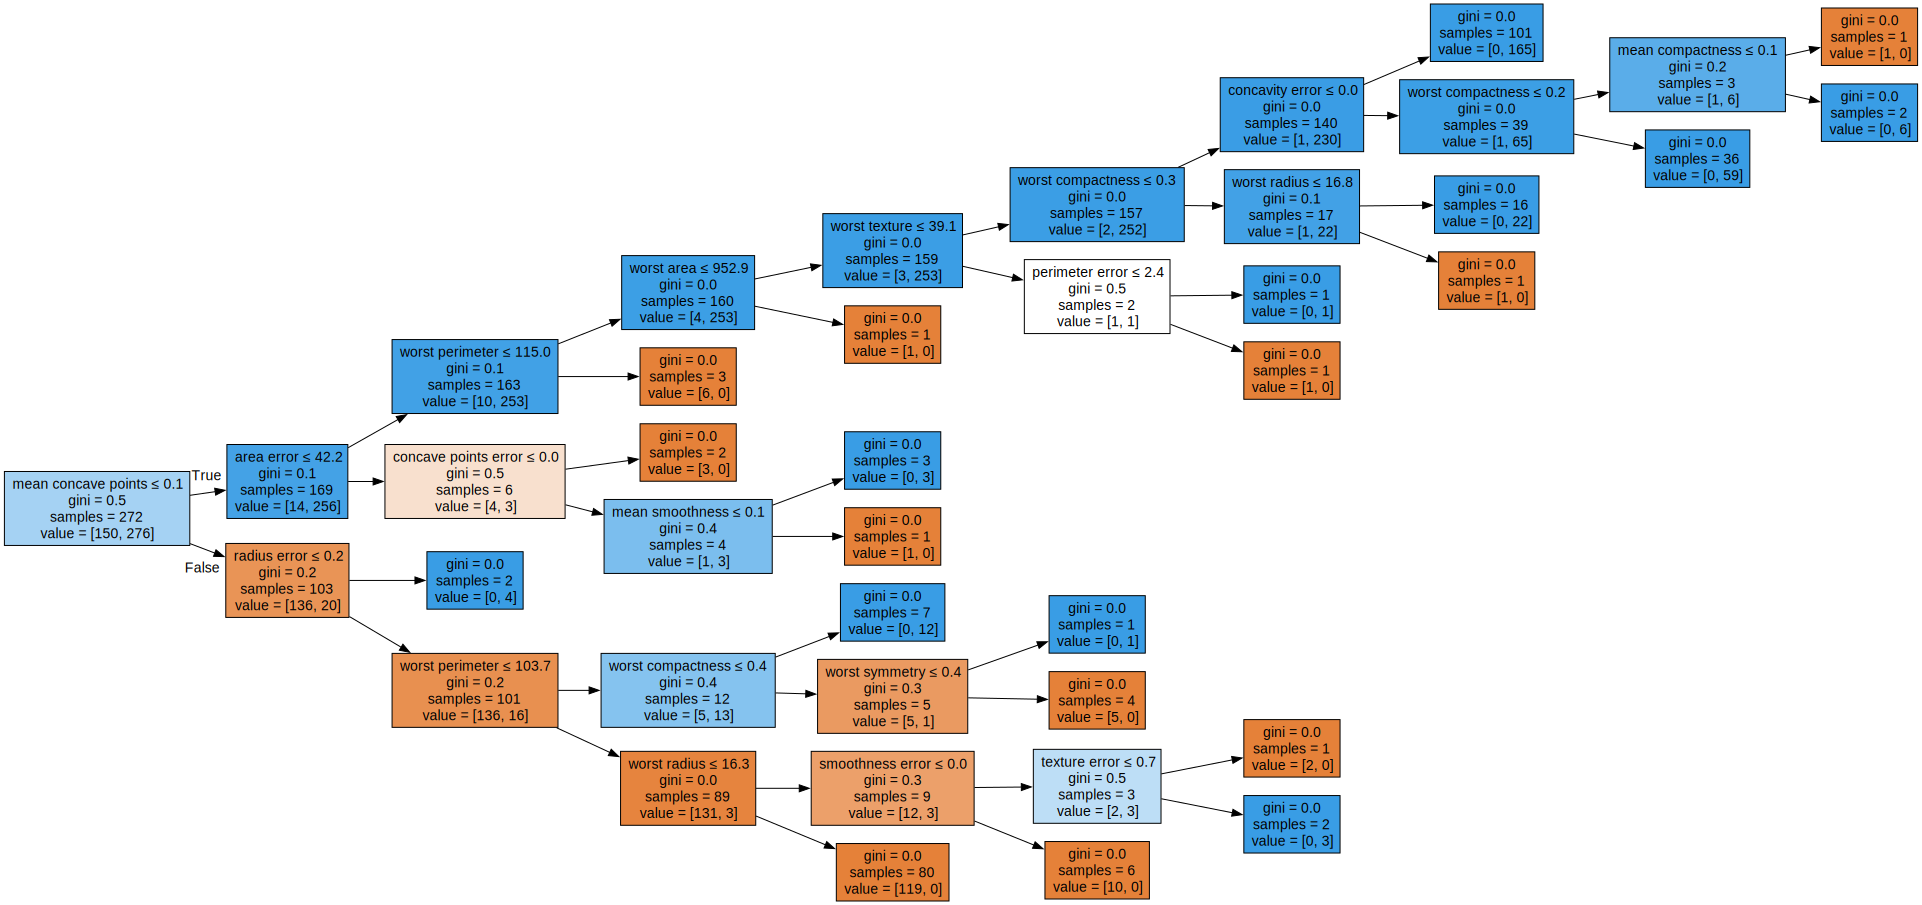

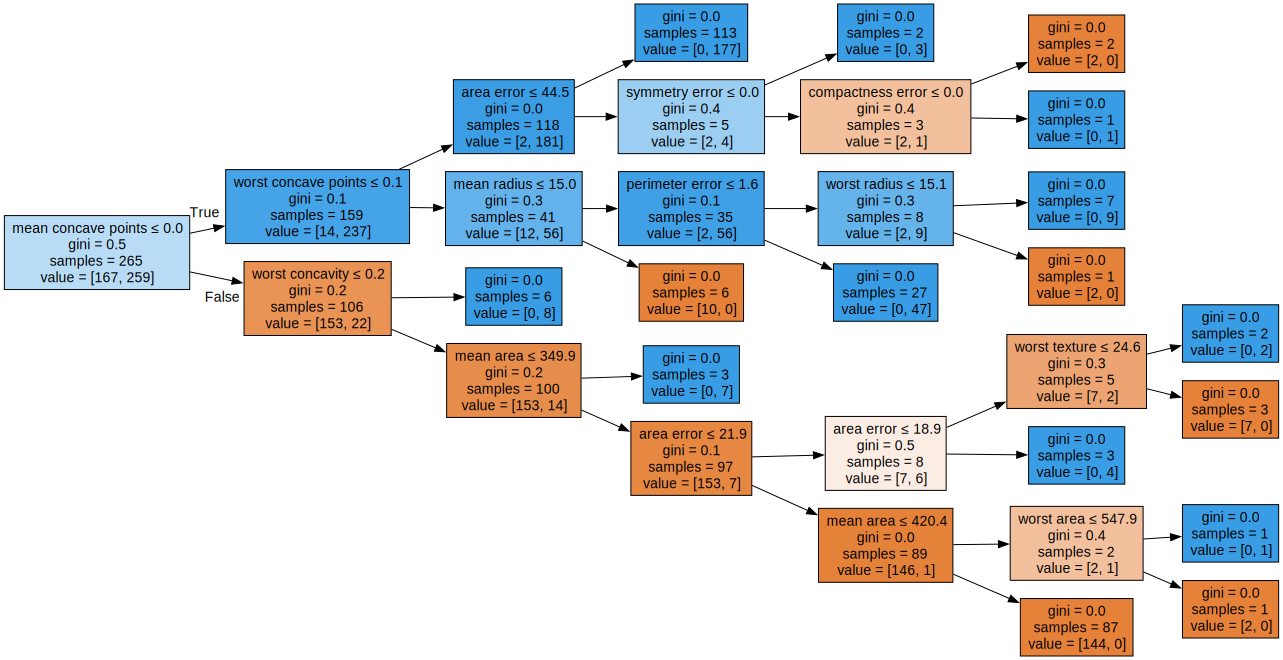

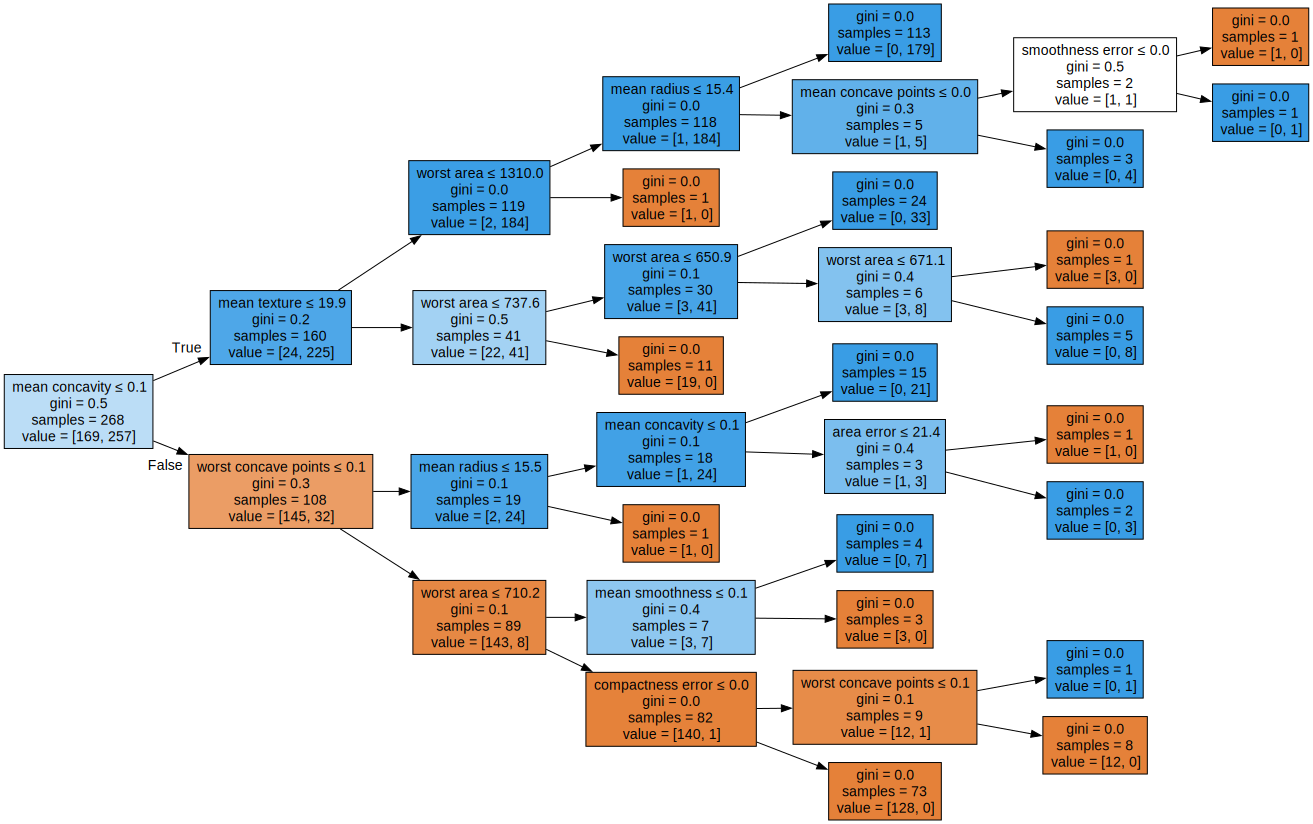

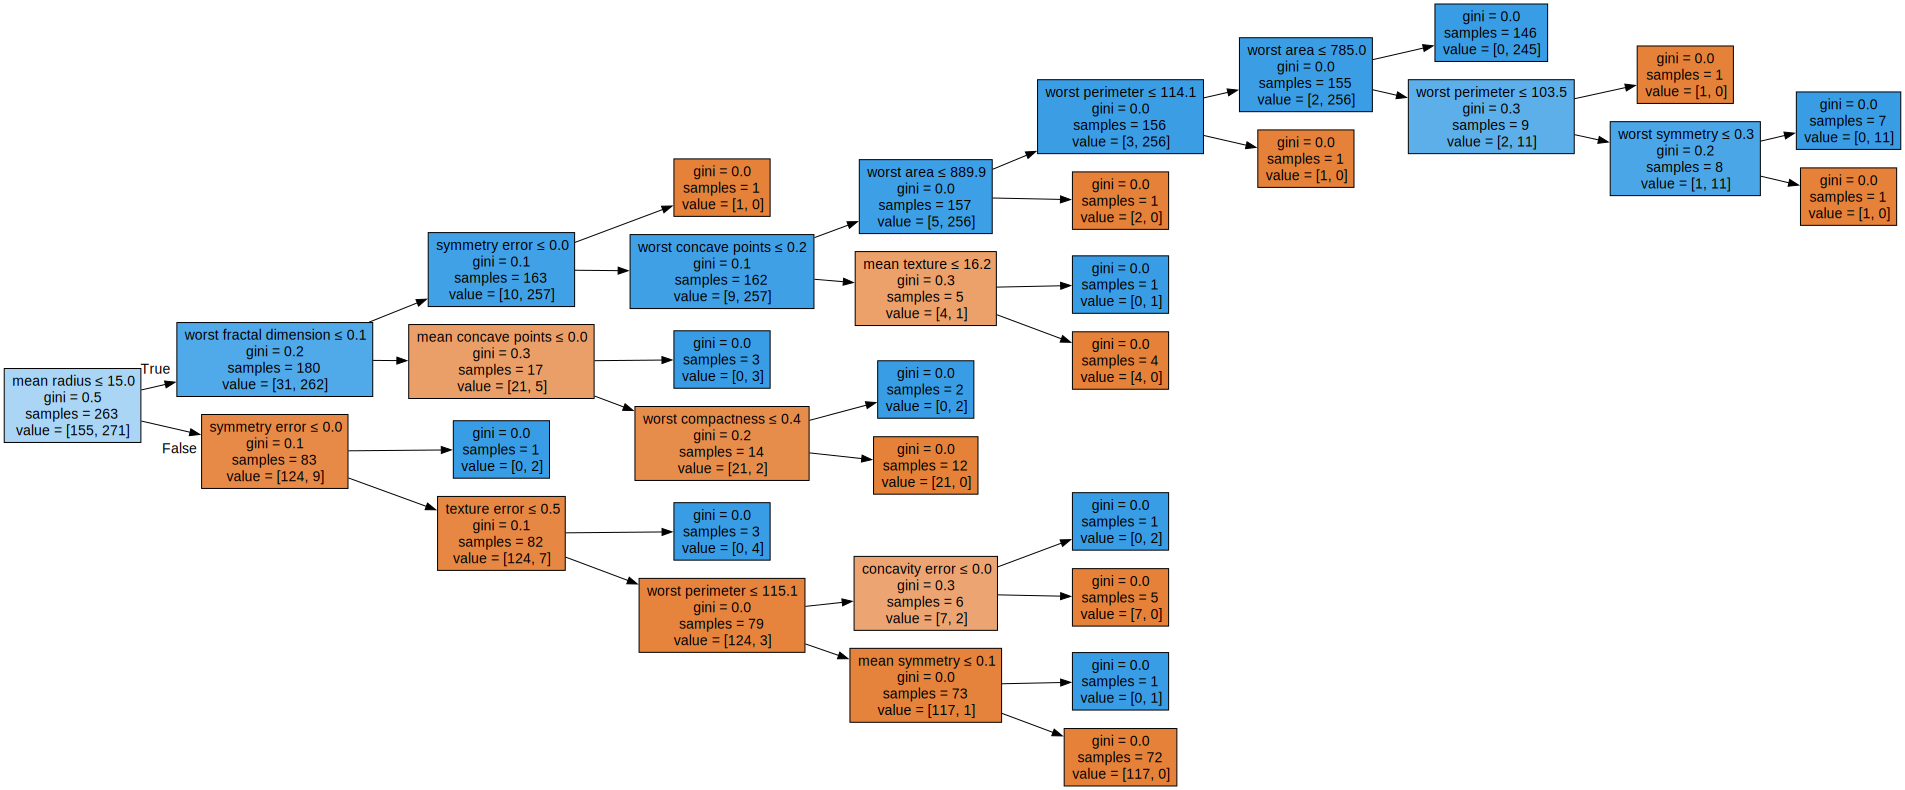

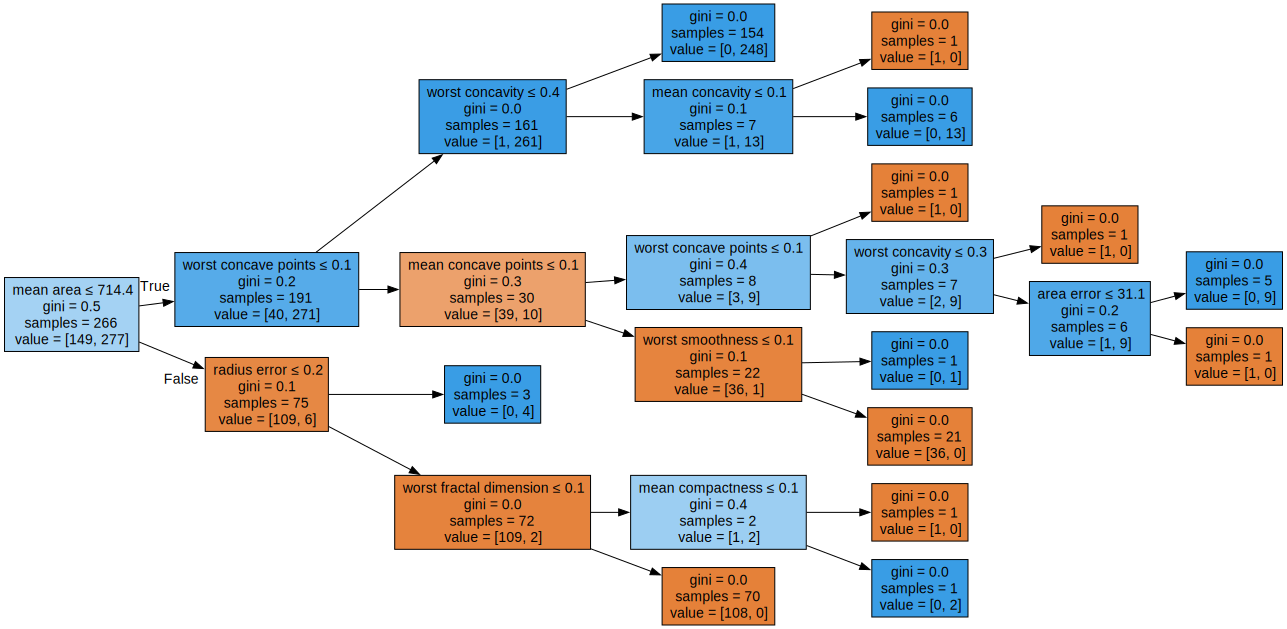

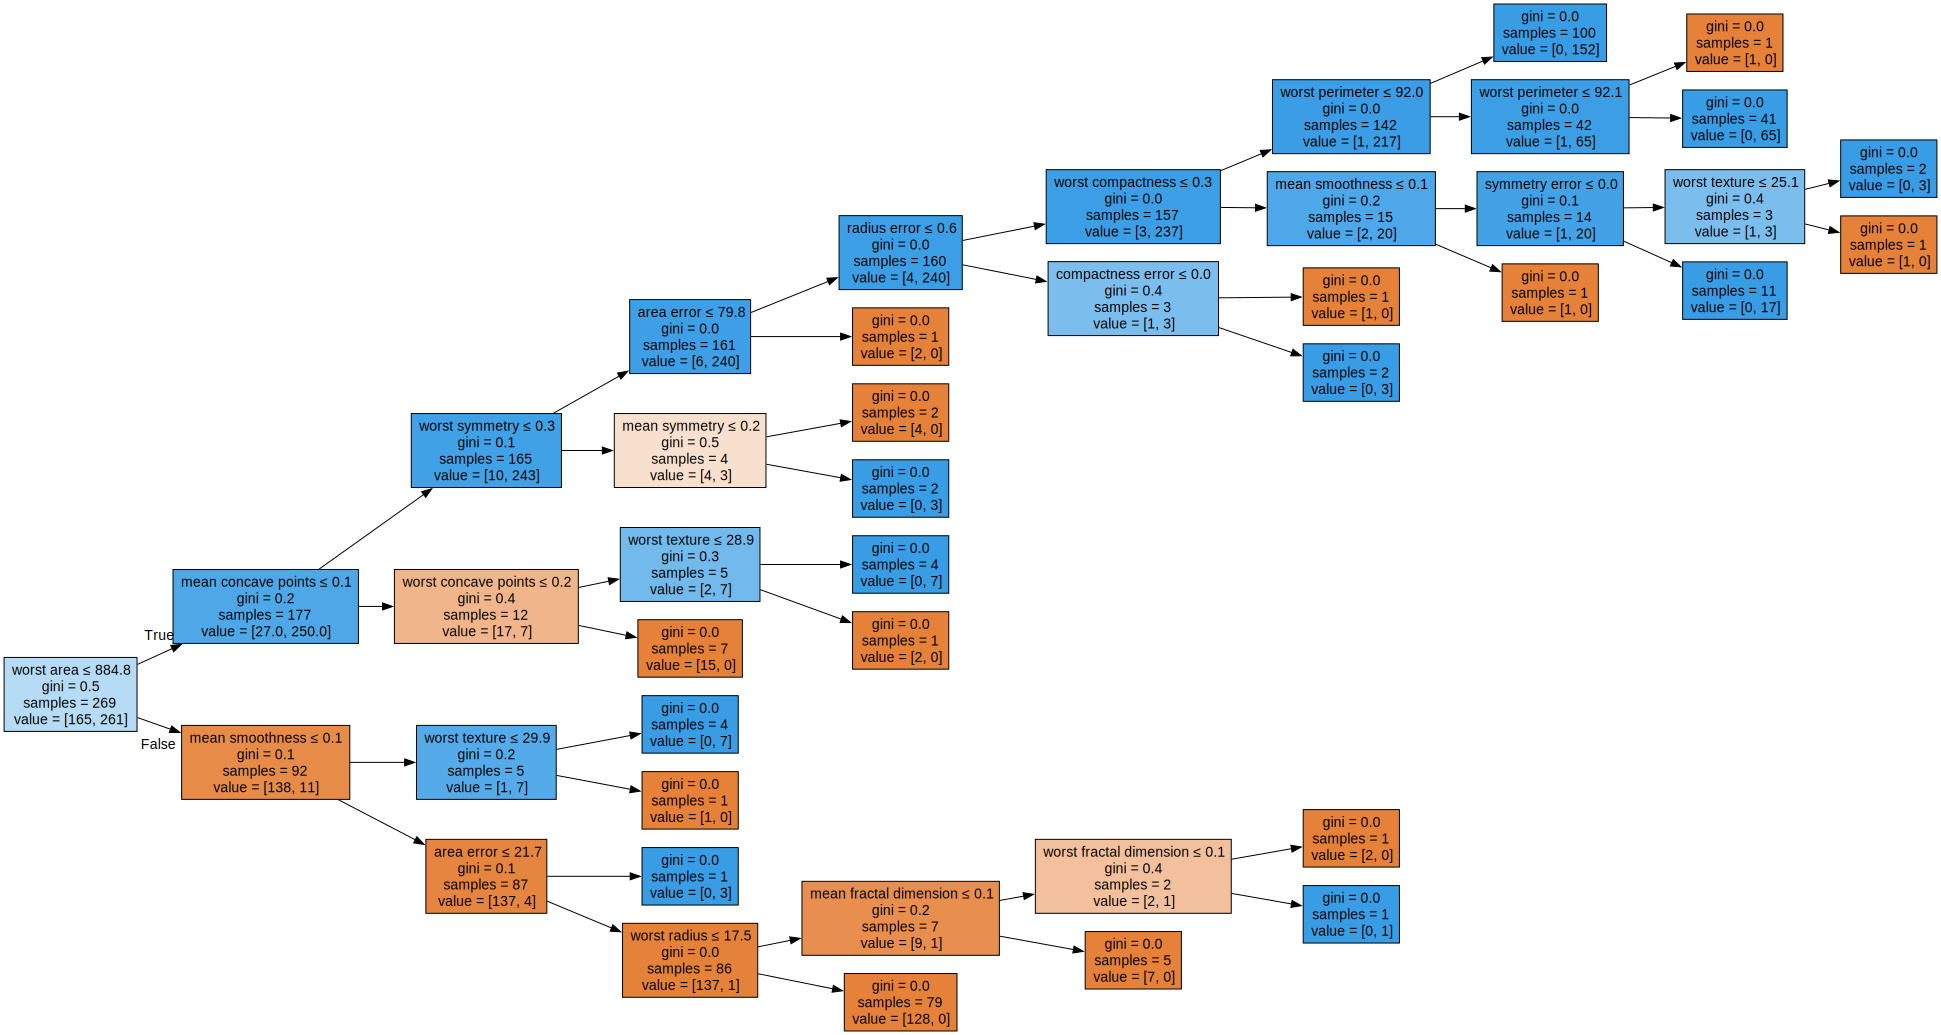

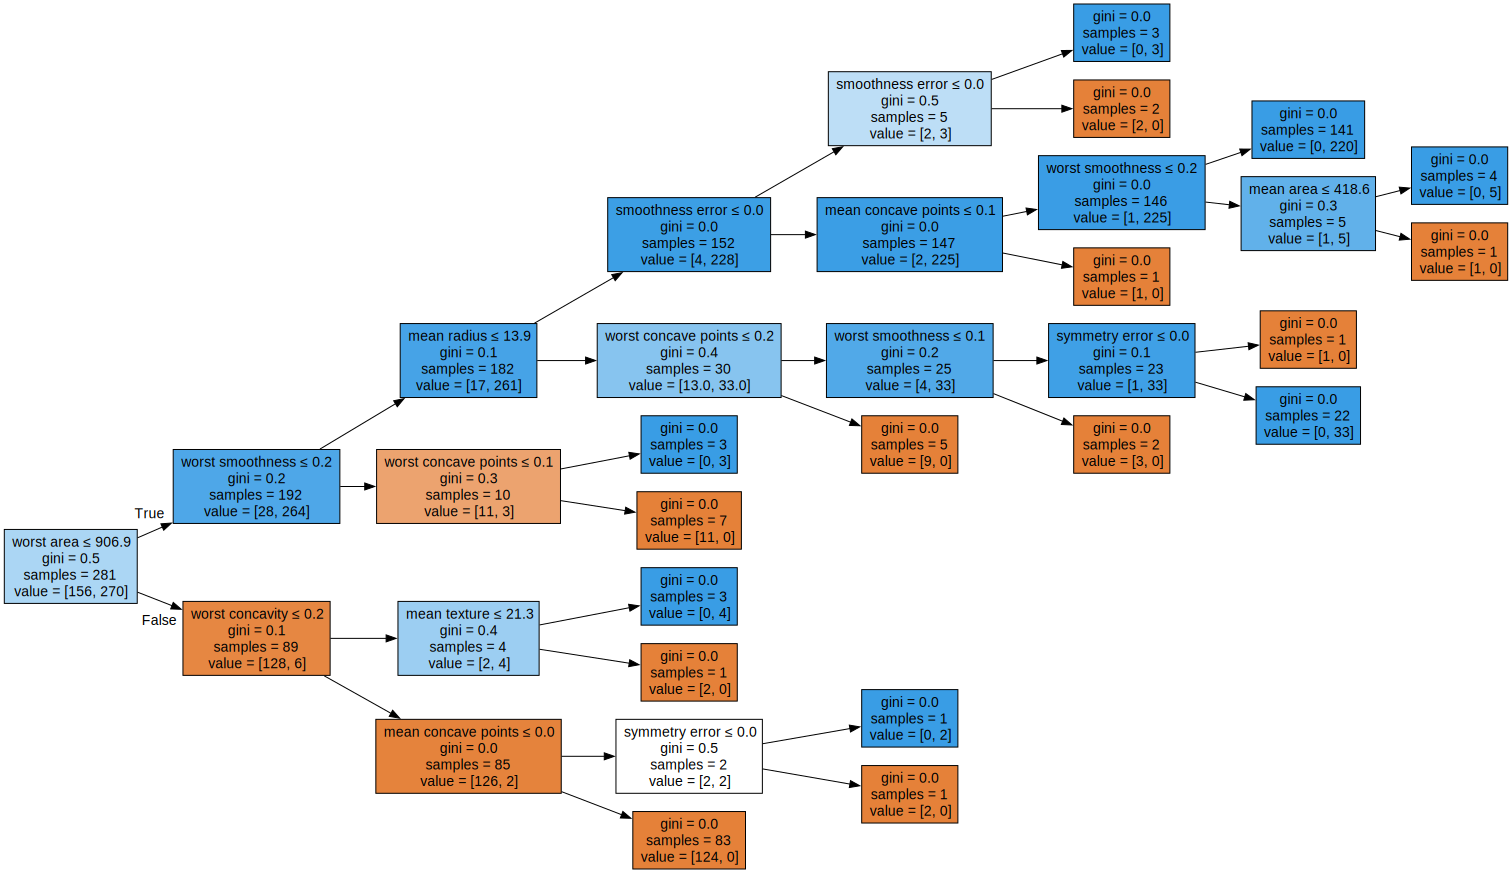

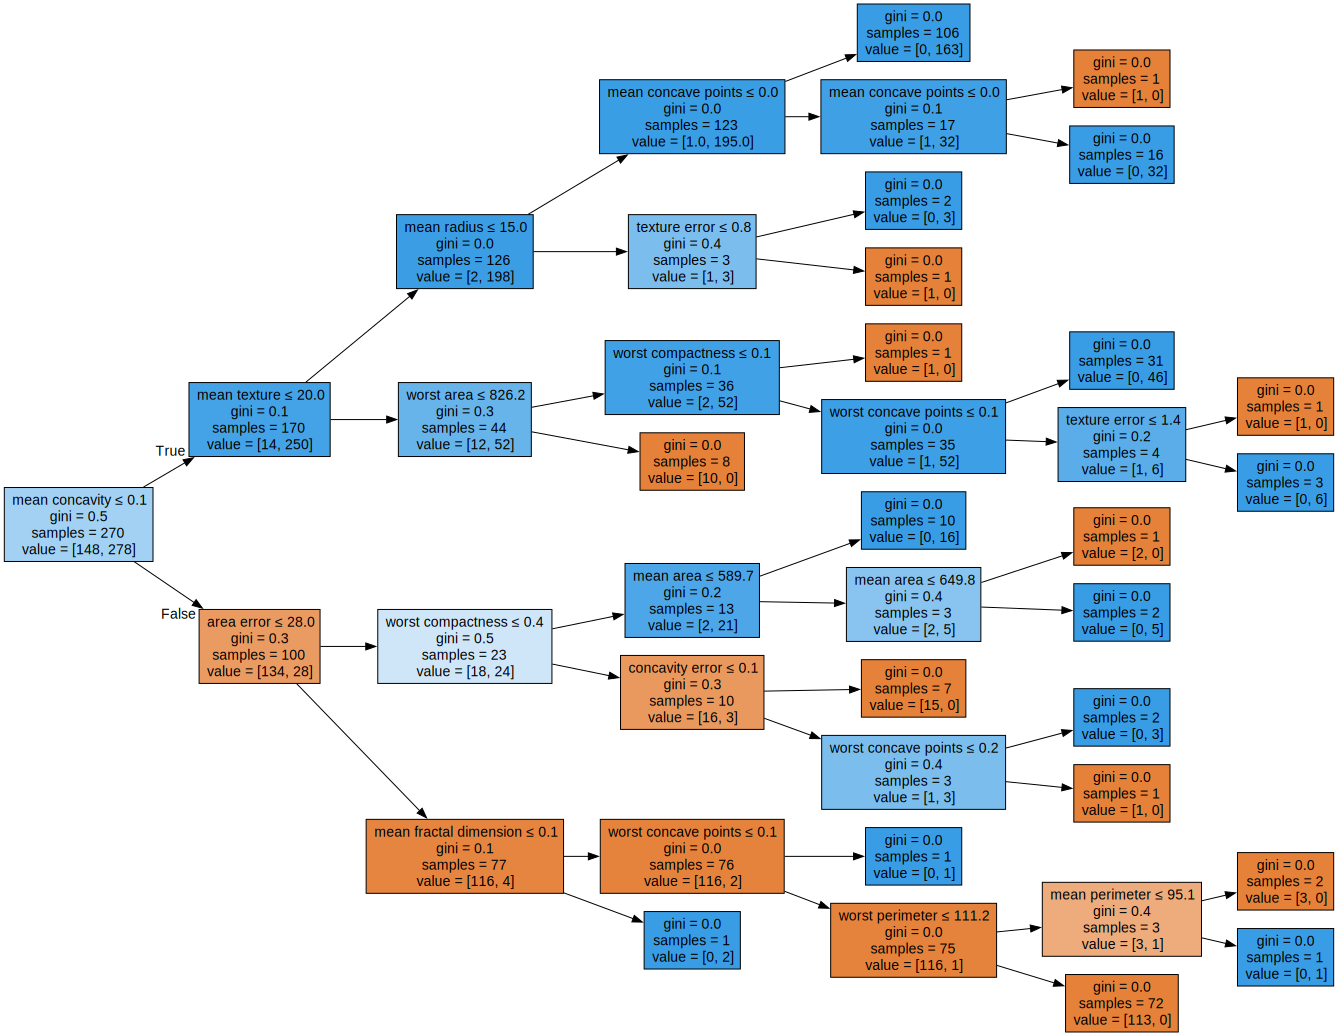

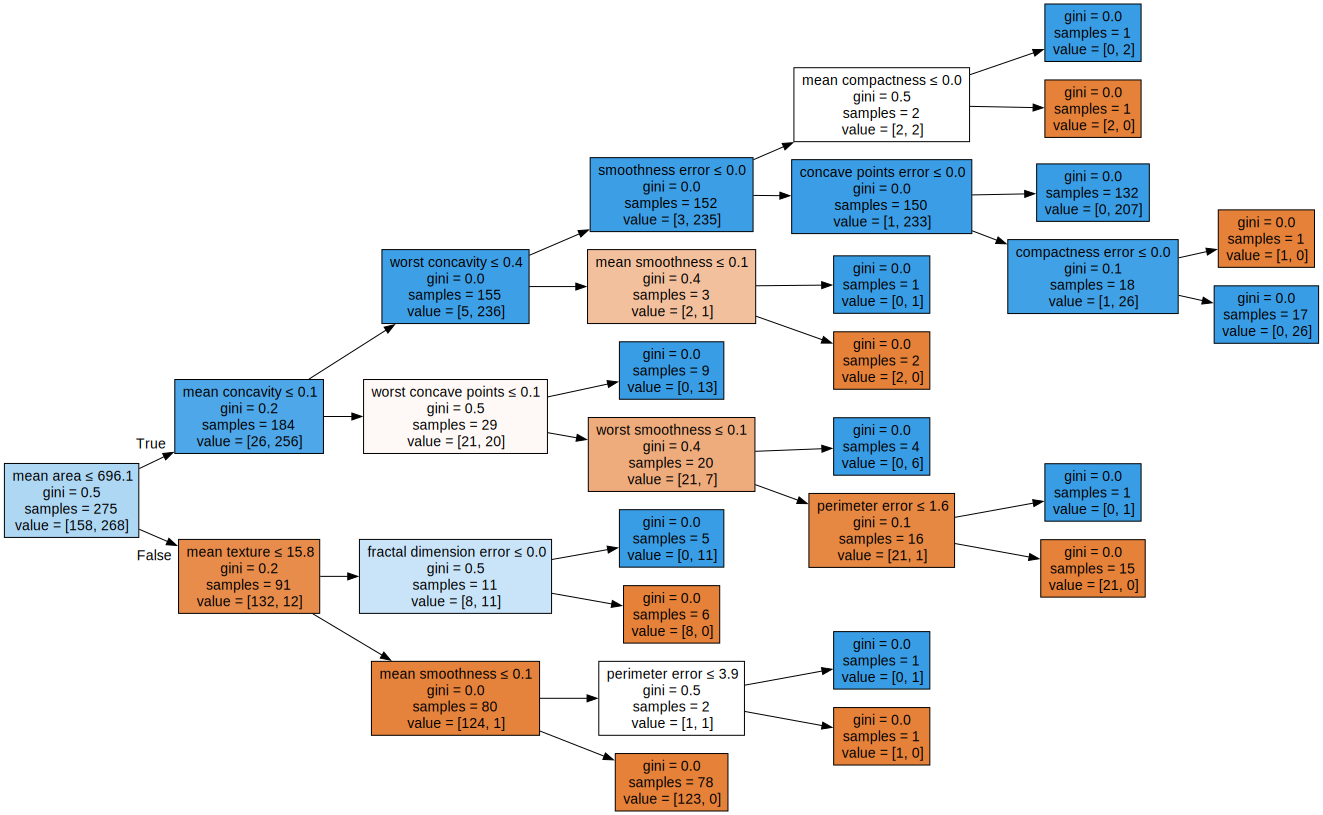

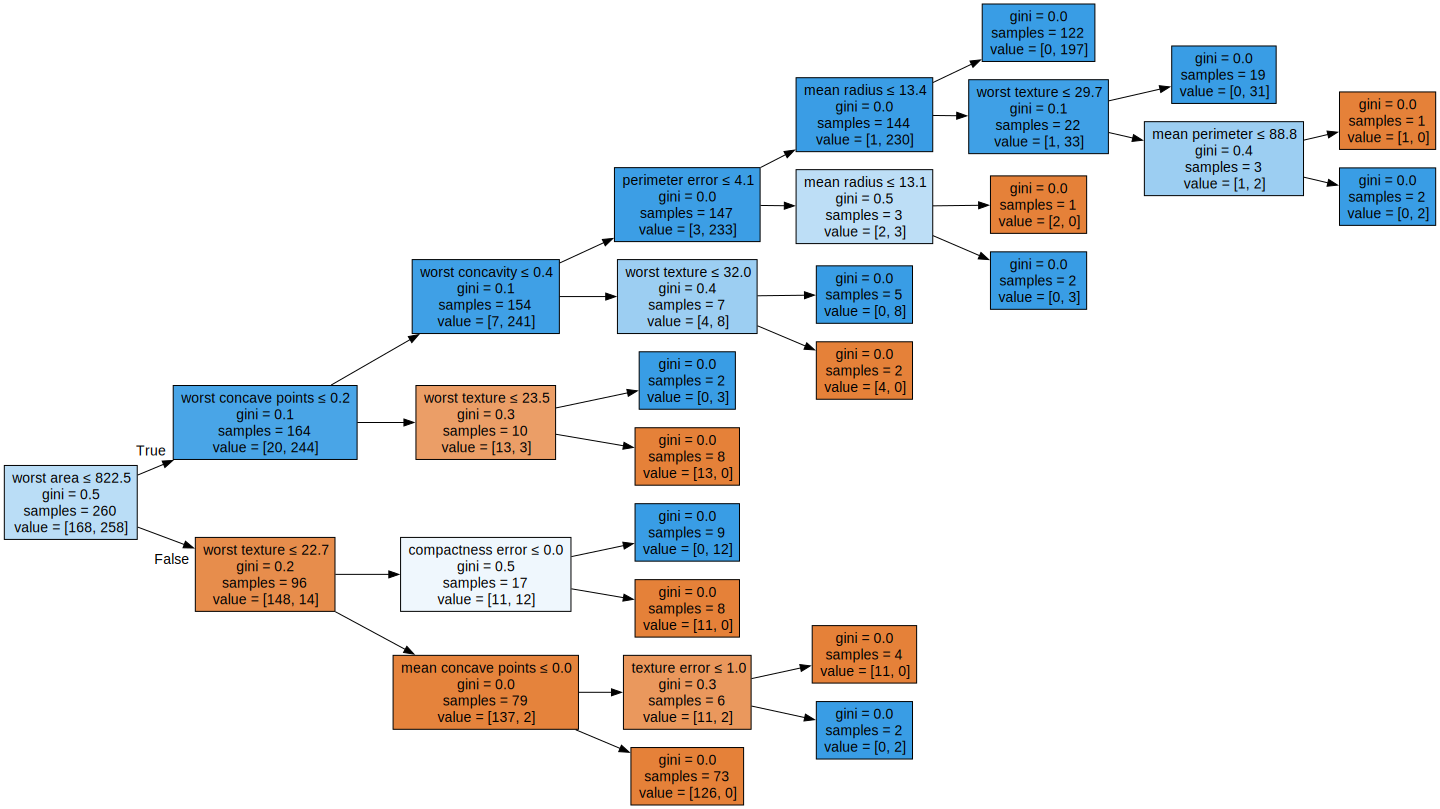

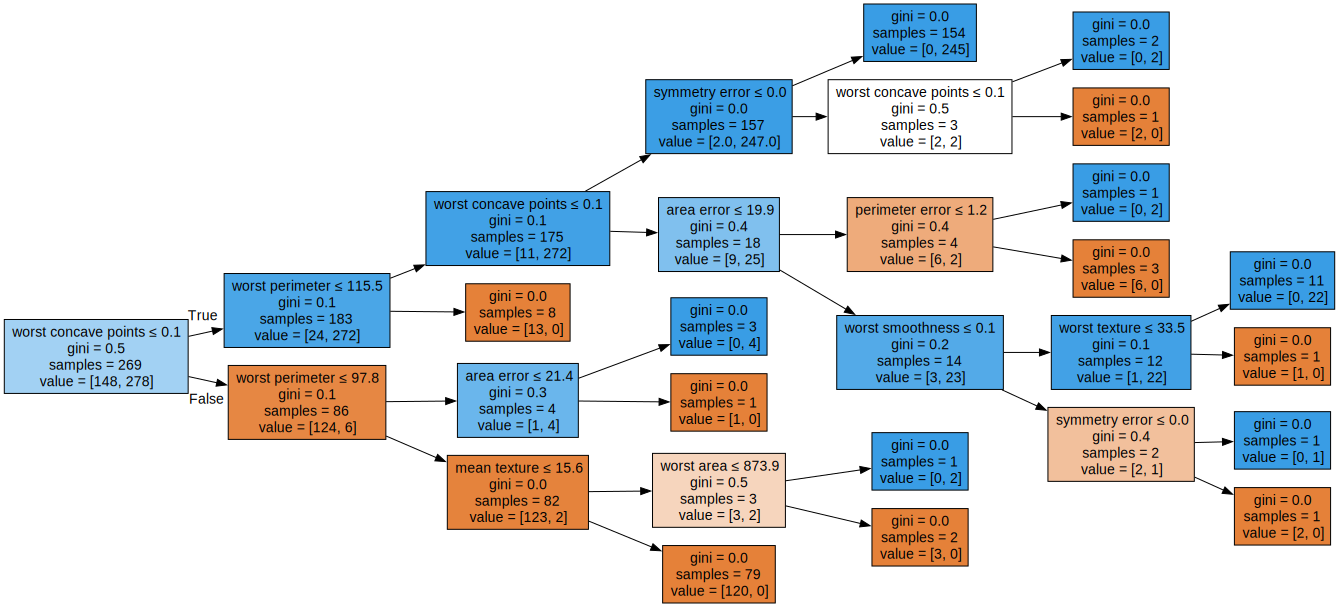

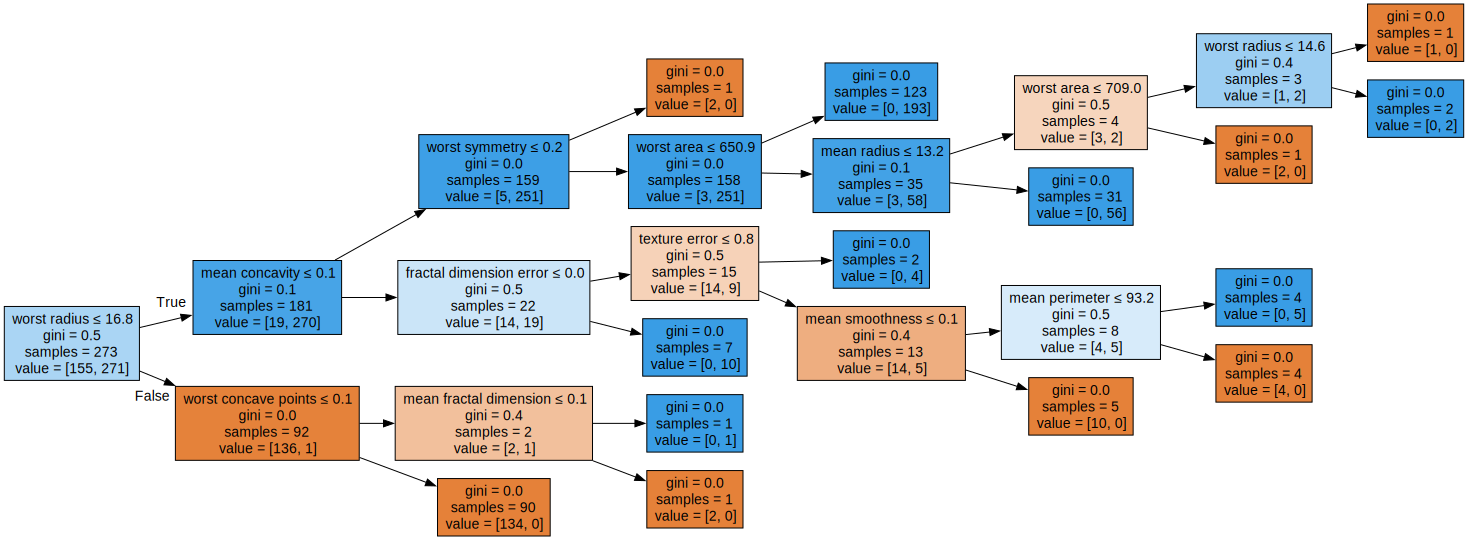

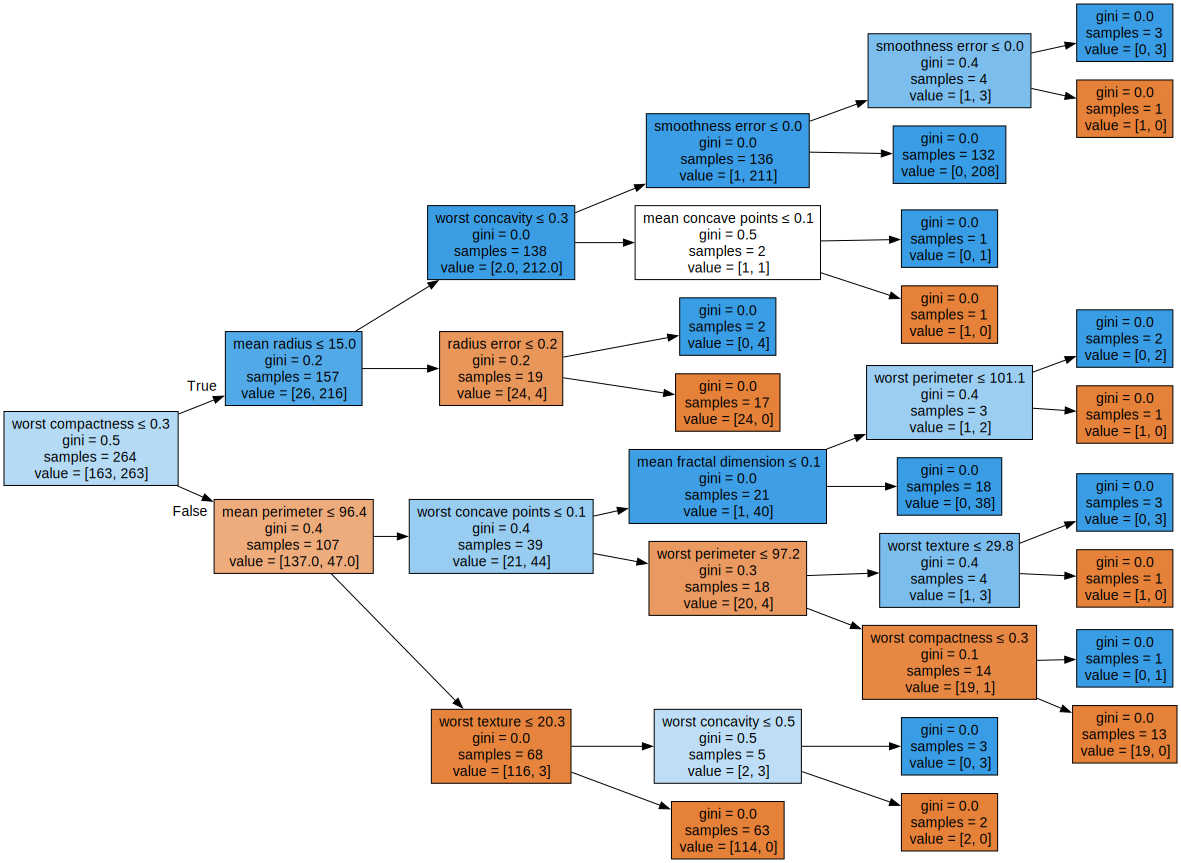

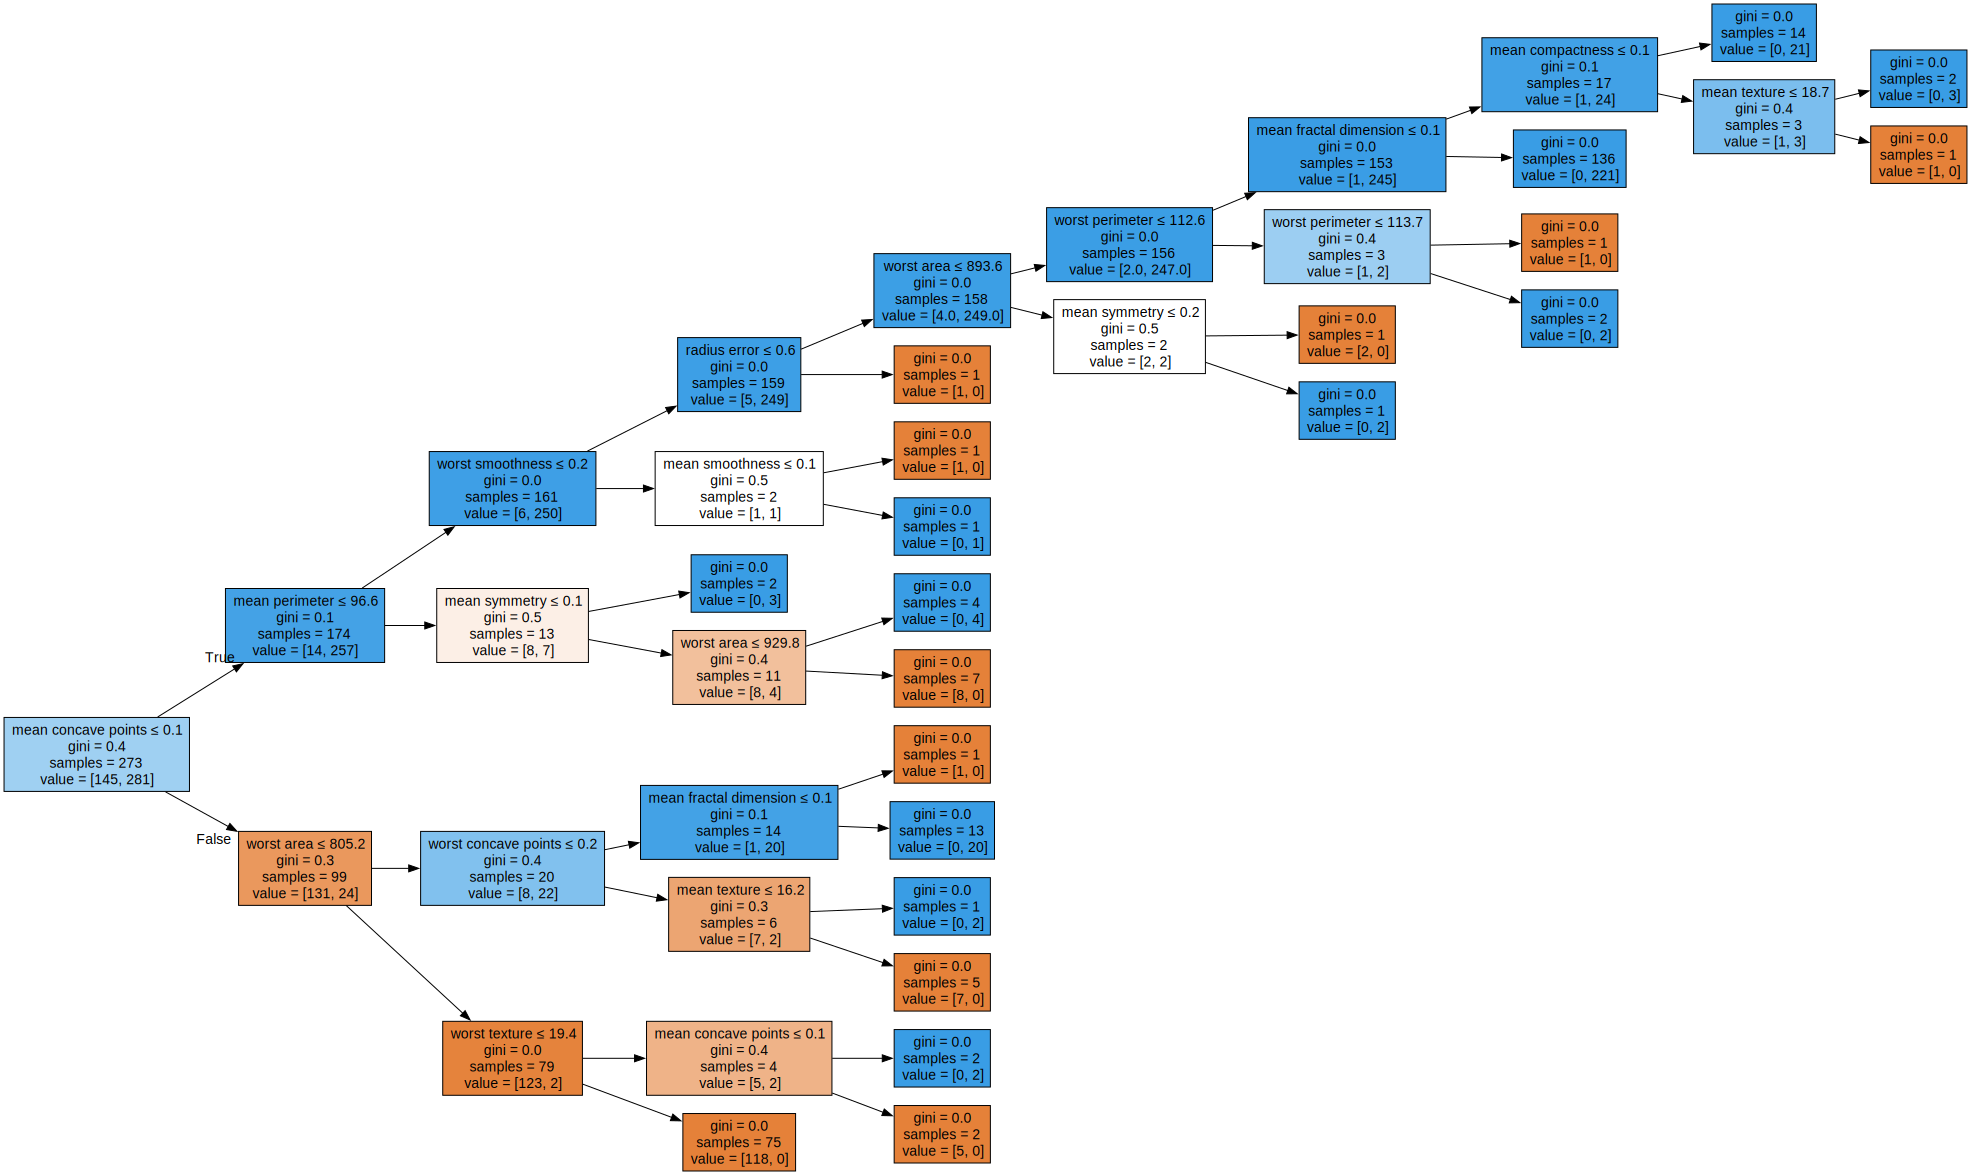

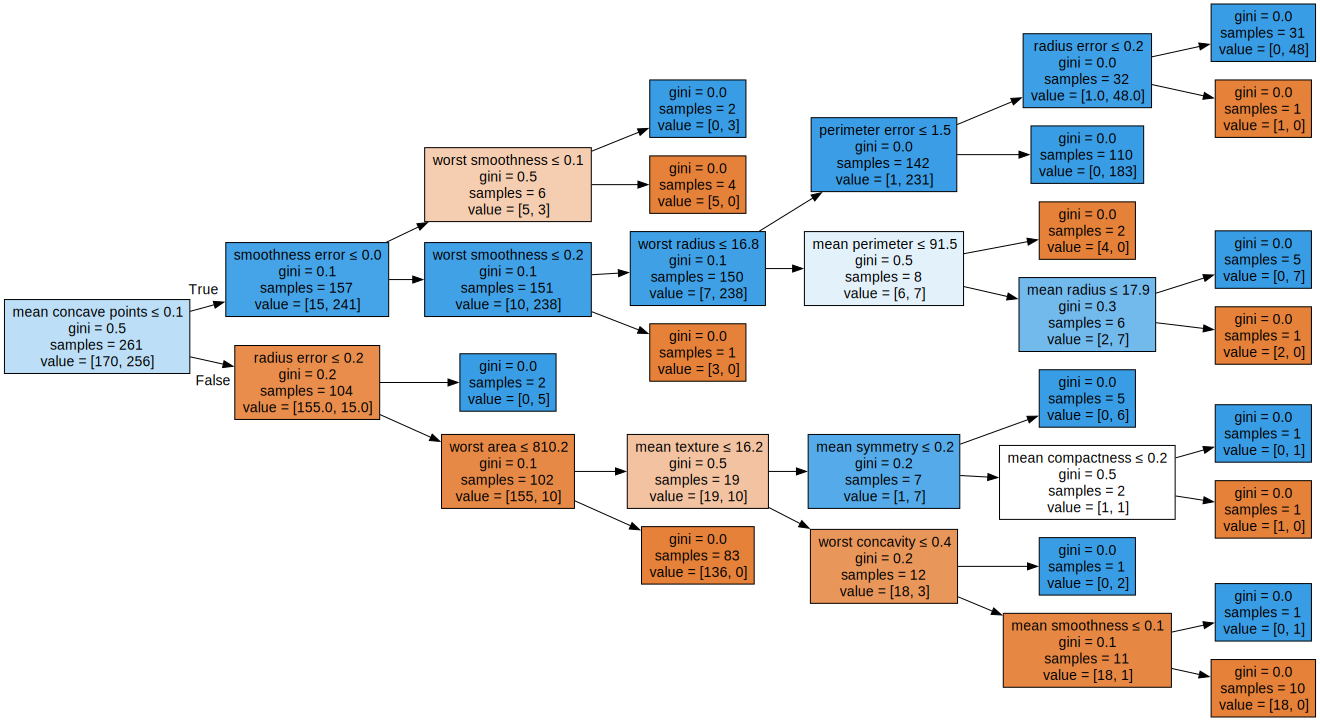

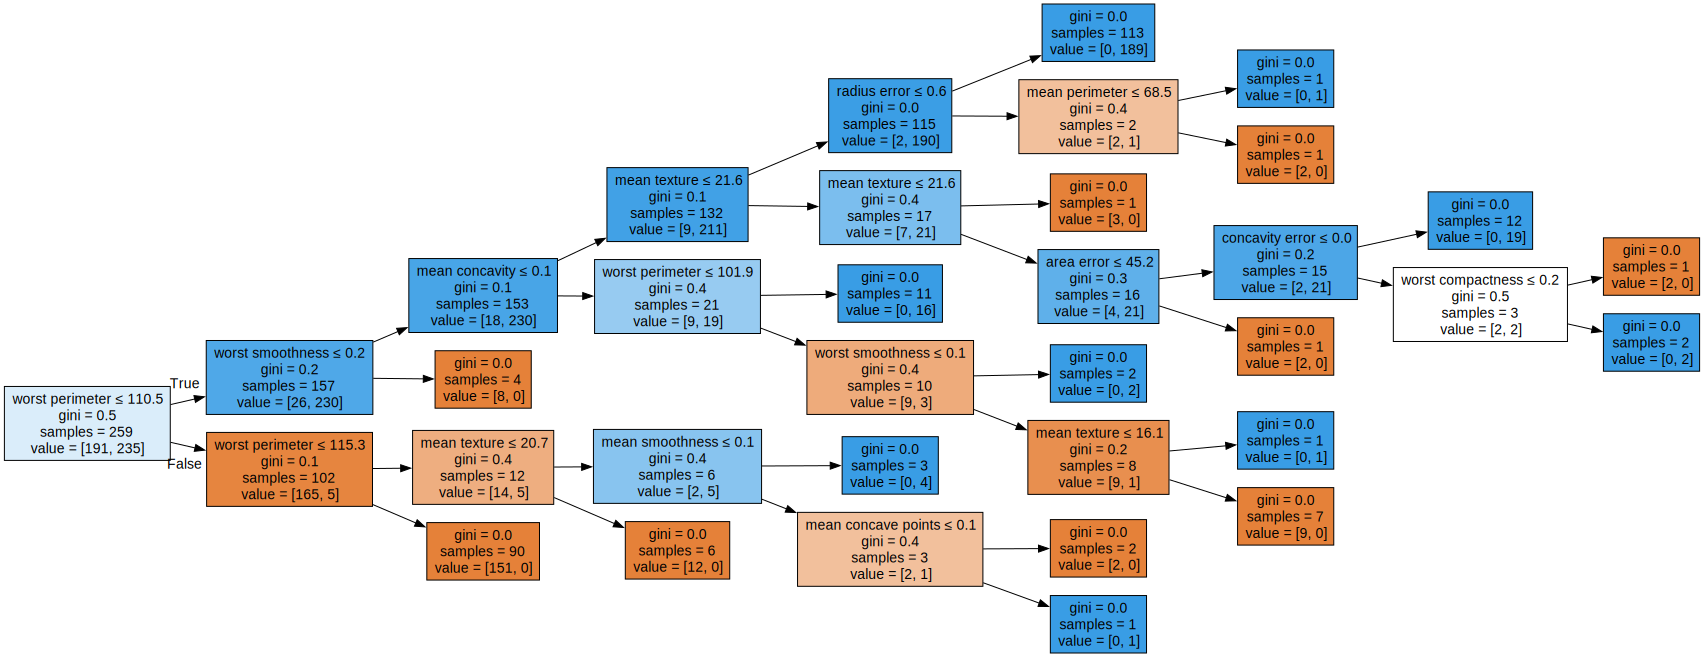

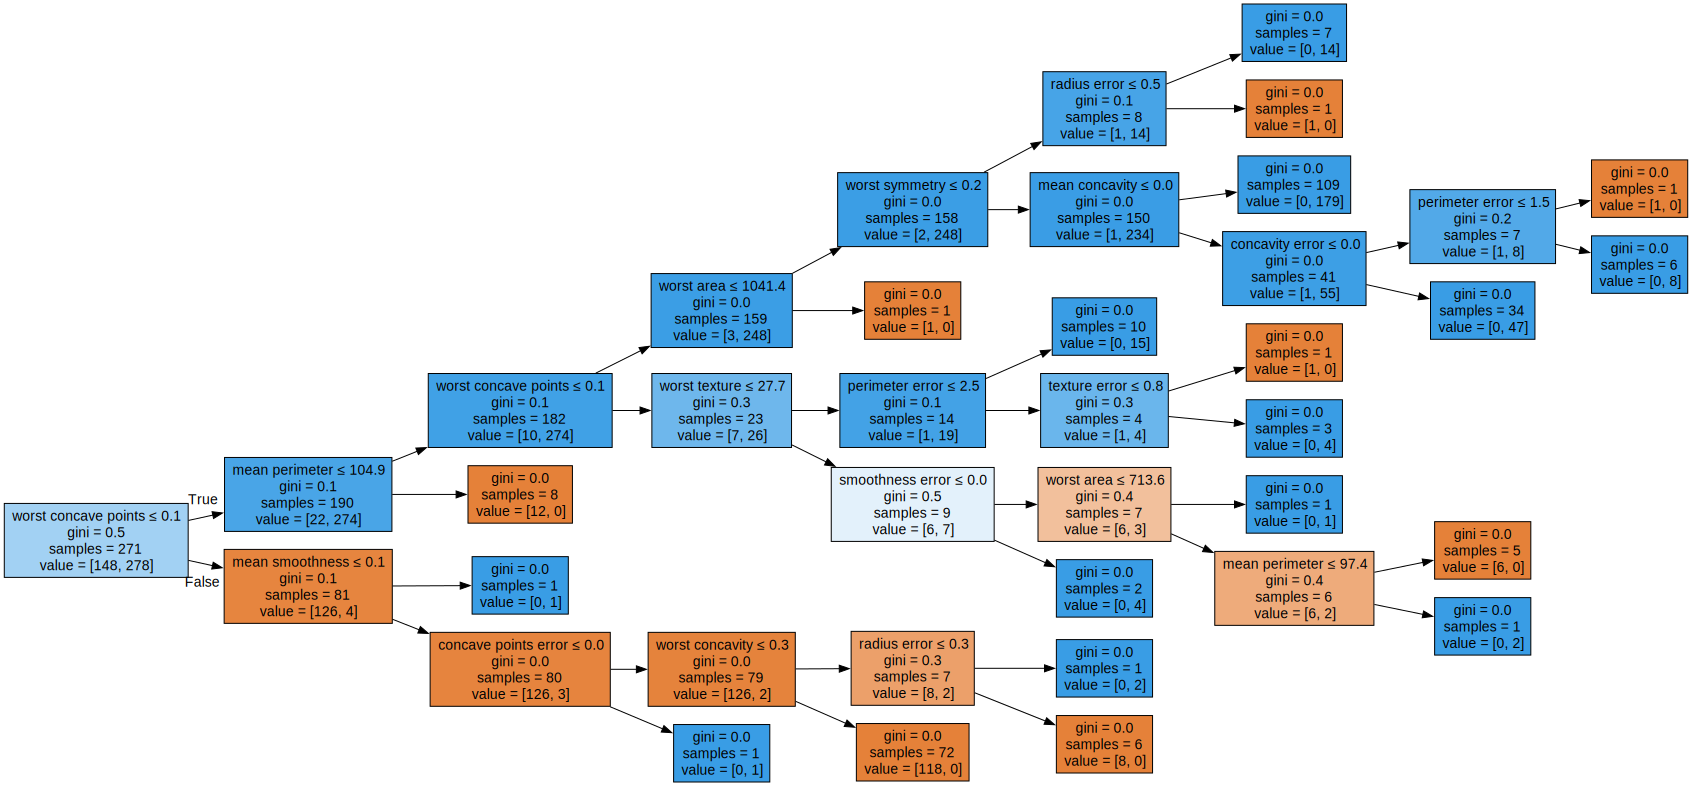

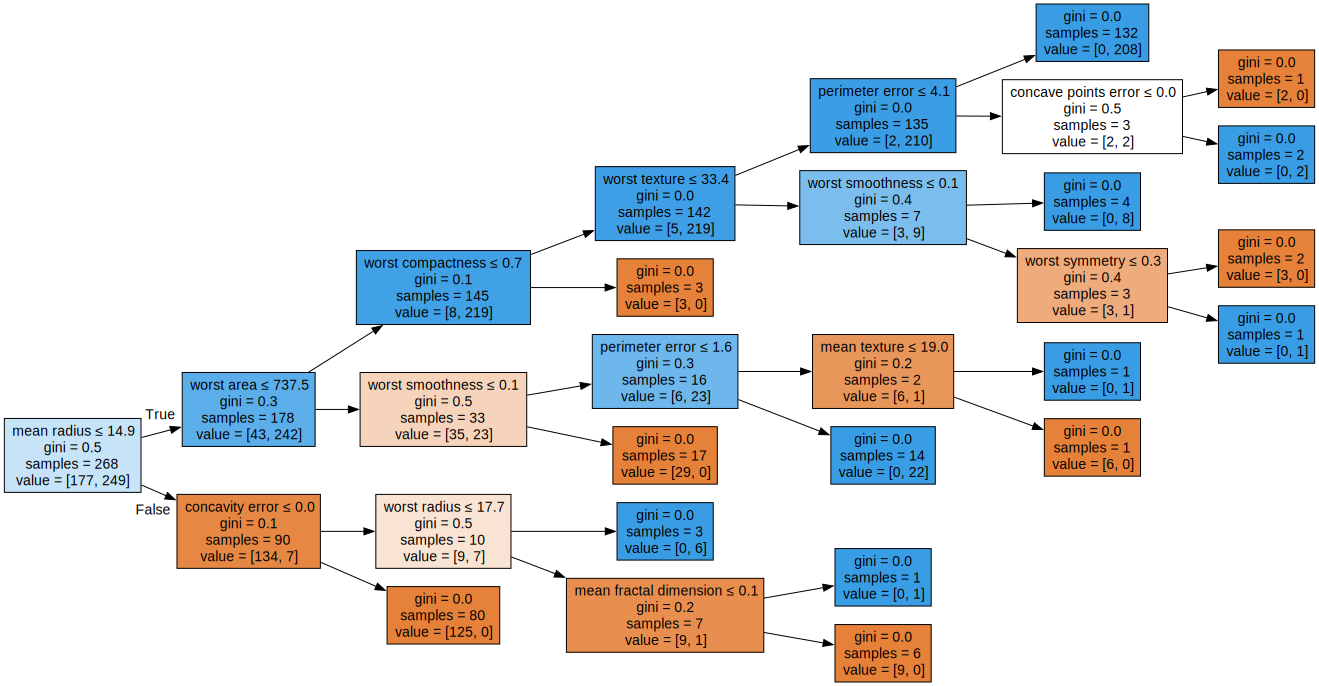

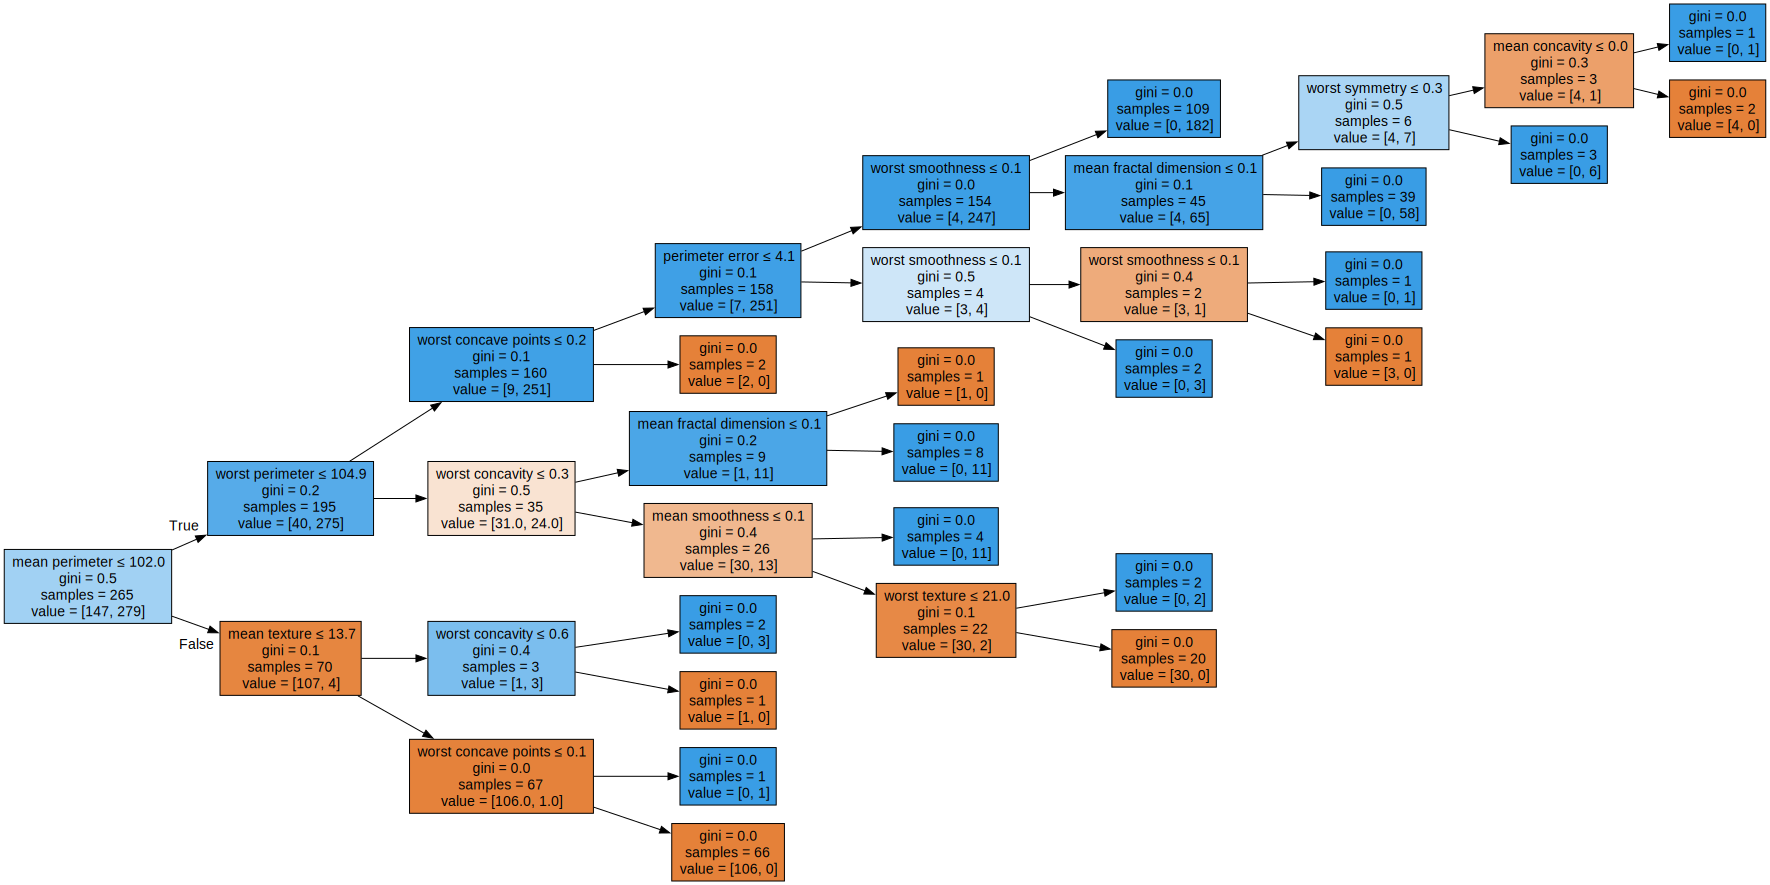

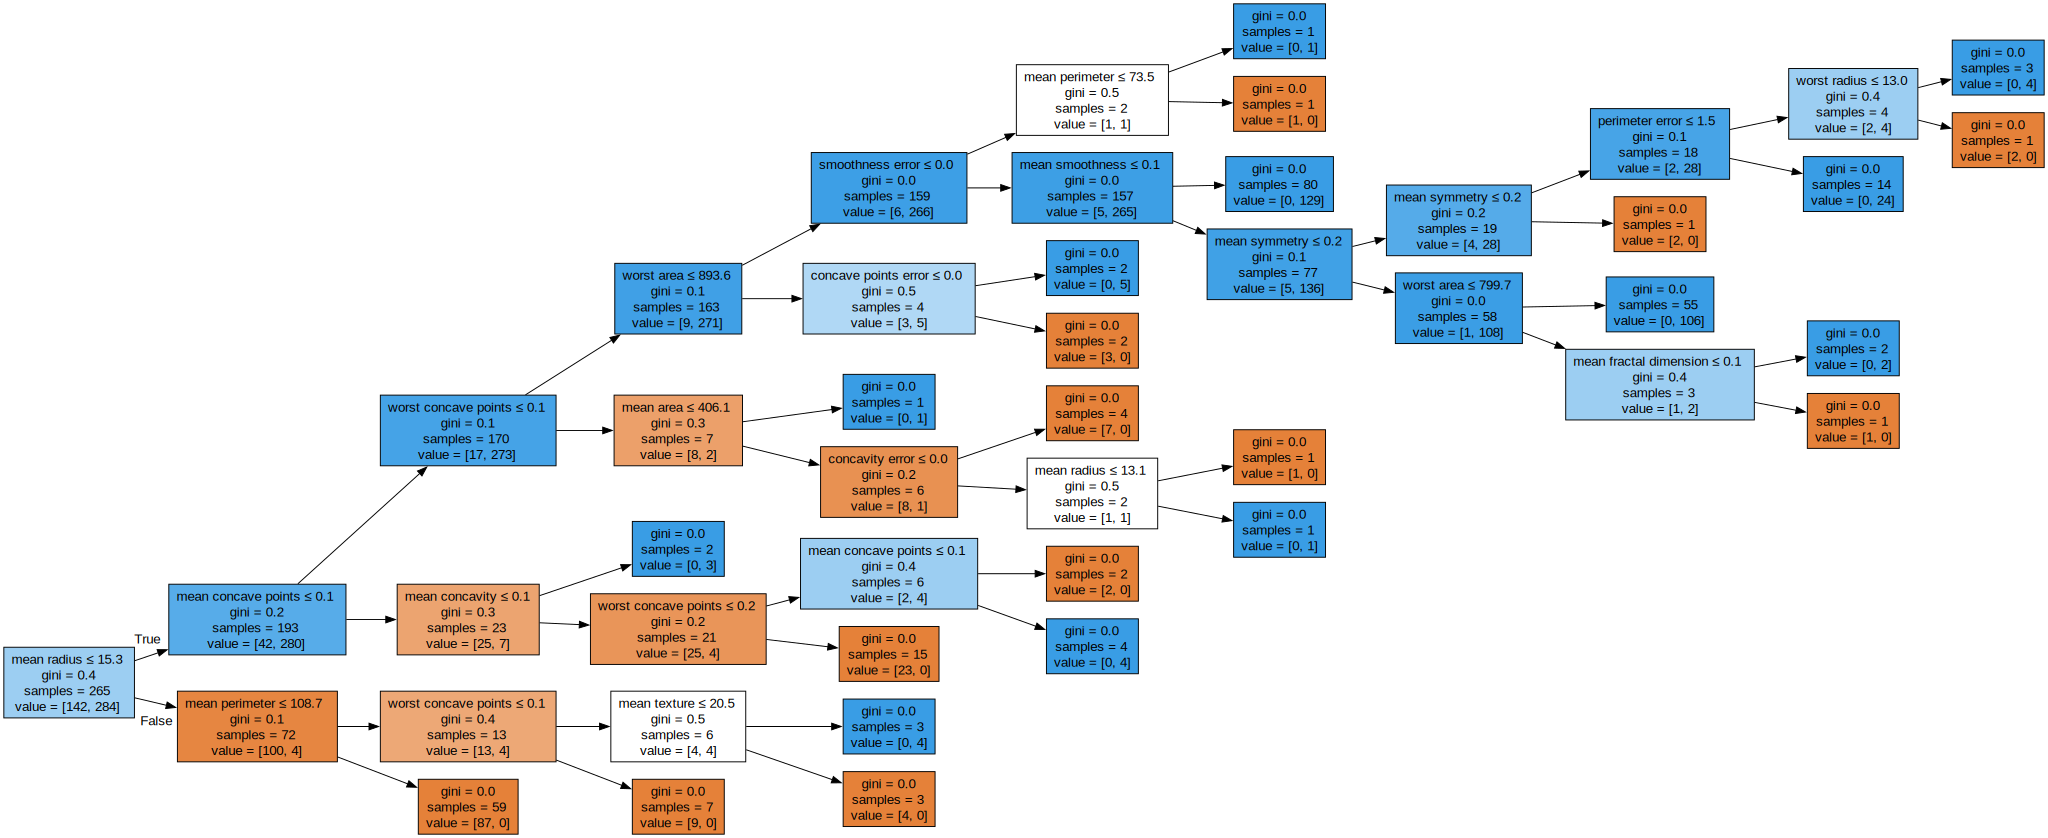

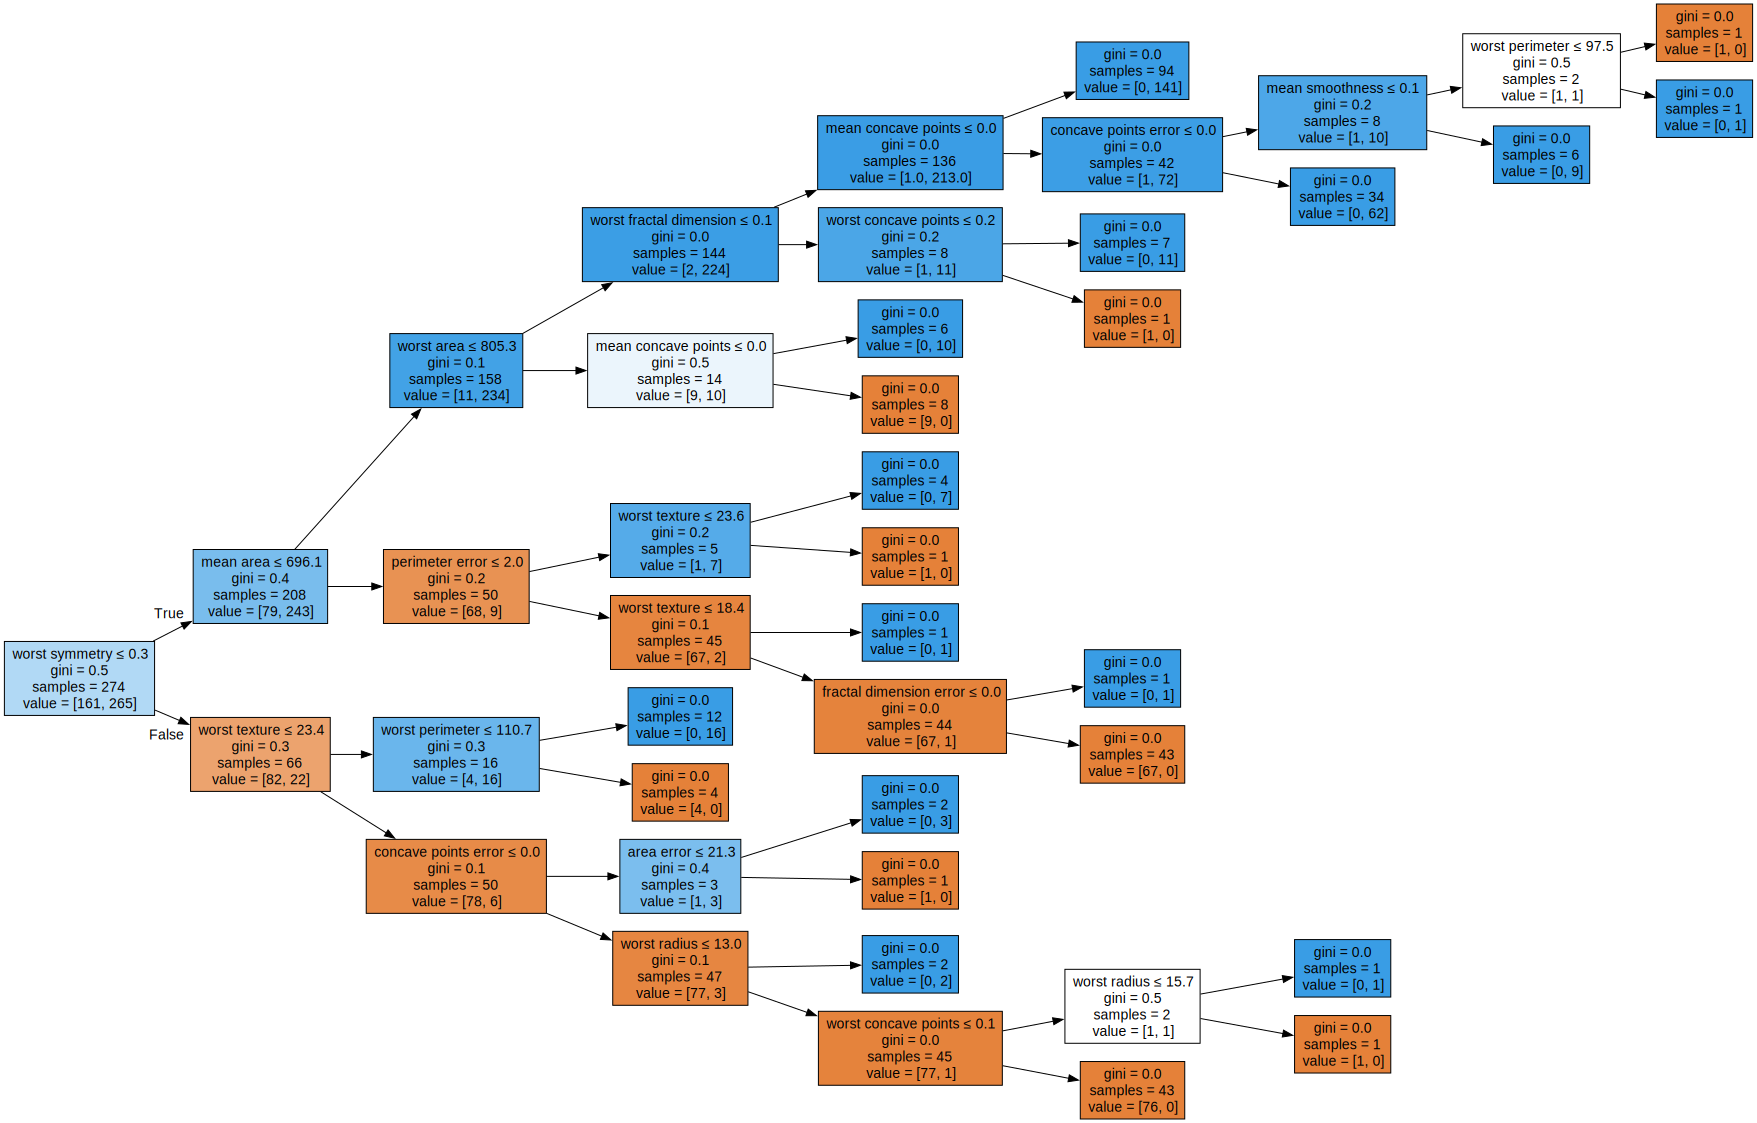

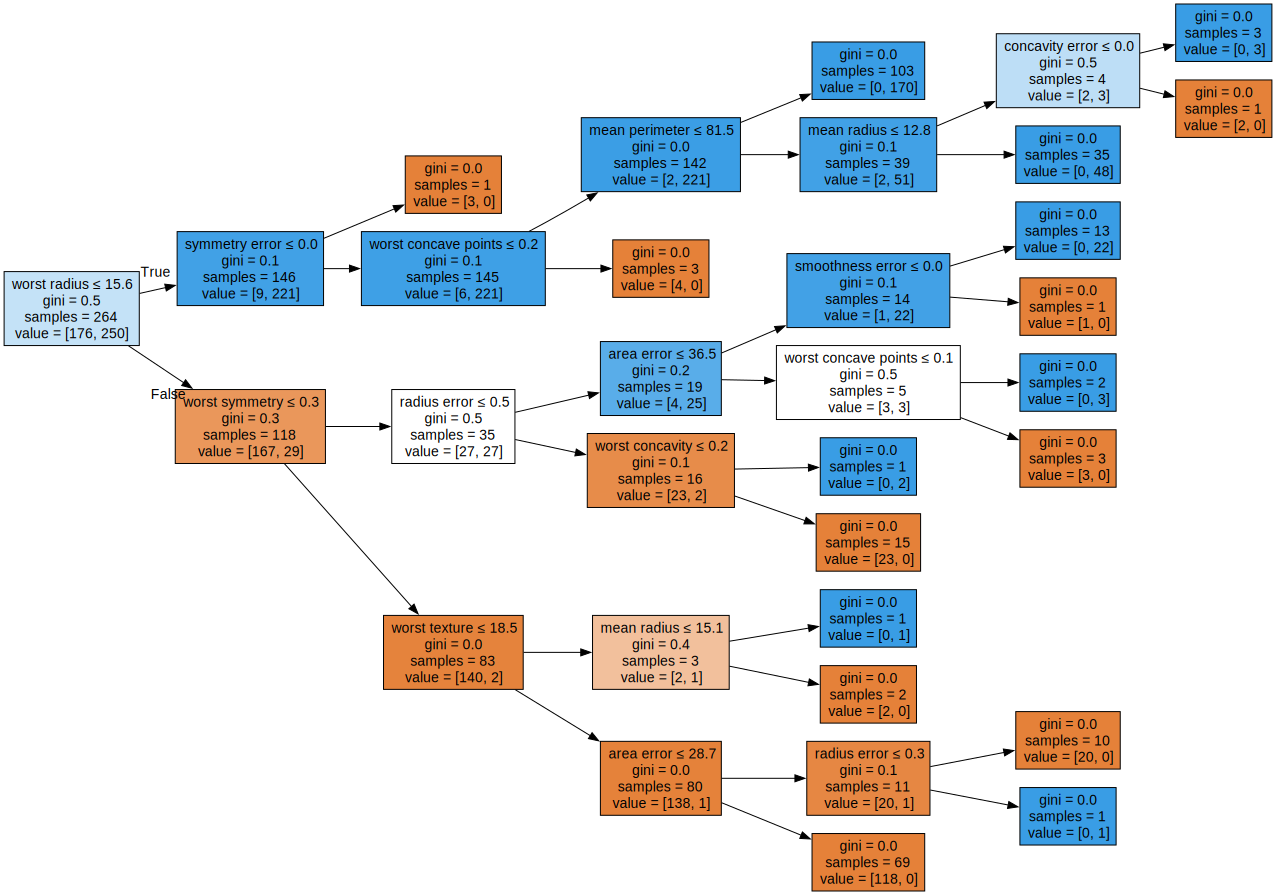

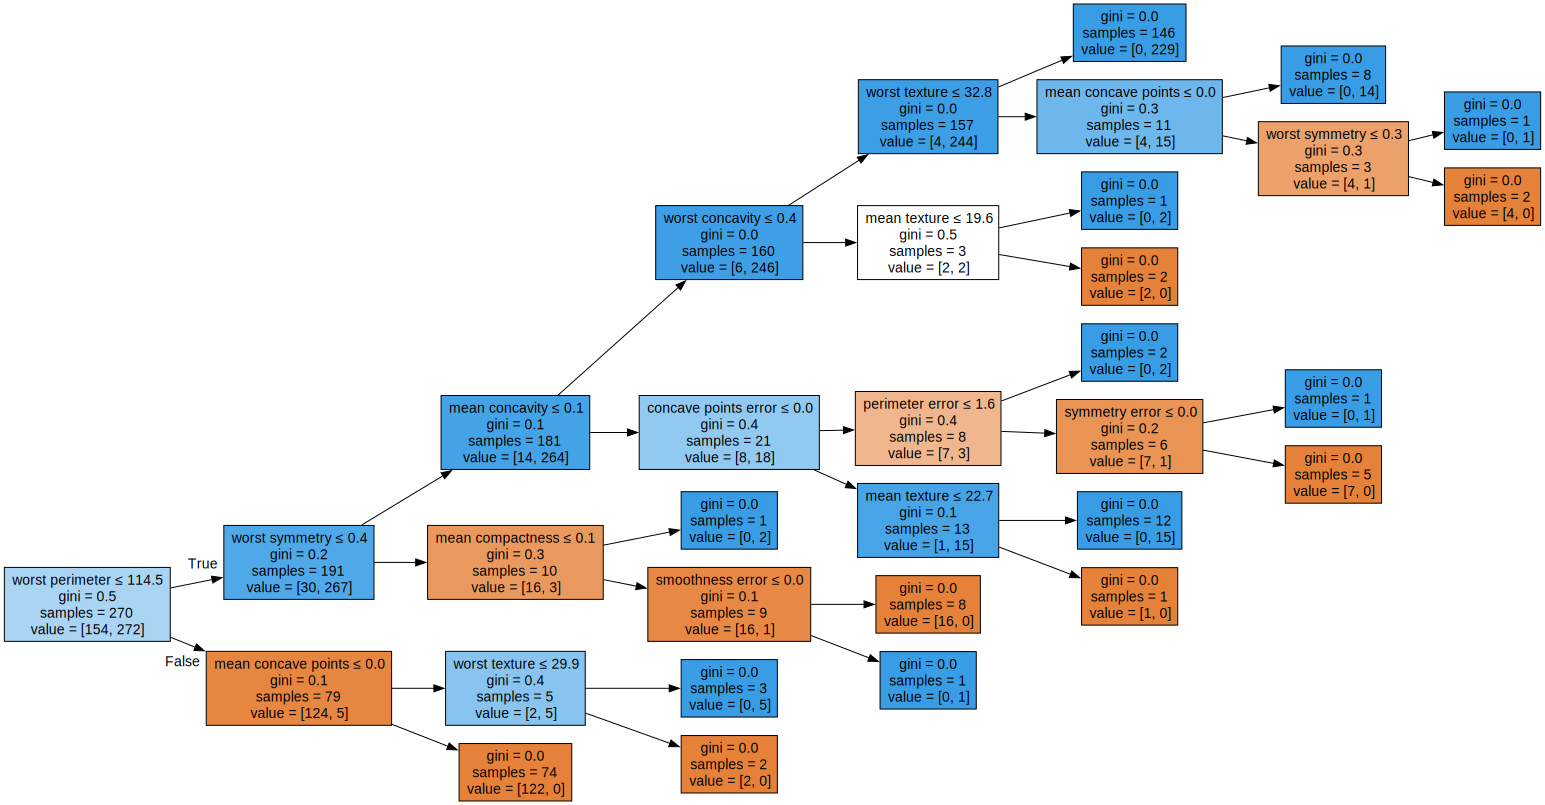

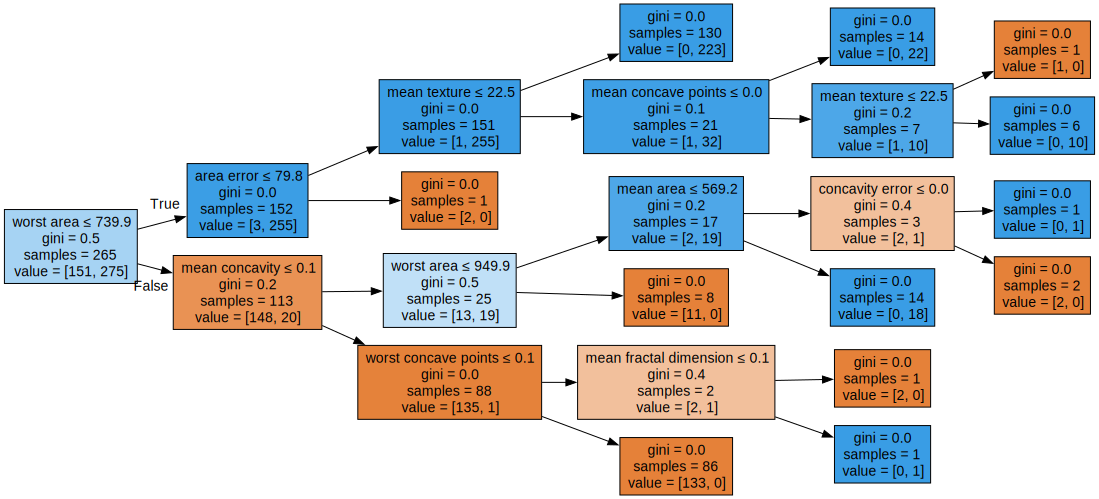

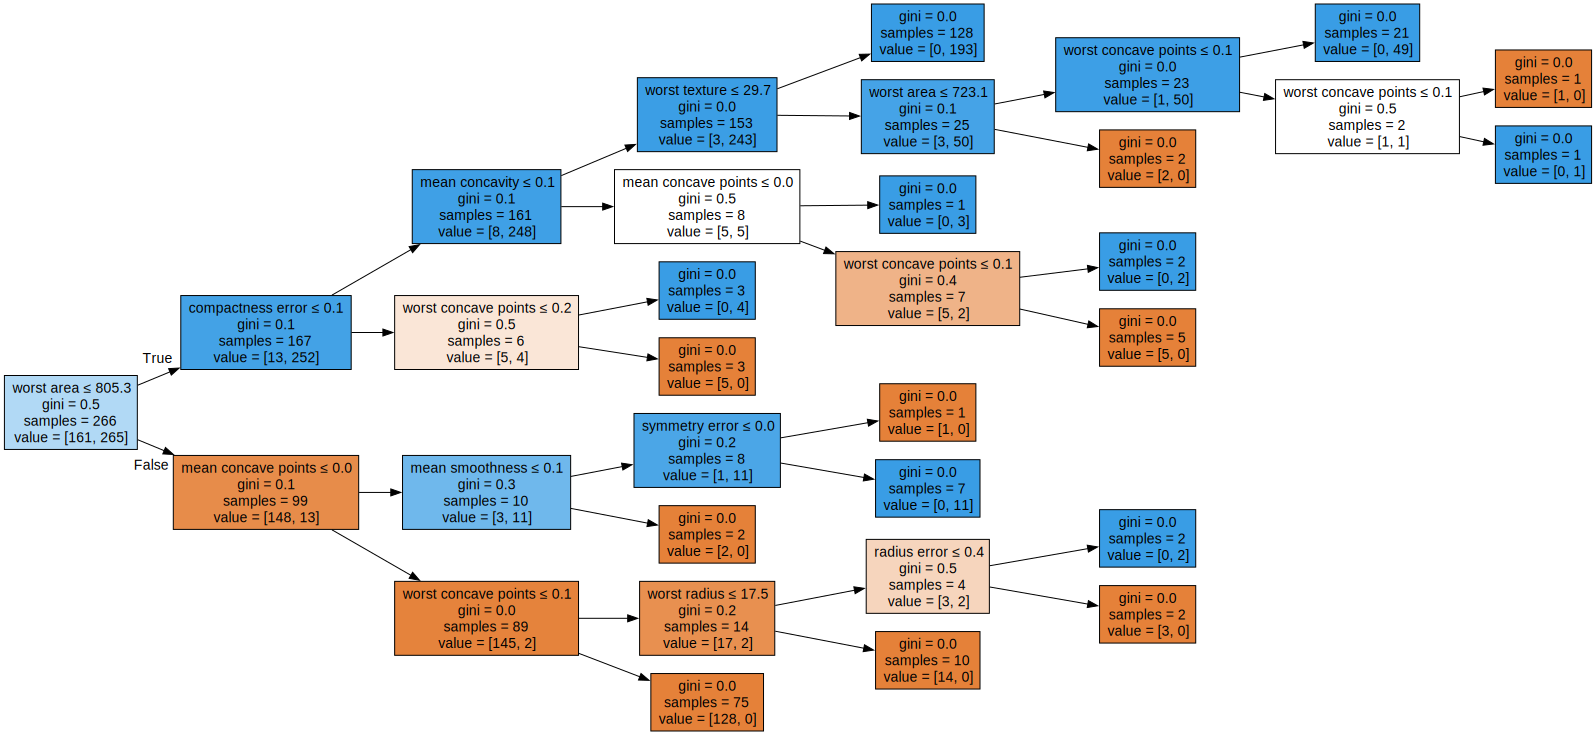

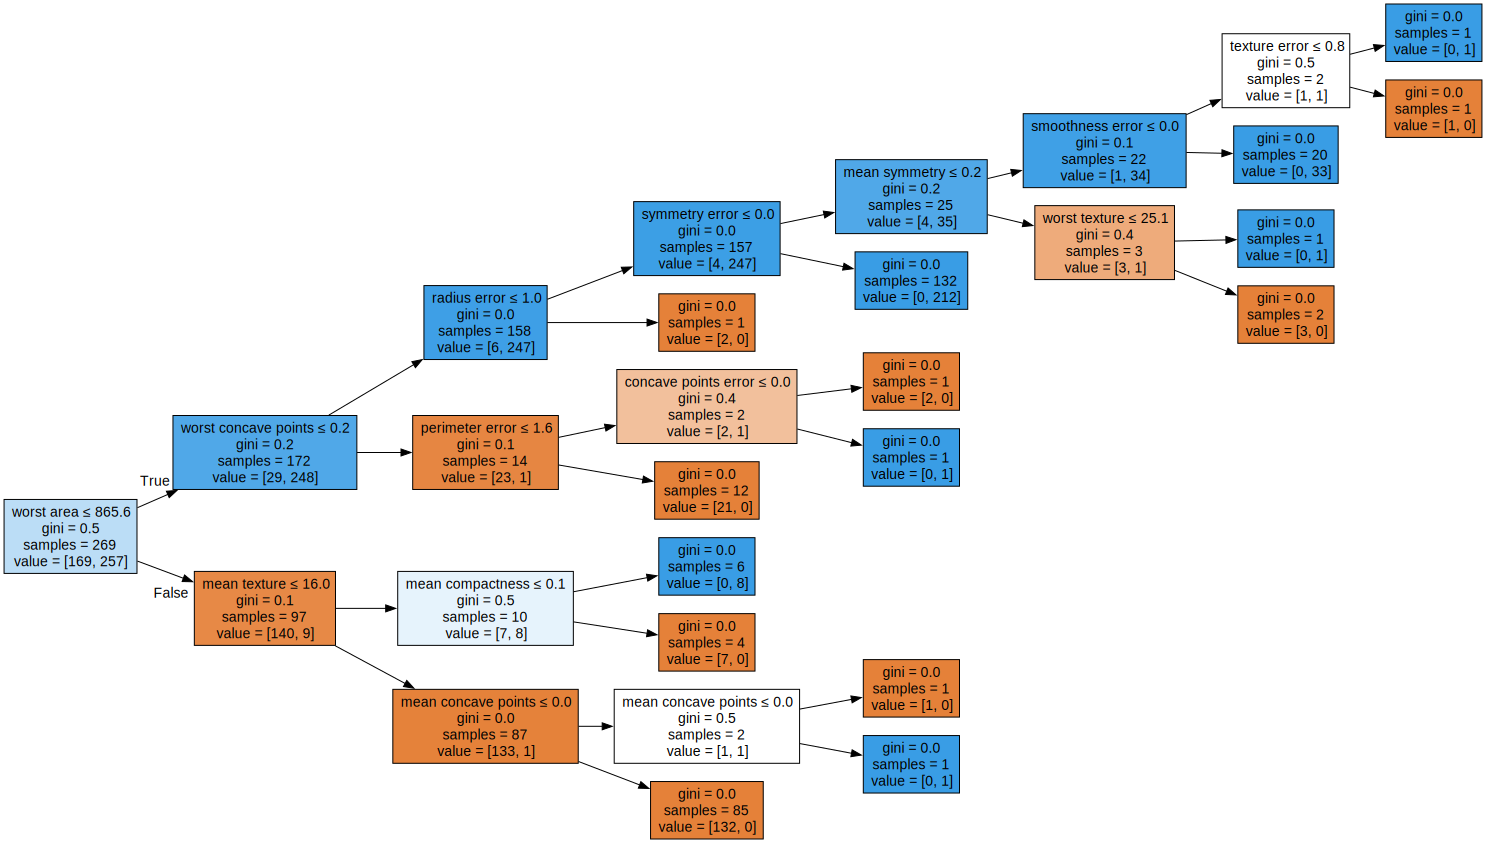

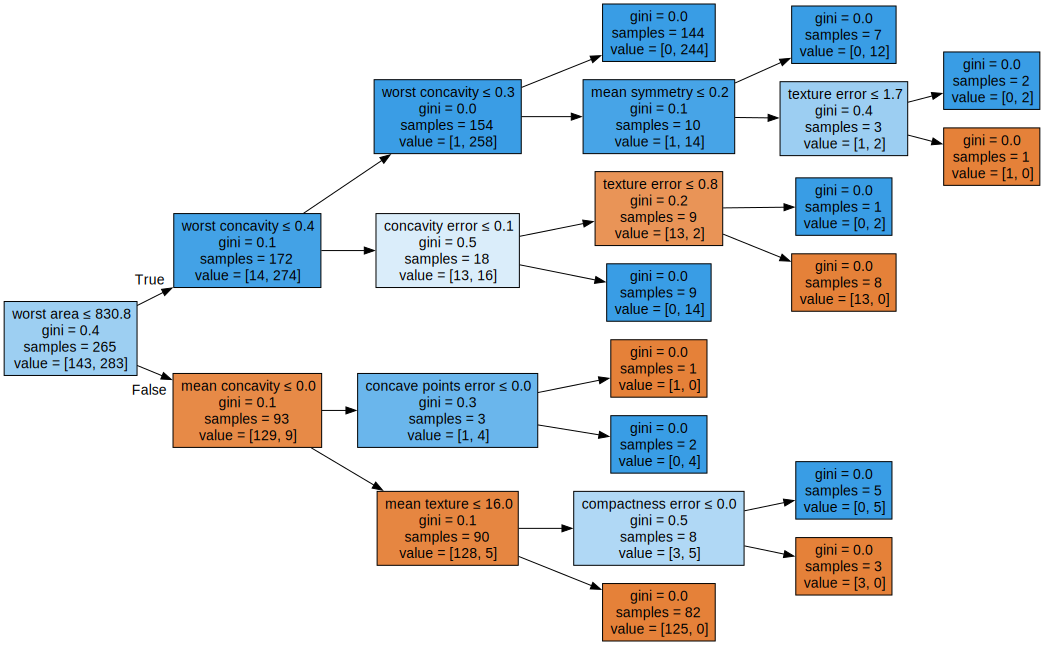

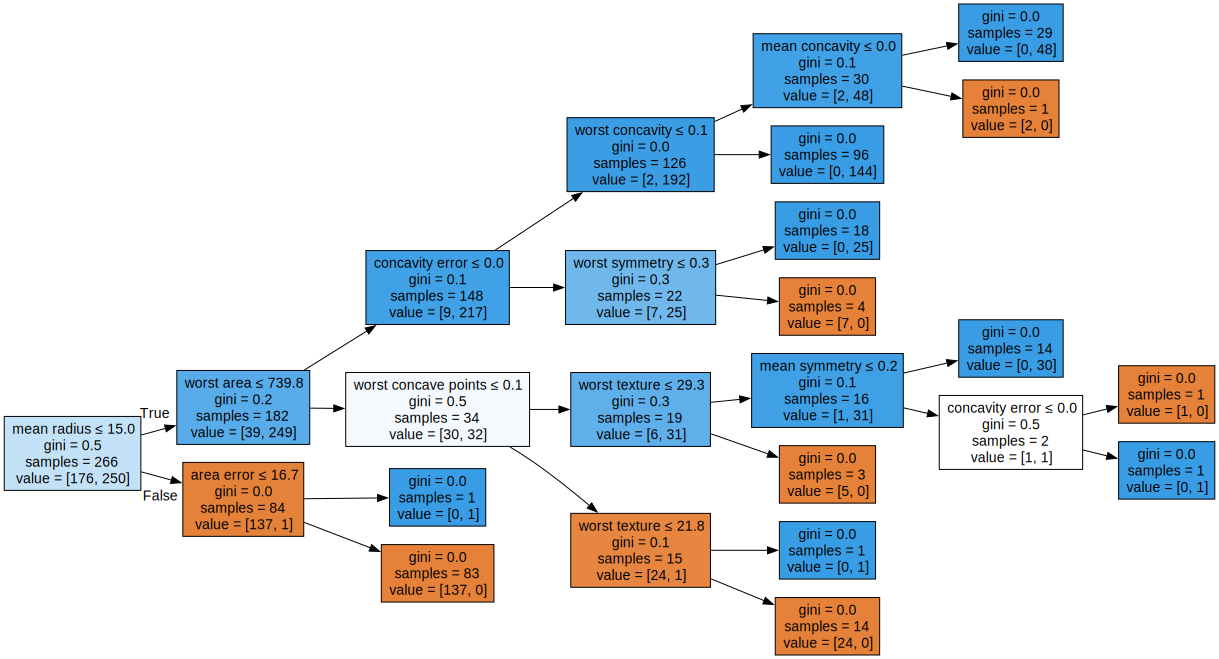

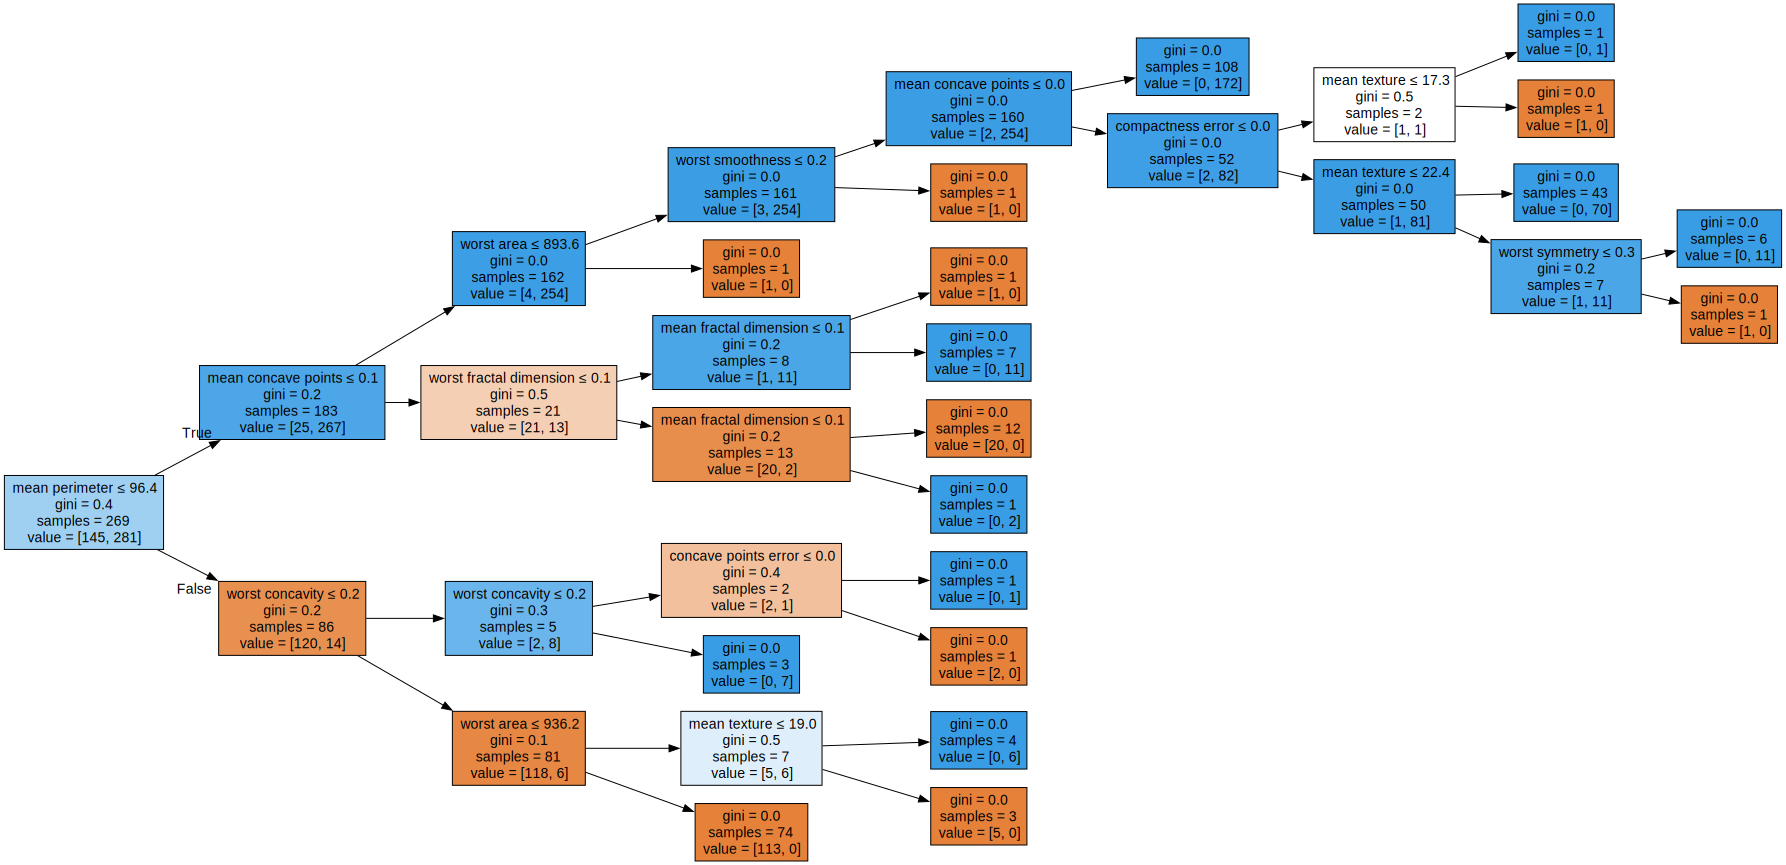

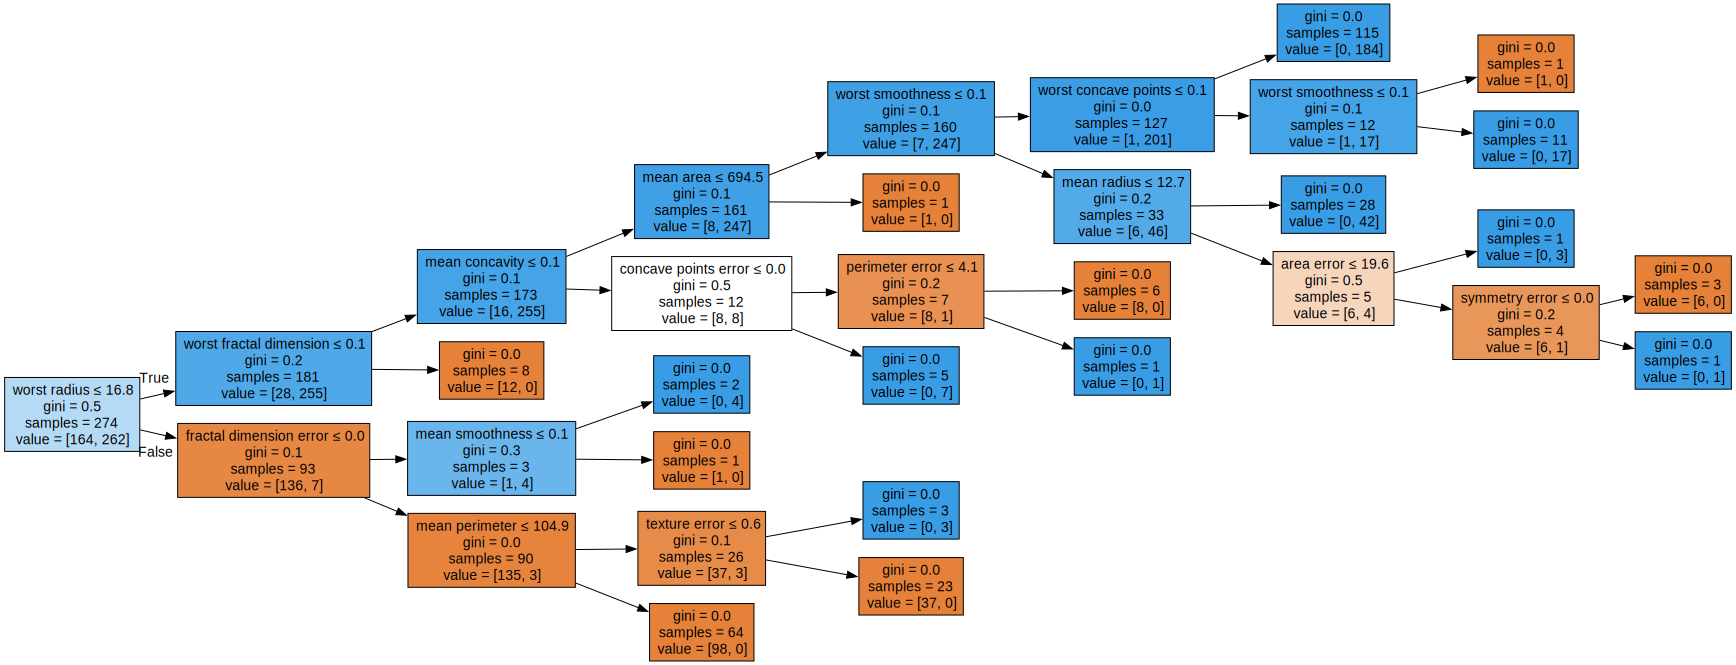

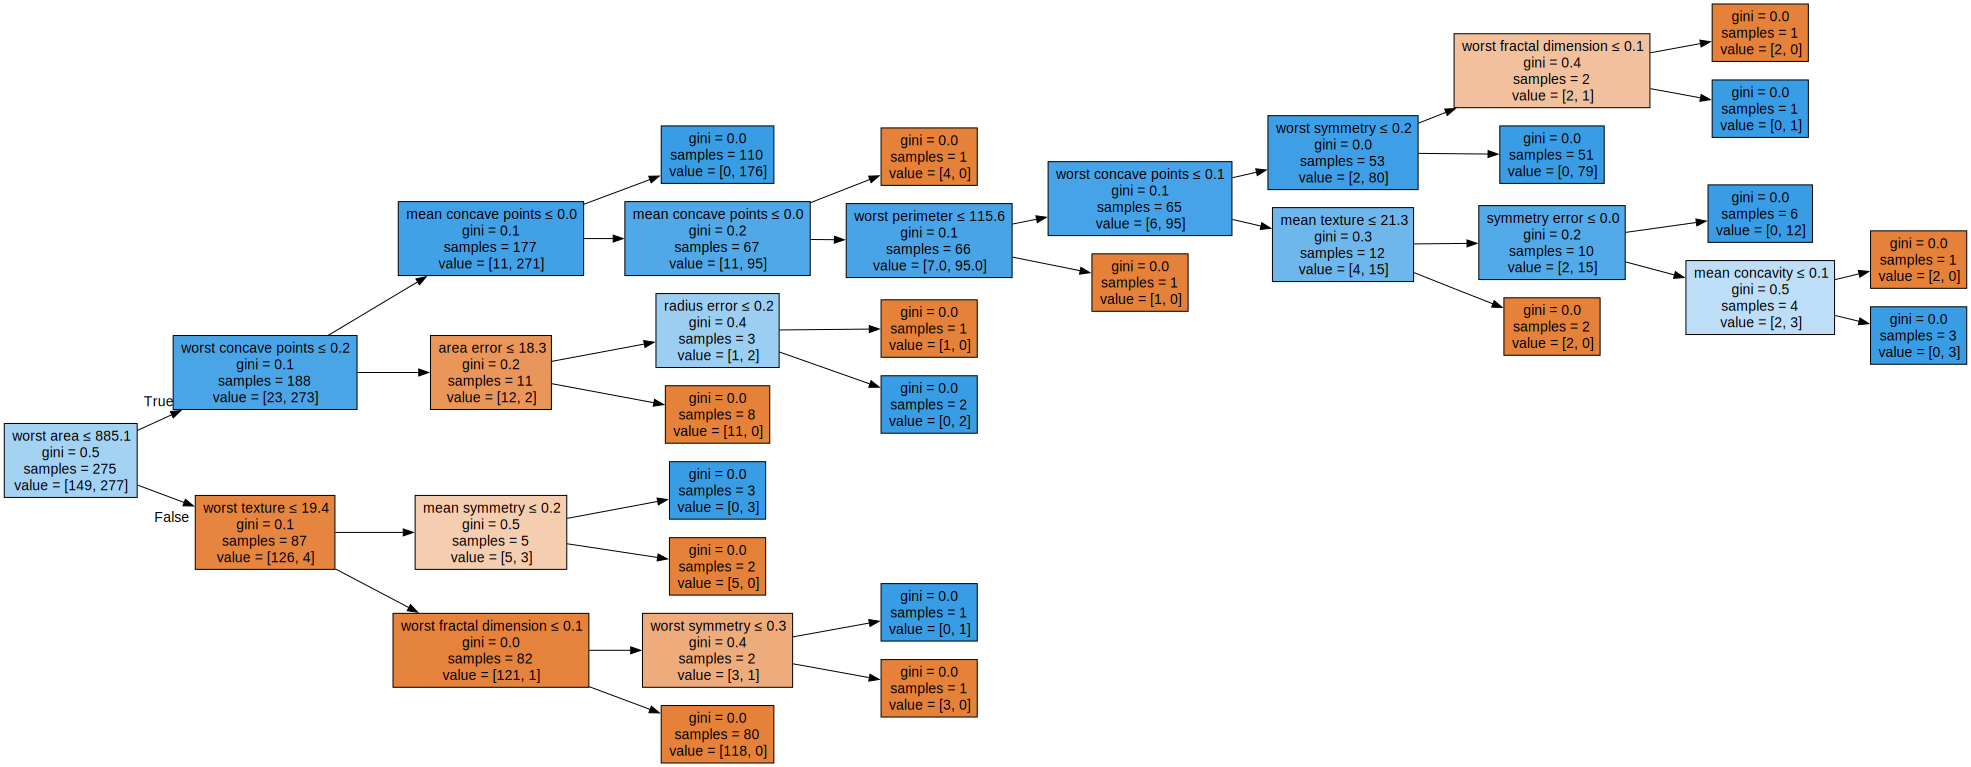

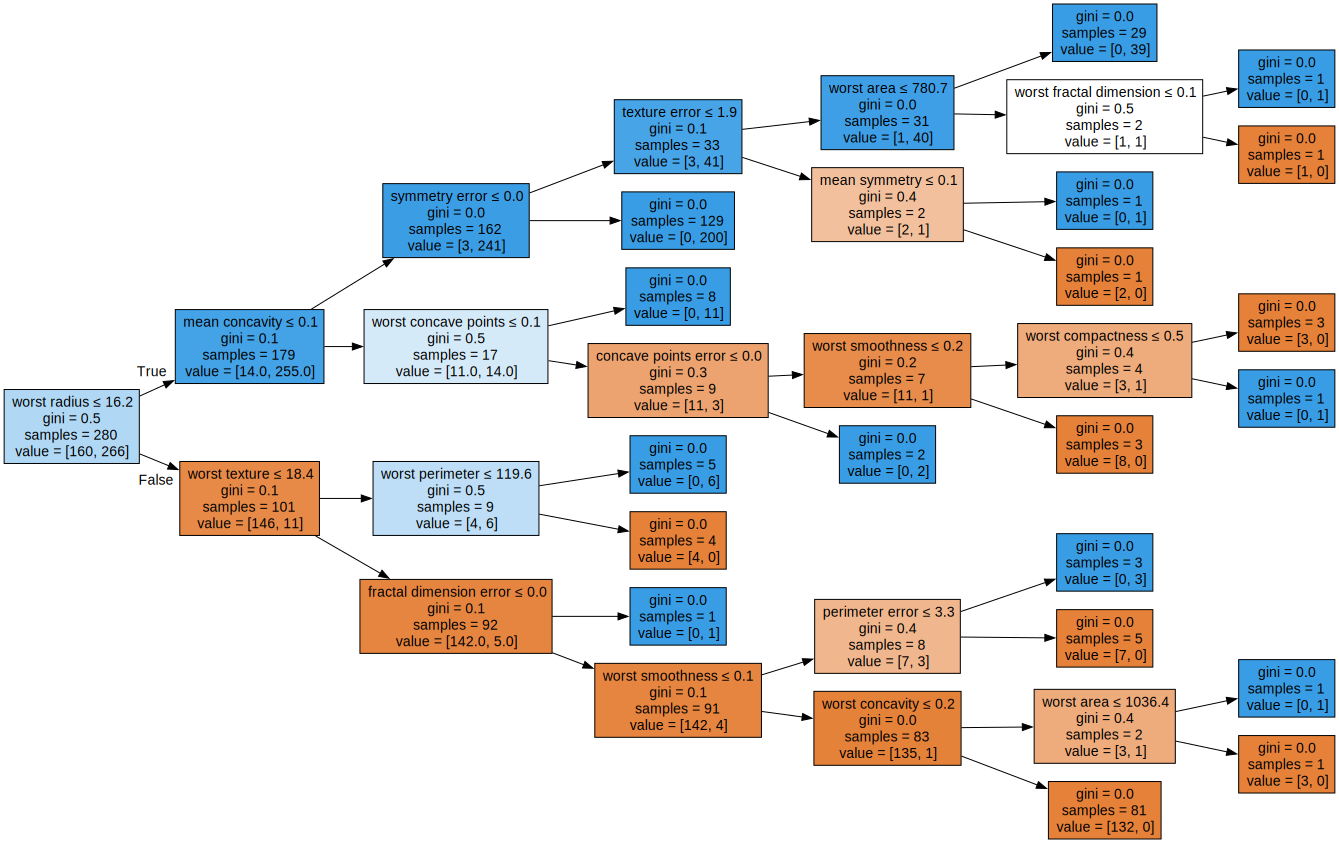

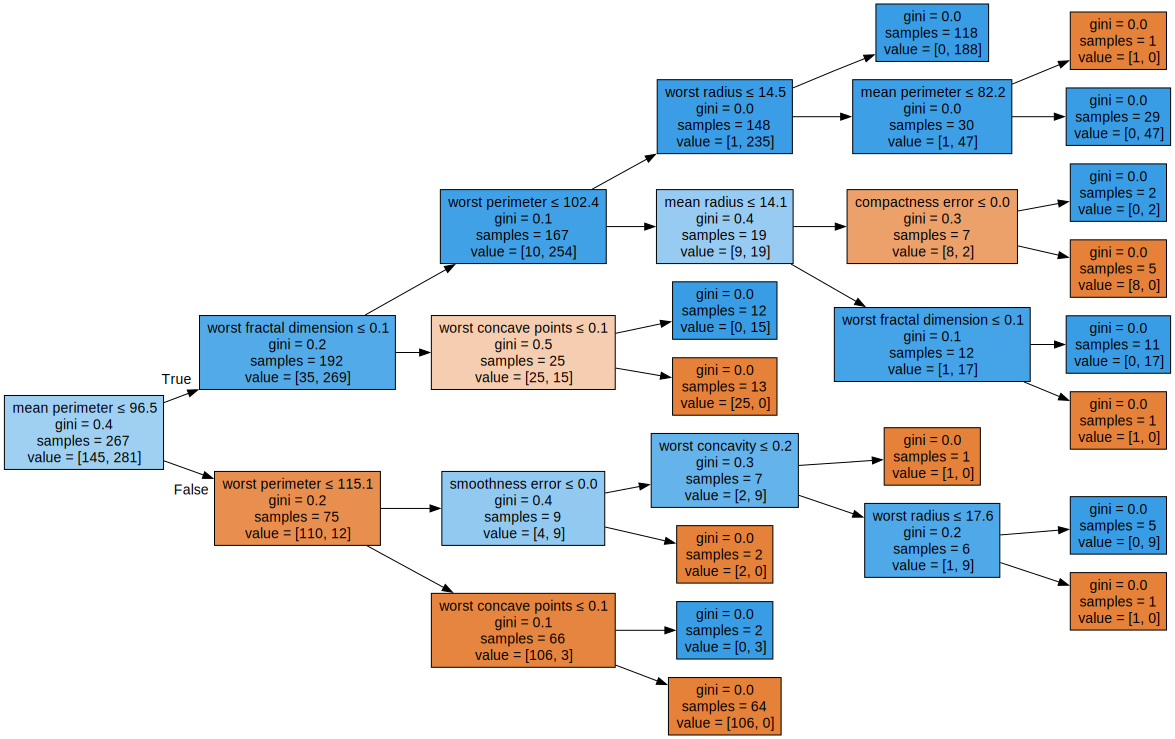

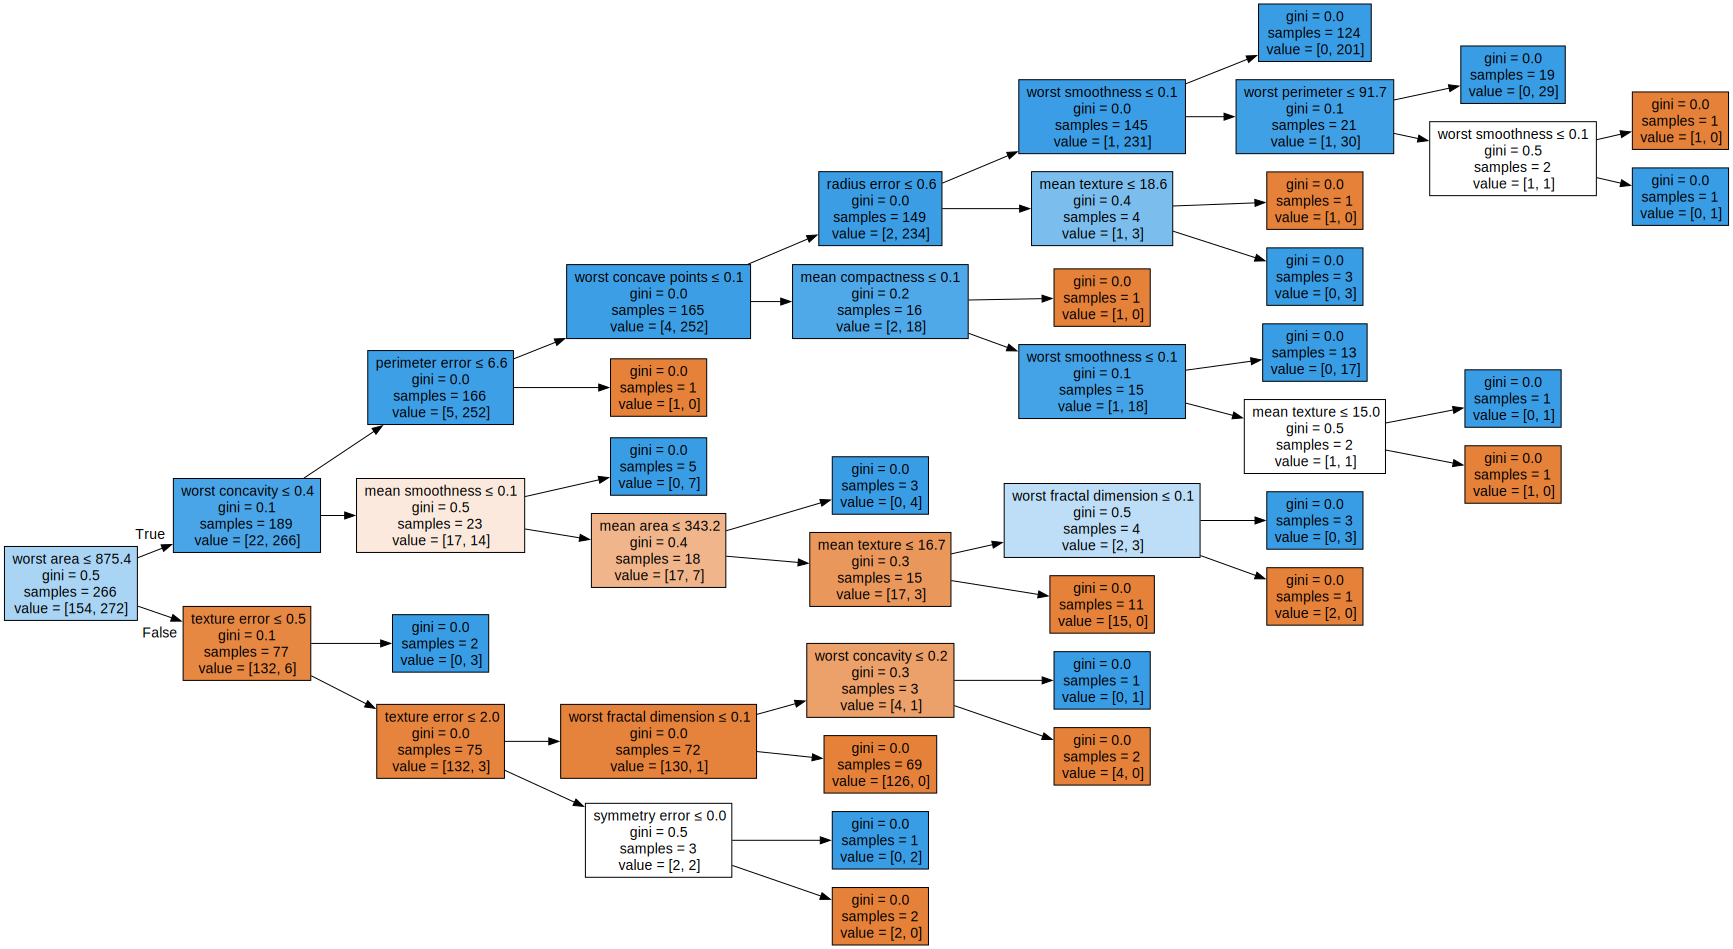

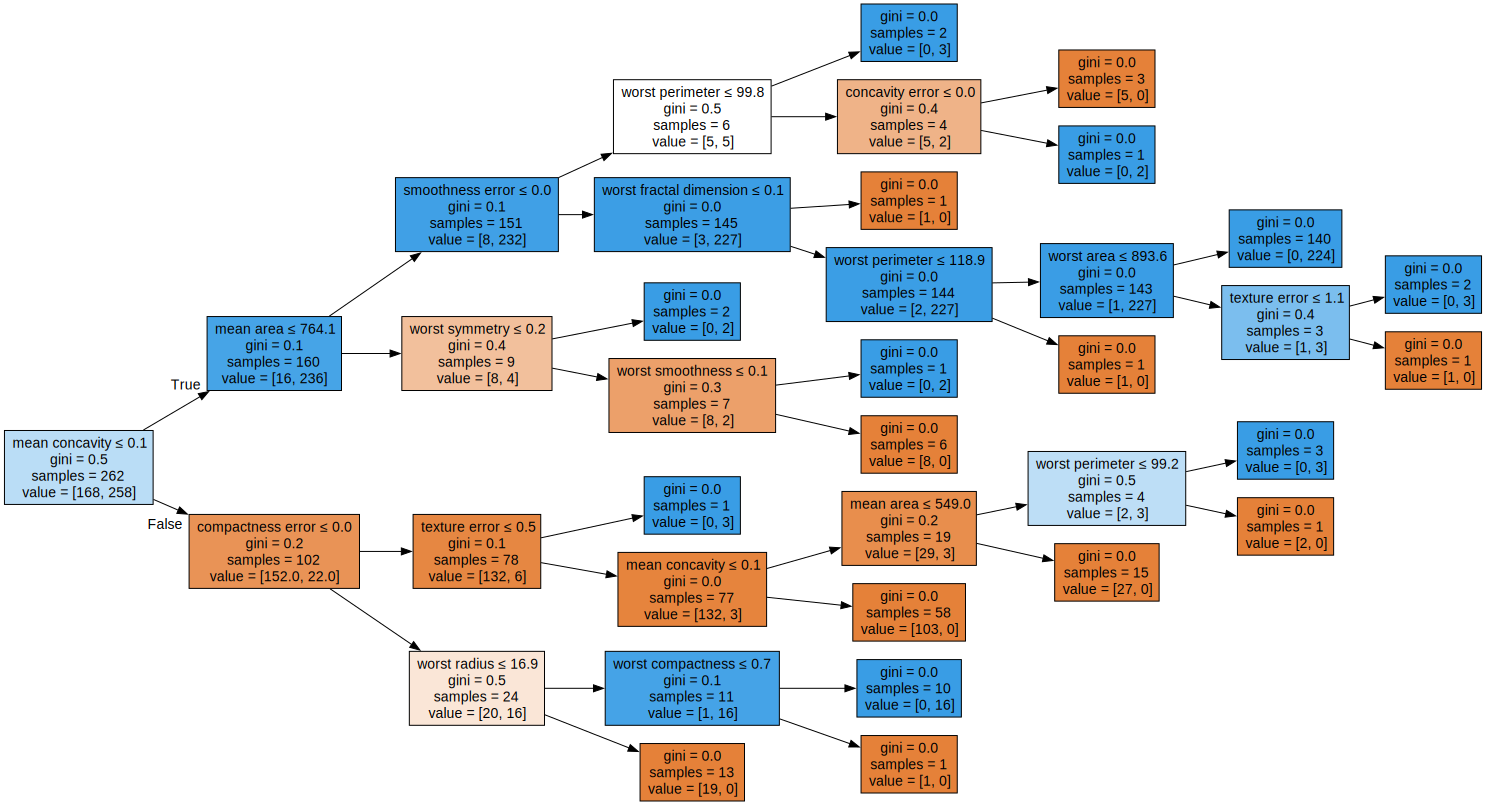

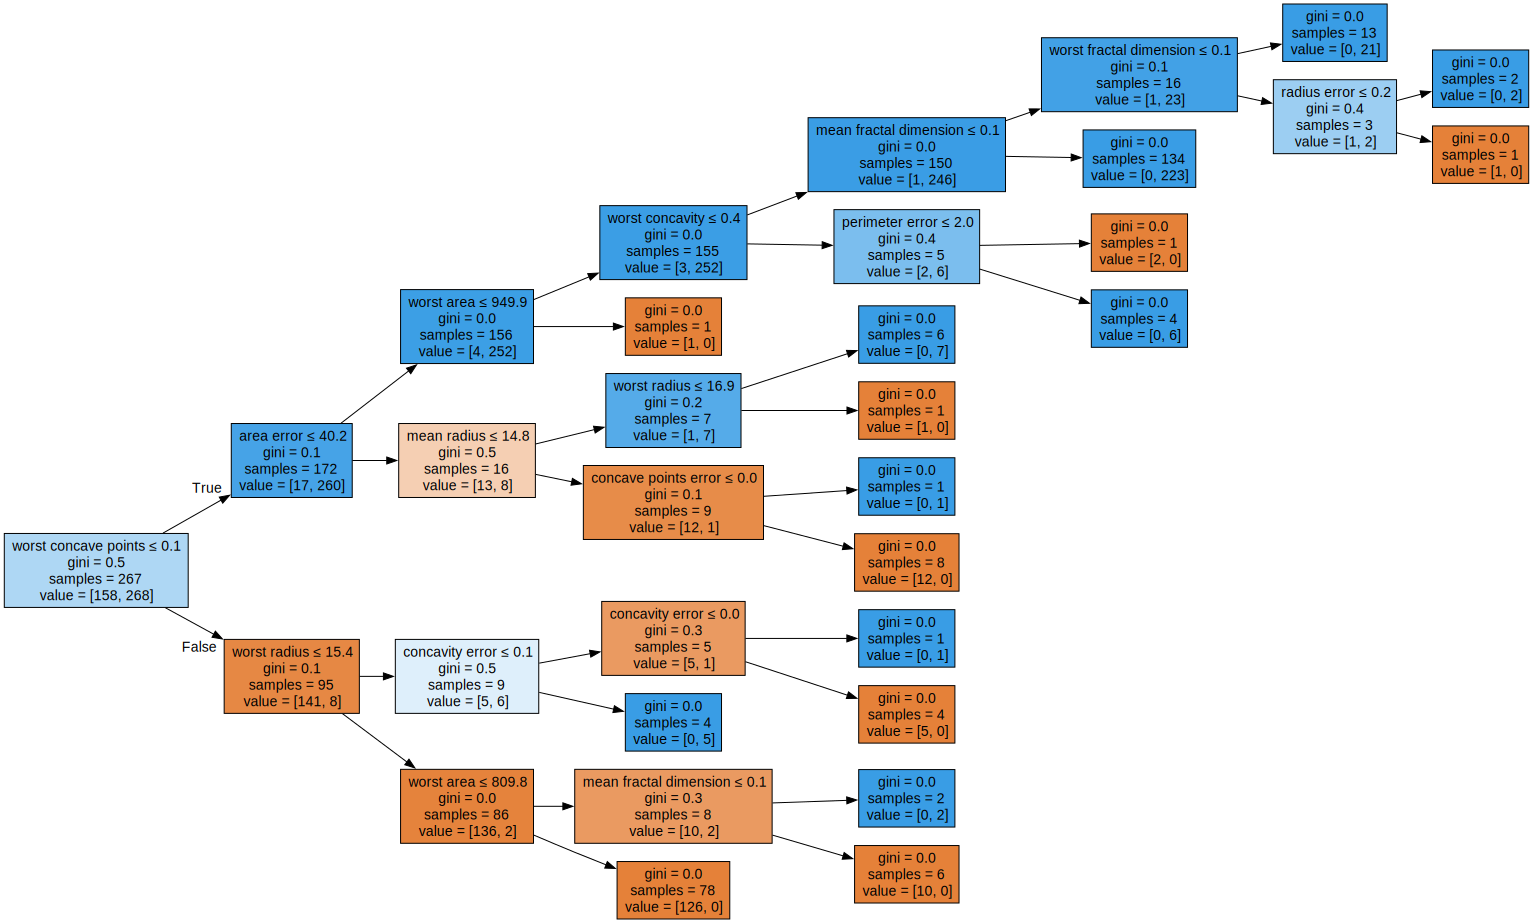

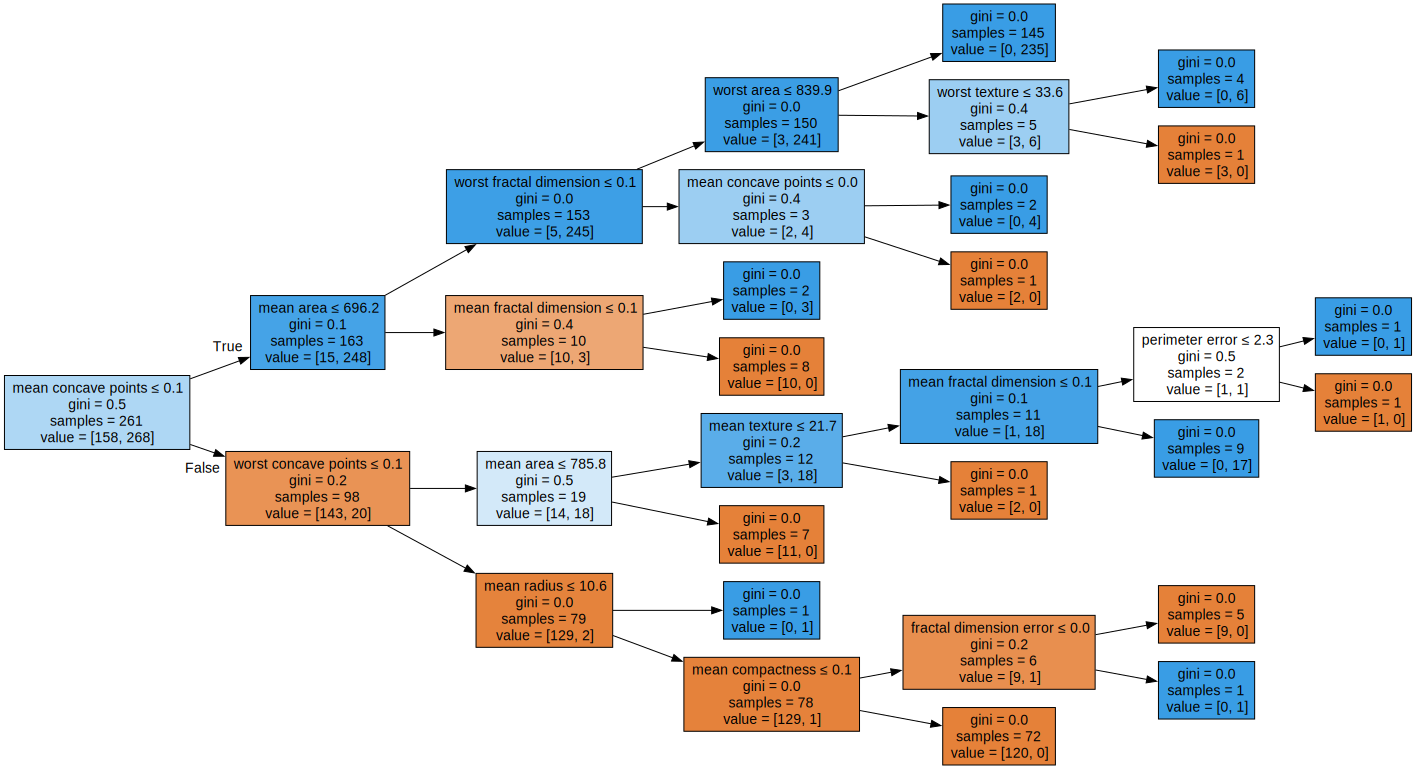

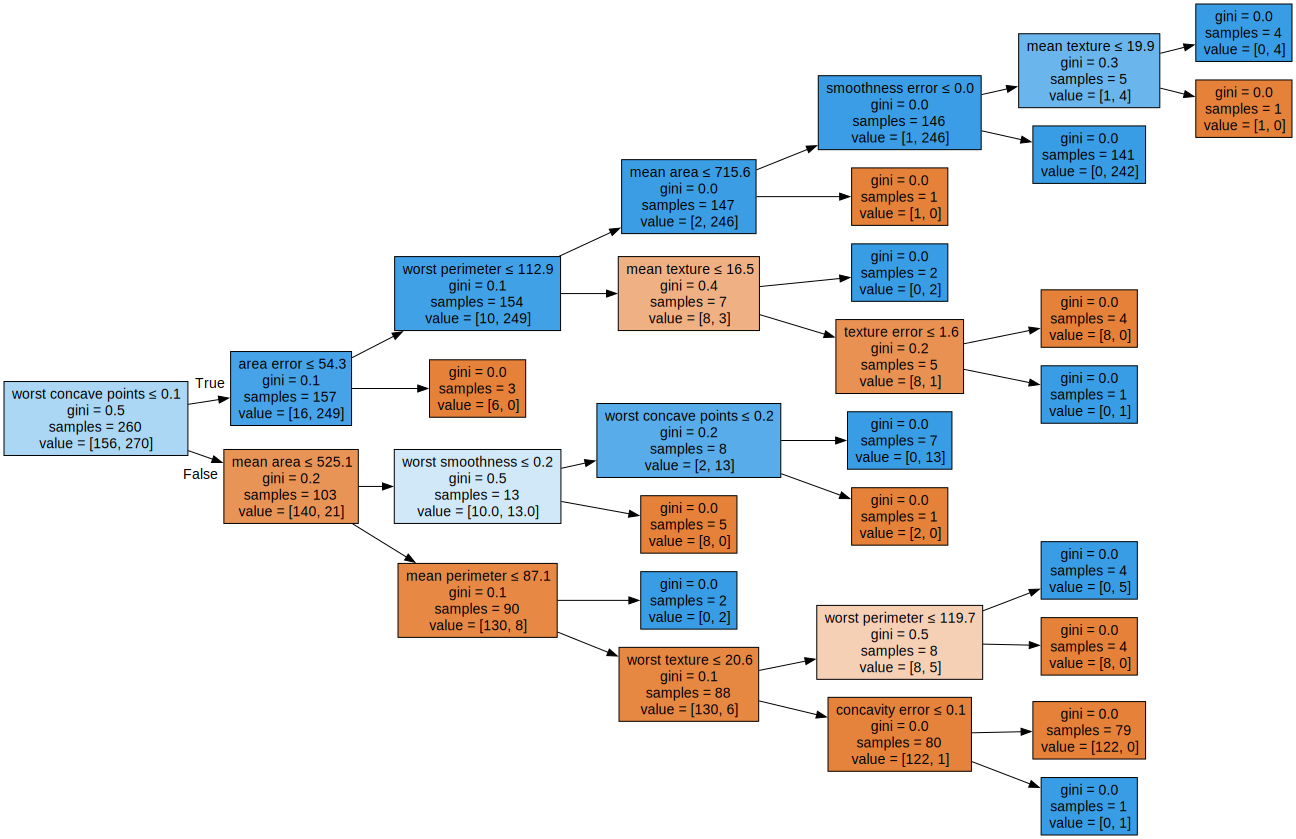

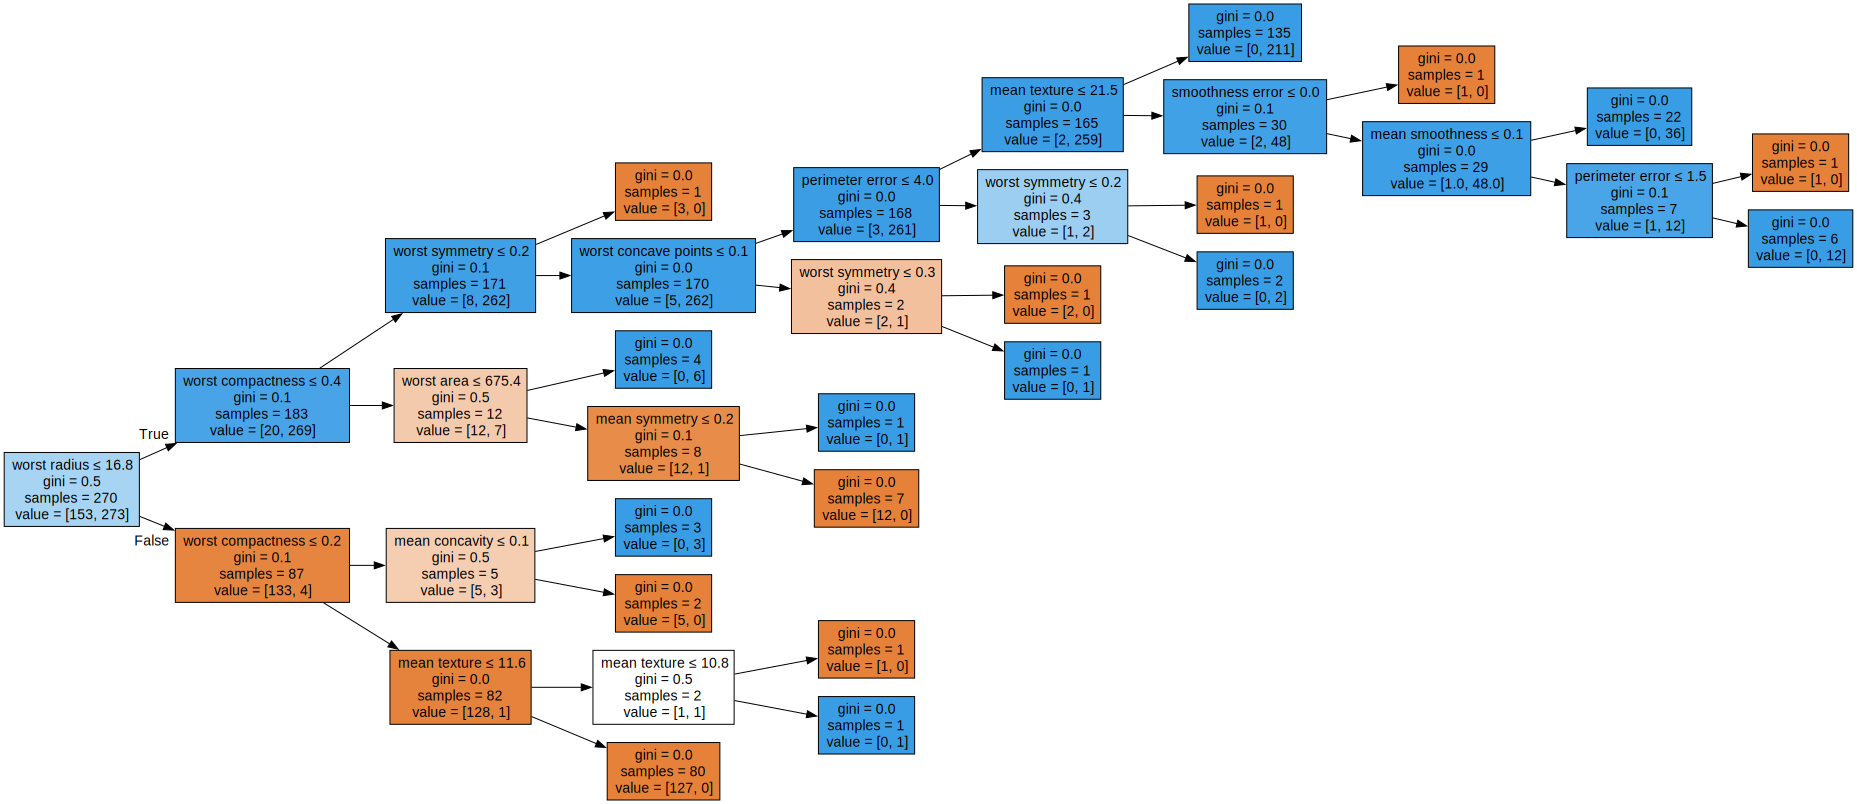

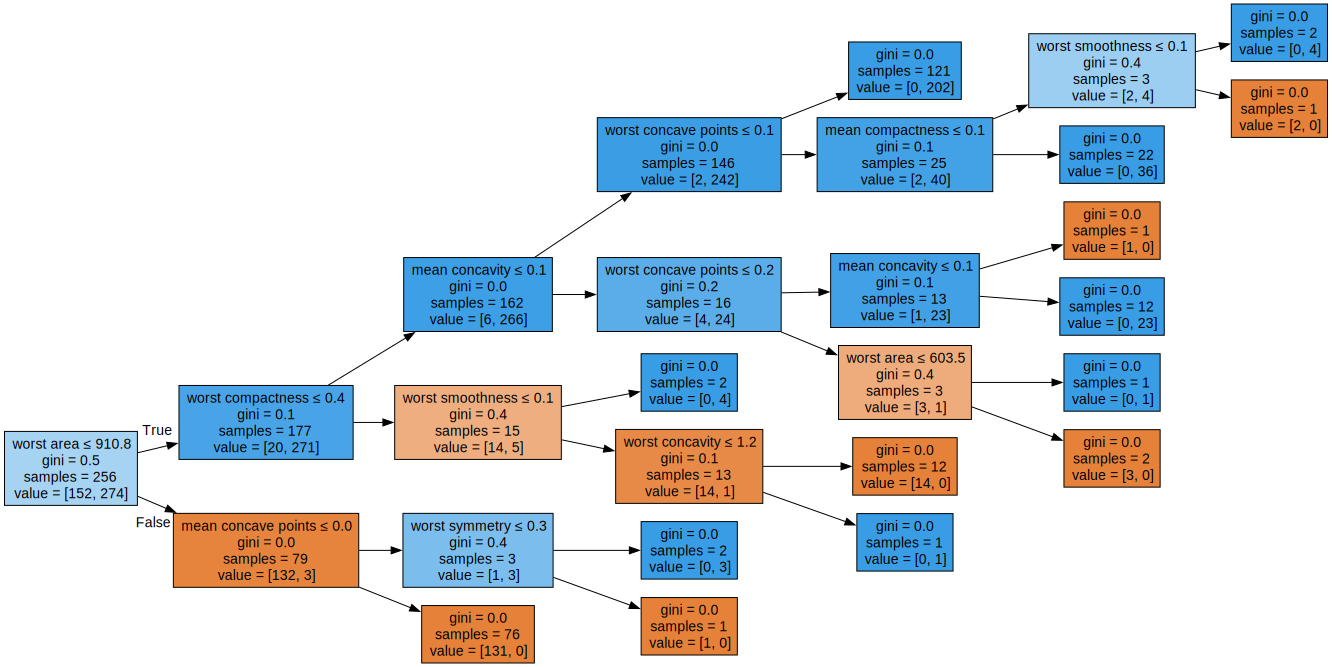

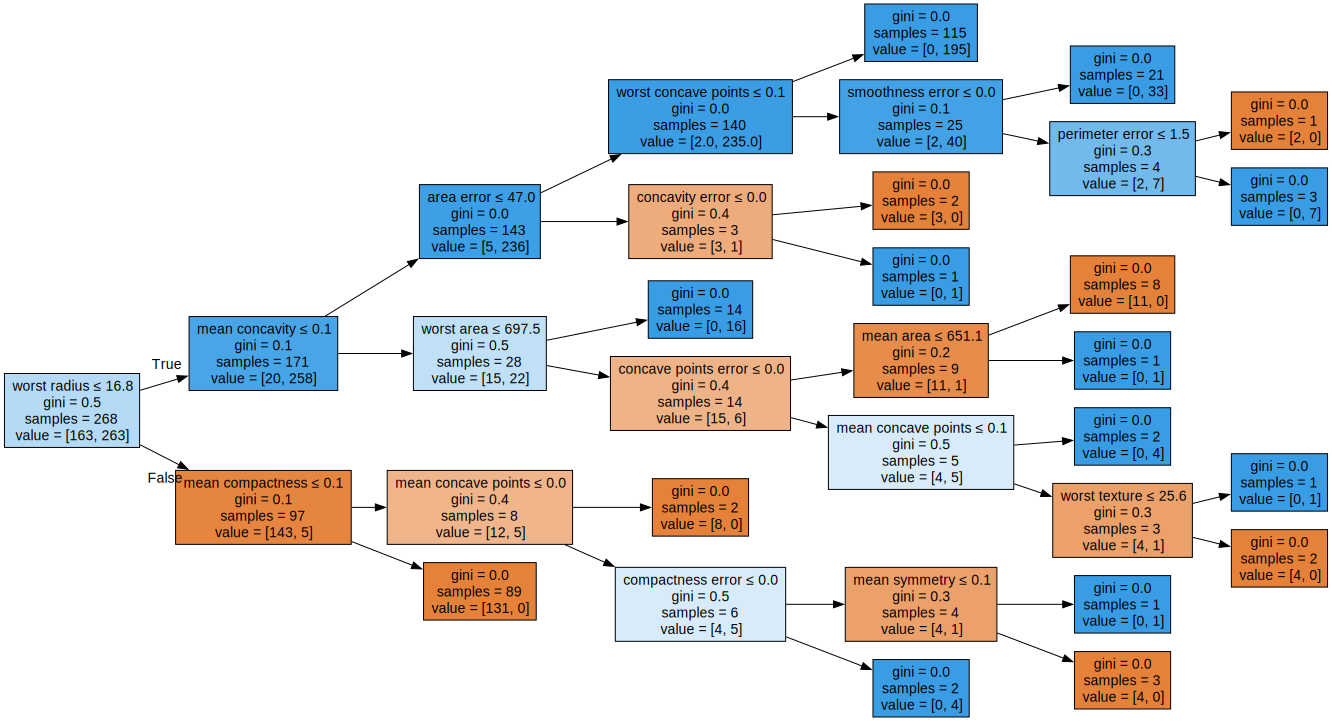

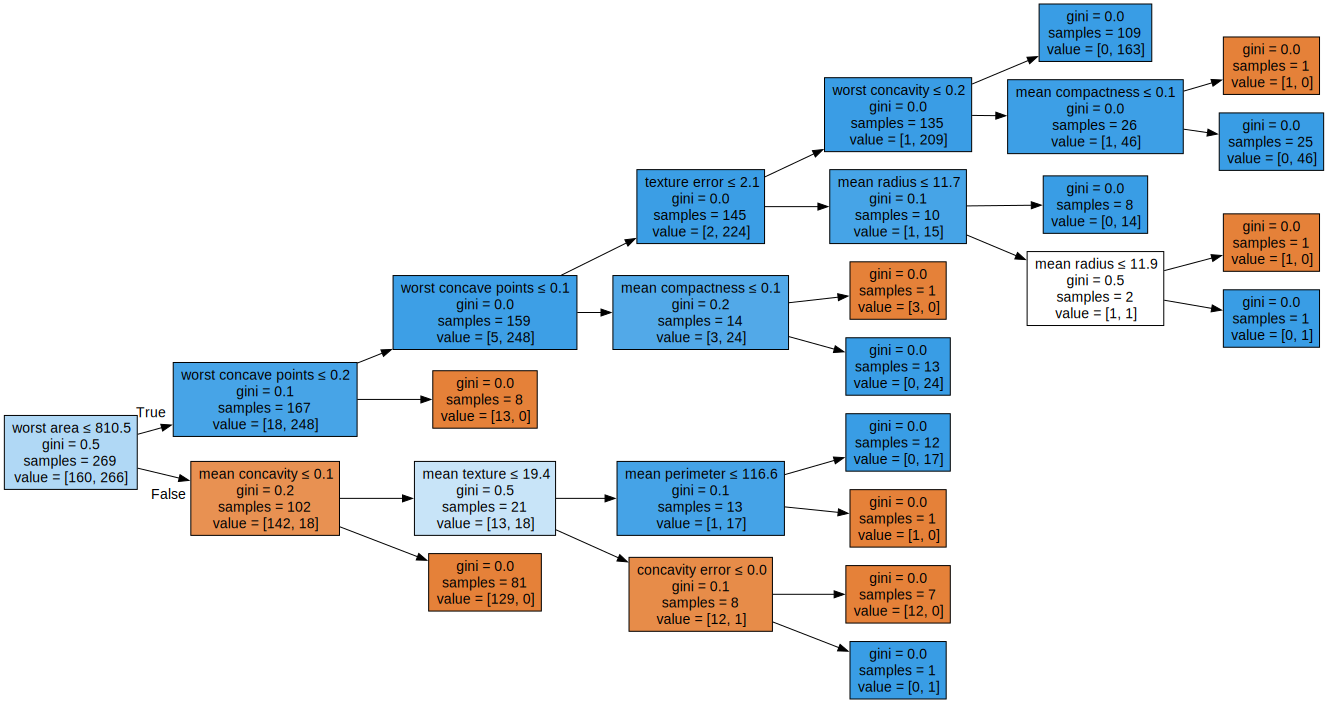

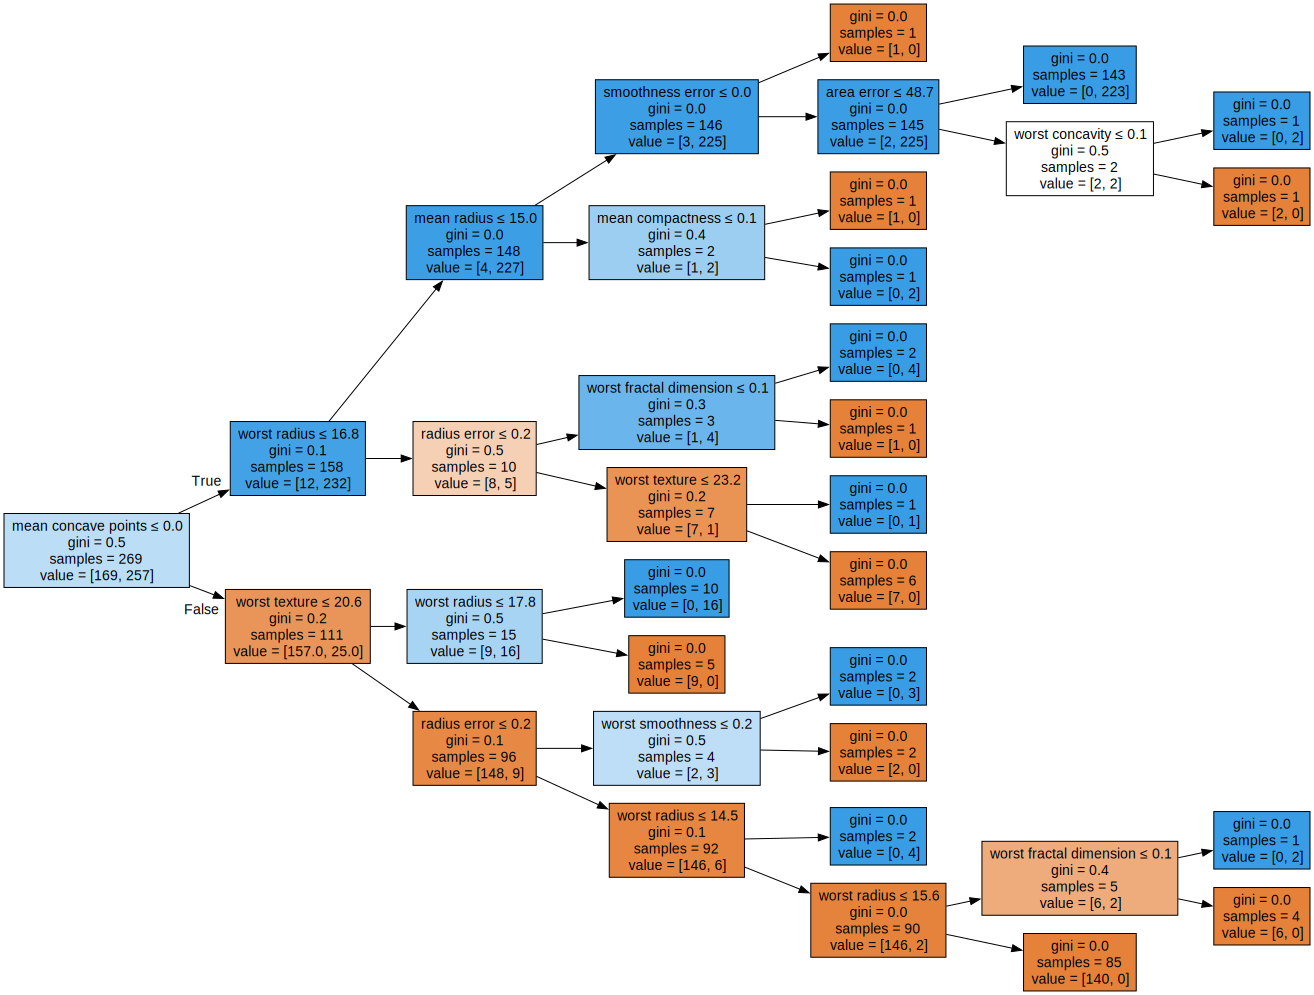

In [81]:
# 100개 다 그리려면 반복문으로, 필요없는 항목 변경
rfc.estimators_ # 리스트로 나옴

for tree in rfc.estimators_:
    export_tree = export_graphviz(tree, 
                                  out_file=None, 
                                  feature_names=cancer.feature_names,
                                  special_characters=True,
                                  rotate=True,
                                  precision=1, 
                                  filled=True)
    display(graphviz.Source(export_tree))

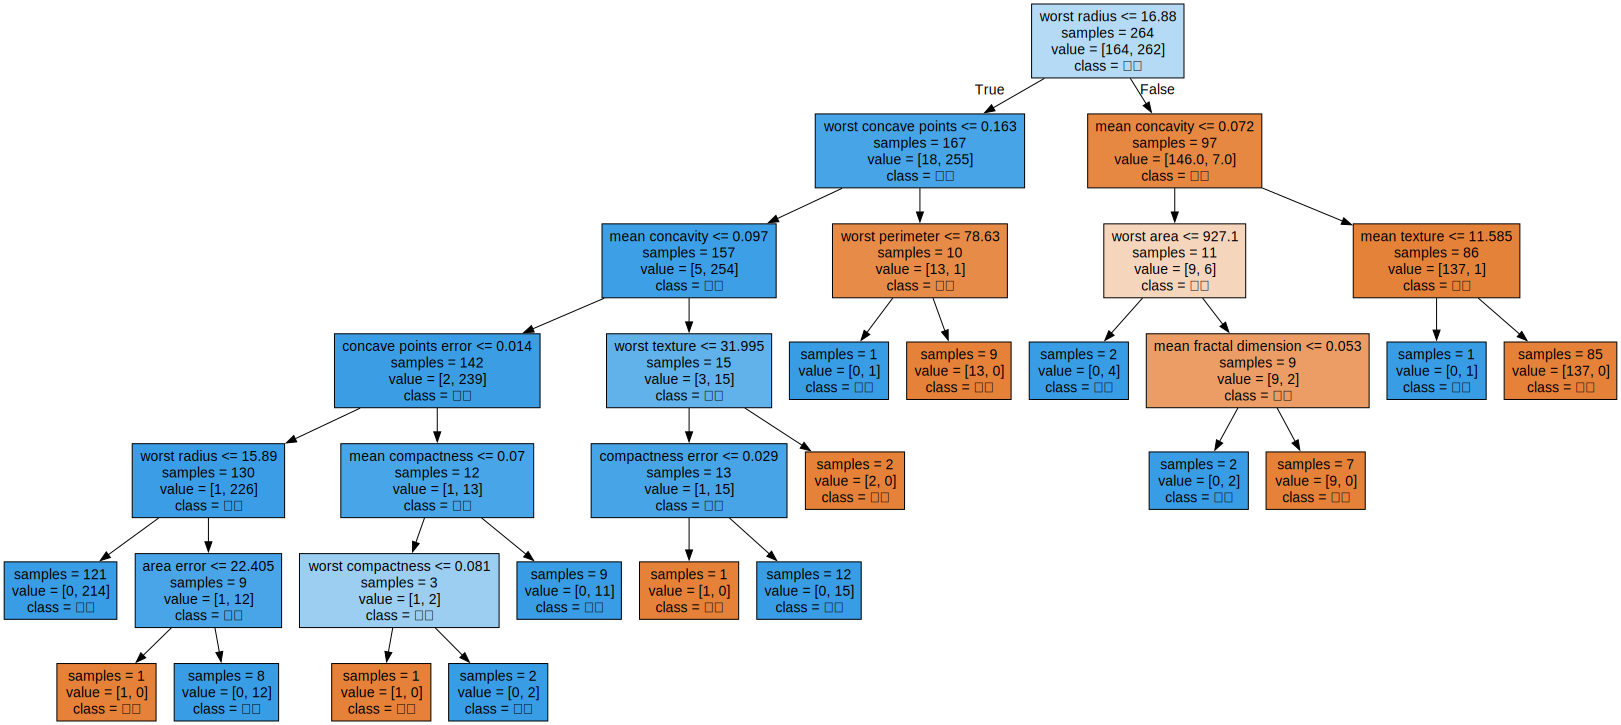

In [82]:
import graphviz

try:
    with open("forest.dot", encoding='utf-8') as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))
except UnicodeDecodeError as e:
    print("UnicodeDecodeError:", e)

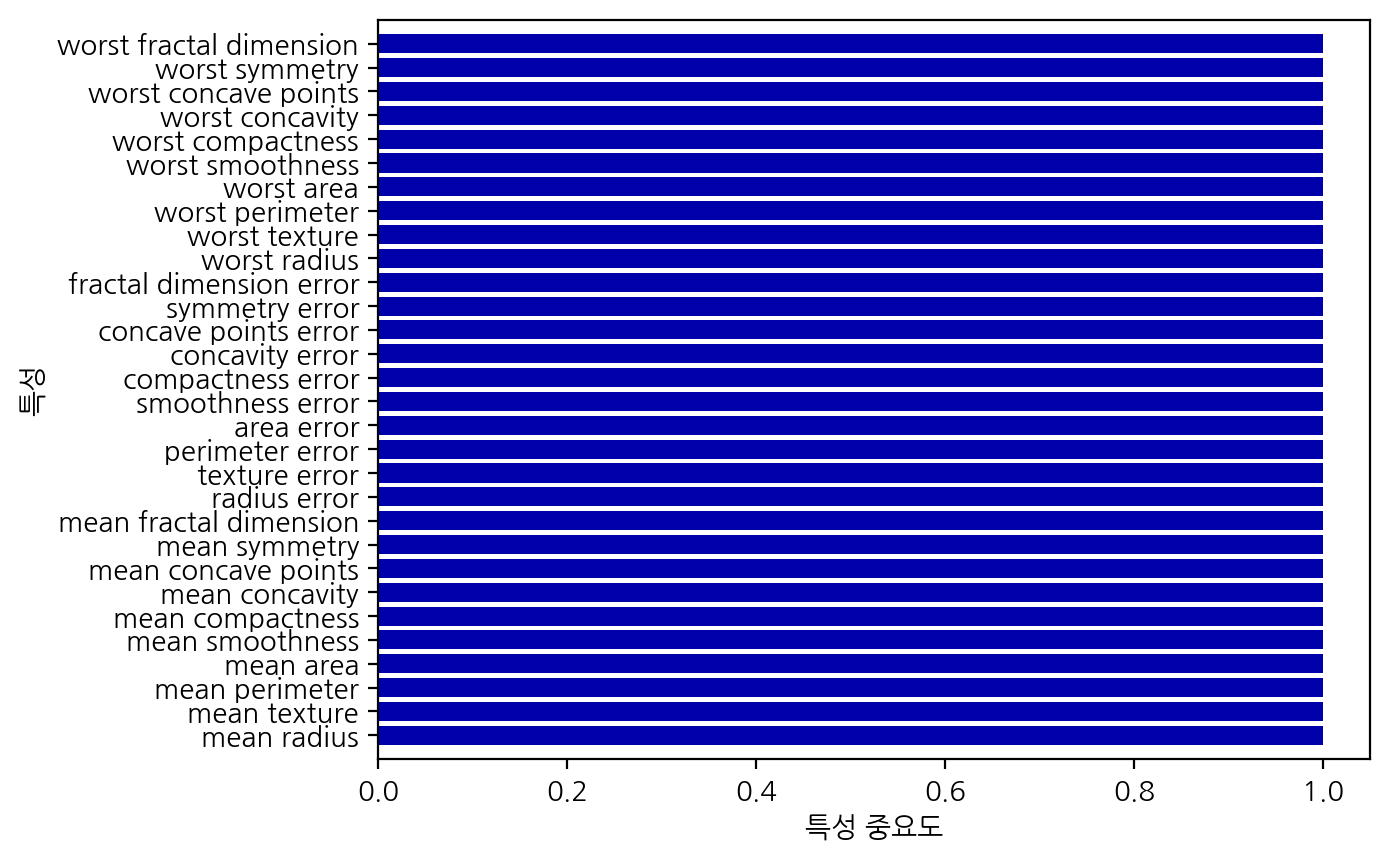

In [83]:
plot_feat_importances(forest)
# 데이터 민감도는 낮아짐 but 균질하게 나오는 경우 많음

# 예제

In [84]:
%config InlineBackend.figure_format = 'retina' # 더 선명하게 표현하도록

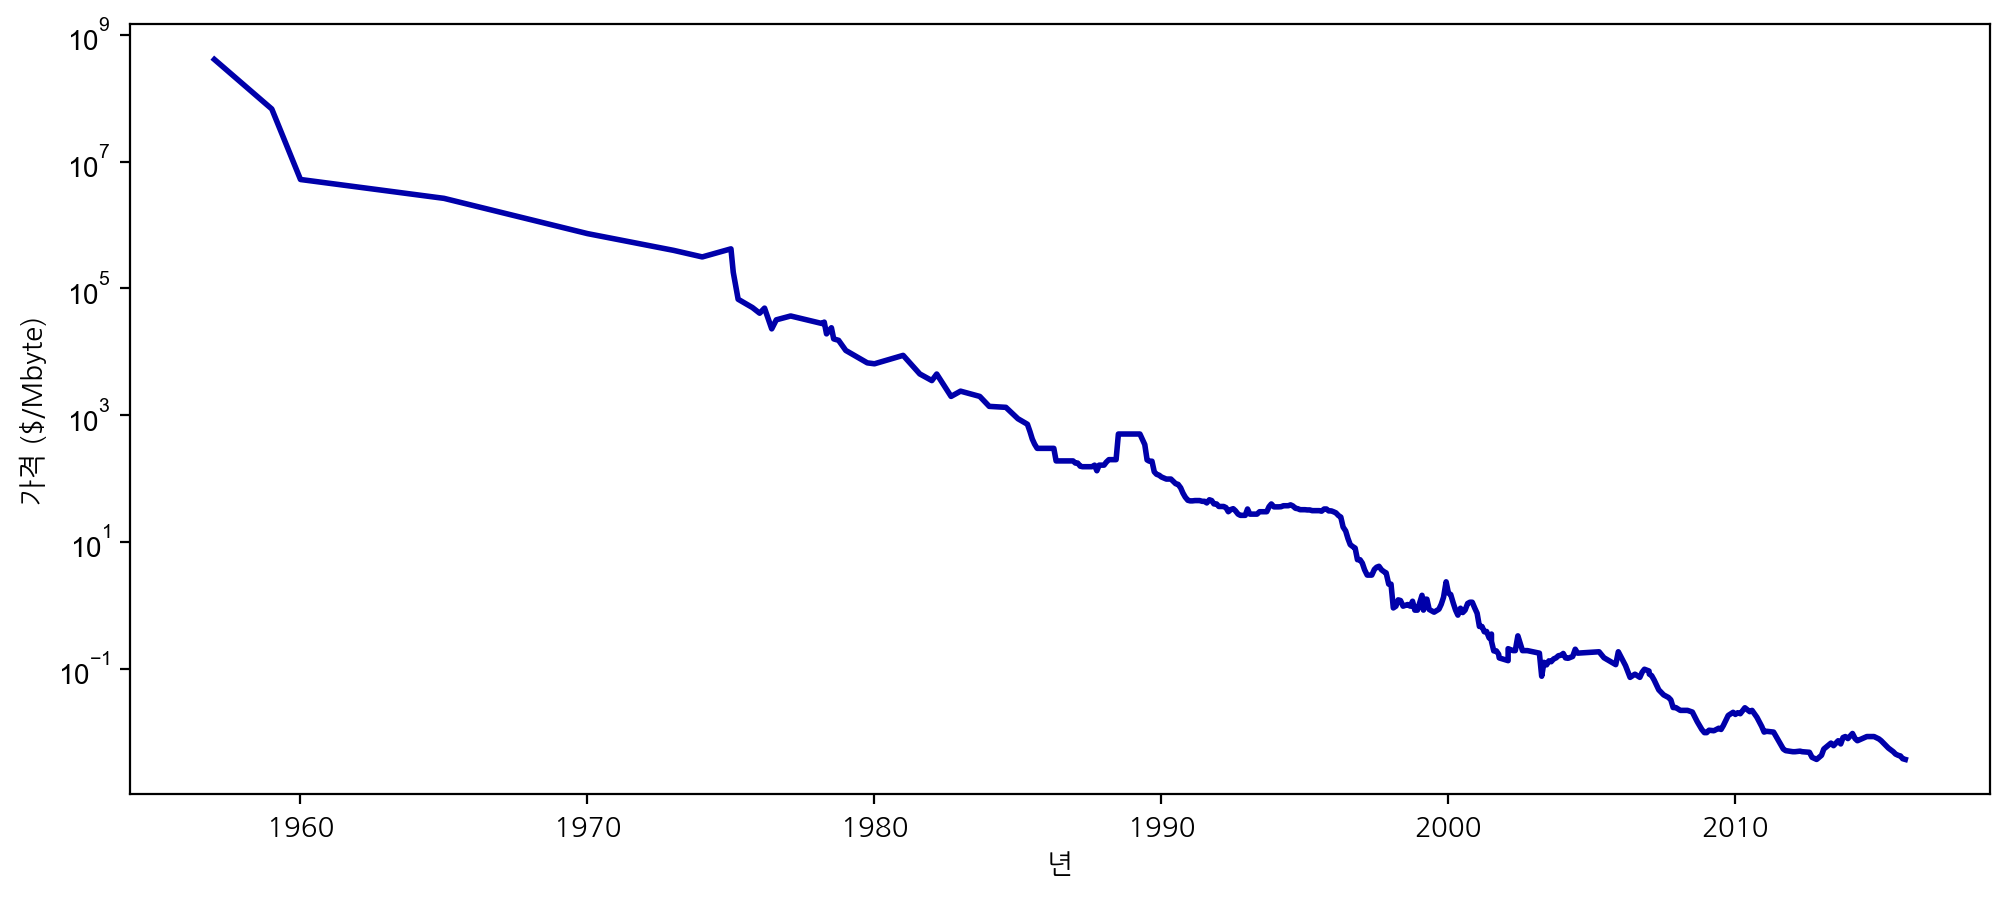

In [85]:
import os
ram_prices = pd.read_csv("data/ram_price.csv")
plt.figure(figsize=(12,5)) # 전체 틀 크기
plt.yticks(fontname = "Arial") # 폰트경고 안뜸
plt.semilogy(ram_prices.date, ram_prices.price) # semilog+y : 로그 스케일을 적용한 y축 / (x축, y축)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)");
# 원래는 label, title, 범례 등도 추가해야함

In [86]:
# 데이터 준비
data_train = ram_prices[ram_prices.date<2000] # 2000년 이전 : 훈련
data_test = ram_prices[ram_prices.date>=2000] # 2000년 이후 : 테스트

X_train = data_train.date.to_numpy()[:, np.newaxis] # 날짜특성만으로 가격을 예측 (행을 전부 다주고 로그로 변환한 값을 새로운 축으로 알아서 만들어줌)
y_train = np.log(data_train.price)

In [87]:
# 학습
# ! import from 위치 기억 !
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
forest = RandomForestRegressor().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy()[:, np.newaxis] # 전체 기간으로 예측

In [88]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
pred_forest = forest.predict(X_all)

# 예측한 값의 로그스케일을 되돌림
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
price_forest = np.exp(pred_forest)

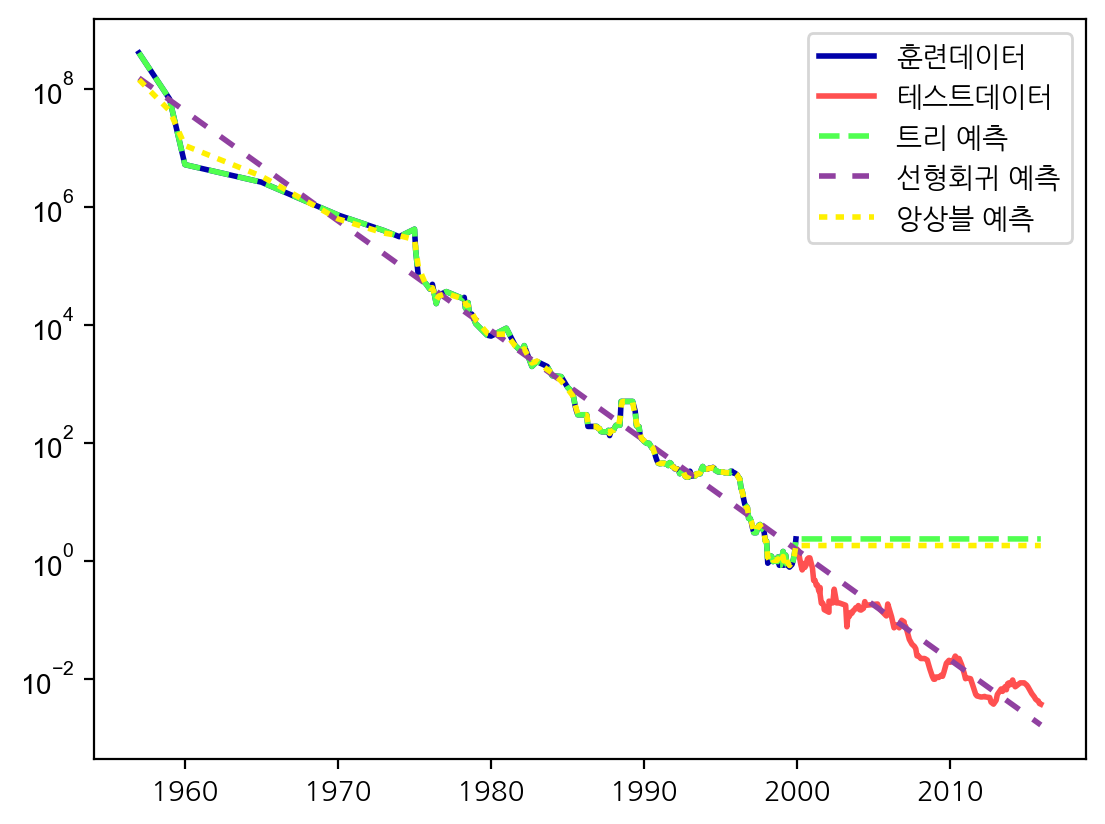

In [89]:
plt.yticks(fontname = "Arial") # 폰트경고 안뜸
plt.semilogy(data_train.date, data_train.price, label="훈련데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
# 트리도 선형모델이지만 train데이터를 따라가도록 추종함, 2000 이후로는 예측X
# 날짜특성으로 예측하는 모델인데, 2000 이후에는 데이터가 없으니까 불가능함 (처음 보는 데이터에 취약) -> [시계열에서는 트리모델 사용불가]
# 선형은 데이터의 민감성이 높아서 앞의 데이터로 예측가능
# but, 여러 특징들로 예측할 때는 랜덤포레스트가 유리
# 앙상블 예측이 트리 예측보다 정확도 높음
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.semilogy(ram_prices.date, price_forest, label="앙상블 예측")
plt.legend();

# SVM
- 커널 서포트 백터 머신
- 차수를 높이는 것 -> 발산
- MinMaxScaler 전처리 메시드 사용해야함

In [90]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC ###

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)

svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train,y_train), svc.score(X_test, y_test))

# SVM 적용했을 때 성능이 확실하게 좋아진다면, 해당 데이터가 선형성을 띌 확률이 높음 -> 주요 factor가 3-4개 정도
# 1. 선형모델로 Base
# 2. svm, svc, svr을 적용했을 때 성능 좋다면
# 3. 해당 데이터가 선형성을 띌 확률이 높음 -> 주요 factor가 3-4개 정도라고 생각
# 4. 딥러닝 적용

0.9178403755868545 0.9230769230769231


In [93]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC ###

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)

# 3장에서 배운 MinMax나 StandardScaler로 전처리해야함
# 전처리 직접해보면 (분석시에 실제로는 X)
min_on_training = X_train.min(axis=0) # axis=0 -> numpy로 동작함
range_on_training = (X_train-min_on_training).max(axis=0)
X_train_scaled = (X_train-min_on_training)/range_on_training

min_on_test = X_test.min(axis=0) # axis=0 -> numpy로 동작함
range_on_test = (X_test-min_on_test).max(axis=0)
X_test_scaled = (X_test-min_on_test)/range_on_test

# svc = SVC(C=20) # c값 잡는건 나중에 자동으로 잡도록 함
svc = SVC()
svc.fit(X_train_scaled, y_train)
print(svc.score(X_train_scaled,y_train), svc.score(X_test_scaled, y_test))

0.9929577464788732 0.951048951048951


# 딥러닝 (XOR 문제를 해결하자 v1)

In [100]:
def AND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [101]:
print(AND(0,0),AND(0,1),AND(1,0),AND(1,1))

0 0 0 1


In [102]:
def OR(x1,x2):
    w1,w2,theta = 0.5,0.5,0.3
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [103]:
print(OR(0,0),OR(0,1),OR(1,0),OR(1,1))

0 1 1 1


In [104]:
def NAND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7
    tmp = w1*x1 + w2*x2
    if tmp > theta:
        return 0
    elif tmp <= theta:
        return 1

In [105]:
print(NAND(0,0),NAND(0,1),NAND(1,0),NAND(1,1))

1 1 1 0


In [106]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [107]:
print(XOR(0,0),XOR(0,1),XOR(1,0),XOR(1,1))

0 1 1 0
